In [1]:
from manim import *
import numpy as np

ModuleNotFoundError: No module named 'manim'

In [ ]:
from manim import NumberLine
number_line = NumberLine()

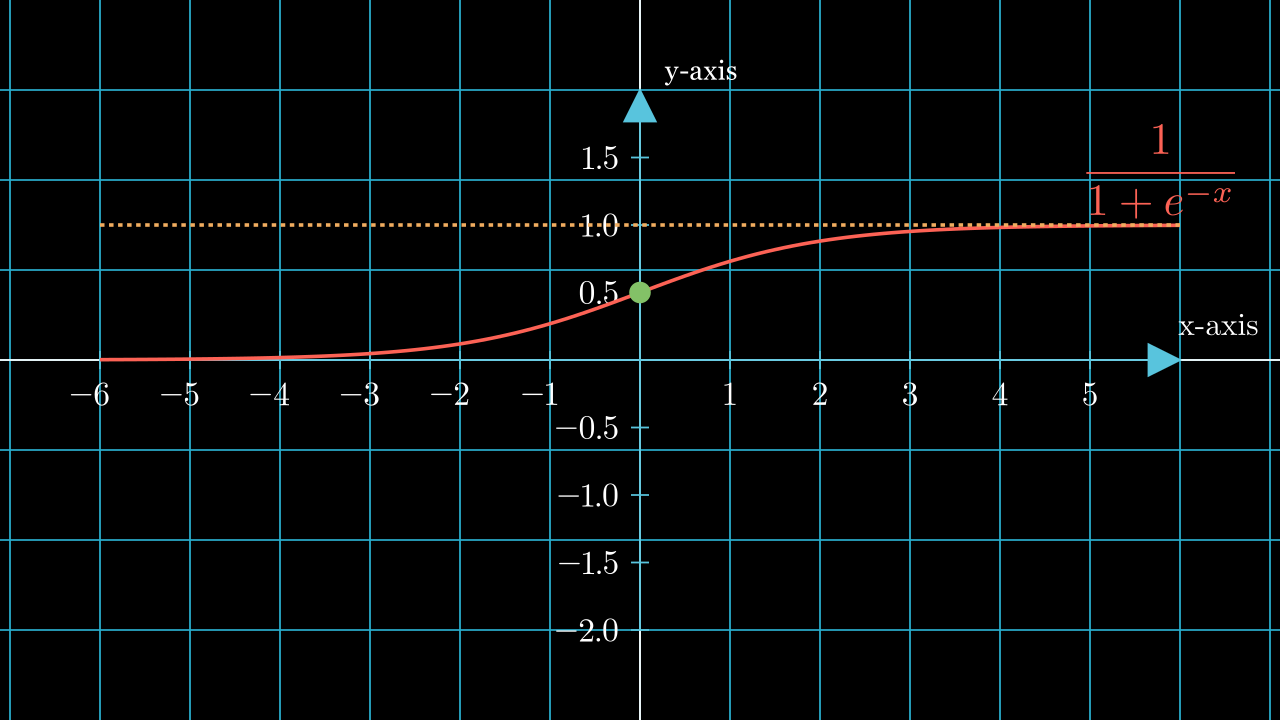

In [ ]:
%%manim -qm -v WARNING SigmoidFunction
class SigmoidFunction(Scene):
    def construct(self):
        # Create axes
        plane = NumberPlane()
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 2, 0.5], # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(
            Tex("x-axis").scale(0.7), Text("y-axis").scale(0.45)
        )

        
        # Define the sigmoid function
        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        sigmoid_graph = axes.plot(sigmoid, color=RED)

        # Add a label to the graph
        graph_label = axes.get_graph_label(sigmoid_graph, label='\\frac{1}{1+e^{-x}}').shift(UP * 0.6)
        dot_axes = Dot(axes.coords_to_point(0, 0.5), color=GREEN).scale(1.5)
        dotted_line = DashedLine(start=axes.c2p(-6, 1), end=axes.c2p(6, 1), color=GOLD)

        # Add elements to the scene
        self.add(plane,axes,labels,sigmoid_graph, dotted_line,dot_axes,graph_label)
        
        


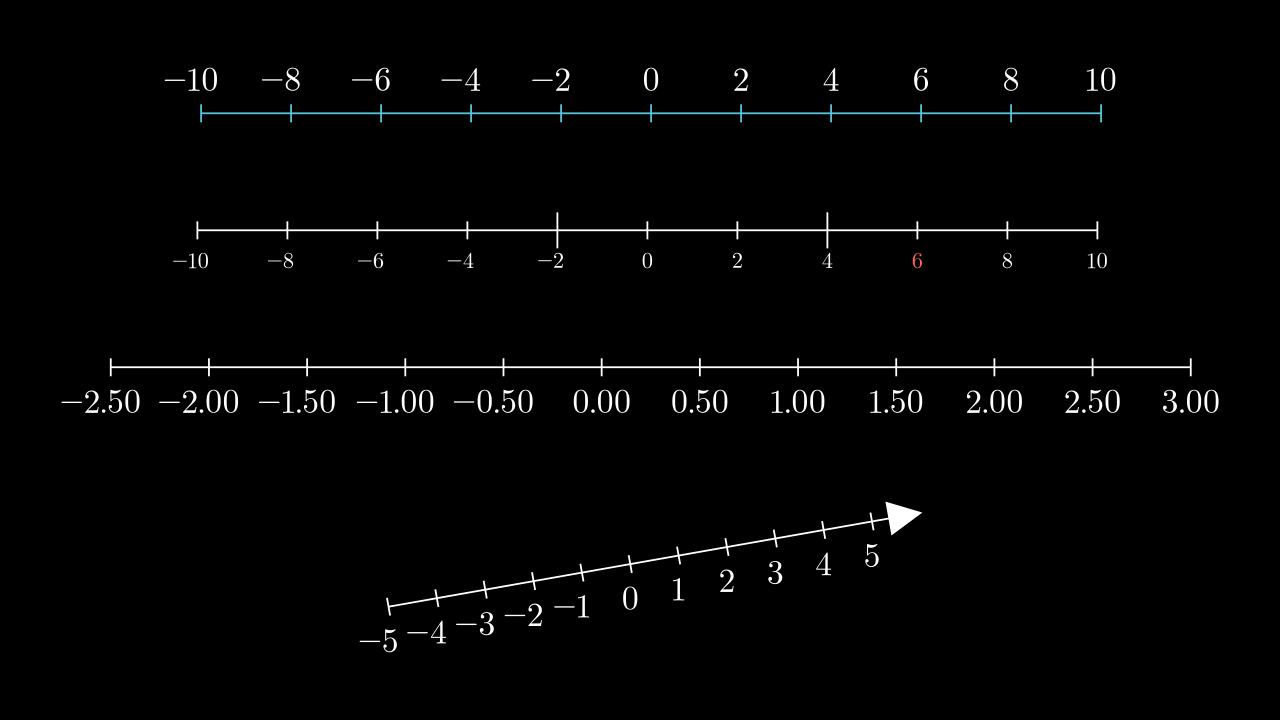

In [ ]:
%%manim -qm -v WARNING NumberLineExample
class NumberLineExample(Scene):
    def construct(self):
        l0 = NumberLine(
            x_range=[-10, 10, 2],
            length=10,
            color=BLUE,
            include_numbers=True,
            label_direction=UP,
        )

        l1 = NumberLine(
            x_range=[-10, 10, 2],
            unit_size=0.5,
            numbers_with_elongated_ticks=[-2, 4],
            include_numbers=True,
            font_size=24,
        )
        num6 = l1.numbers[8]
        num6.set_color(RED)

        l2 = NumberLine(
            x_range=[-2.5, 2.5 + 0.5, 0.5],
            length=12,
            decimal_number_config={"num_decimal_places": 2},
            include_numbers=True,
        )

        l3 = NumberLine(
            x_range=[-5, 5 + 1, 1],
            length=6,
            include_tip=True,
            include_numbers=True,
            rotation=10 * DEGREES,
        )

        line_group = VGroup(l0, l1, l2, l3).arrange(DOWN, buff=1)
        self.add(line_group)

In [ ]:
%%manim -qm -v WARNING NumberLineAnimation


class NumberLineAnimation(Scene):
    def construct(self):
        # Create a NumberLine
        number_line = NumberLine(
            x_range=[-5, 5, 1],  # Range from -5 to 5 with step of 1
            length=10,           # Length of the NumberLine
            include_ticks=True,  # Include tick marks
            include_numbers=True,# Include numbers
            font_size=24,        # Font size for the numbers
            rotation=0,          # Rotation of the NumberLine
            stroke_width=4.0,    # Thickness of the line
            include_tip=True,    # Include an arrow tip
            tip_width=0.4,       # Width of the tip
            tip_height=0.4       # Height of the tip
        )

        # Animate the creation of the NumberLine
        self.play(Create(number_line))

        # Animate a dot moving along the NumberLine
        dot = Dot(color=RED).move_to(number_line.n2p(-5)) # Start at -5
        self.play(MoveAlongPath(dot, number_line), run_time=5, rate_func=linear)

        # Clean up
        self.play(FadeOut(dot), FadeOut(number_line))


In [ ]:
%%manim -qm -v WARNING GradientDescentVisualization

class GradientDescentVisualization(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-2, 2, 0.5],
            y_range=[0, 6, 1],
            x_length=7,
            y_length=5,
            axis_config={"color": BLUE},
        )

        # Labels for axes
        x_label = axes.get_x_axis_label("x")
        y_label = axes.get_y_axis_label("J(x)")

        # The quadratic cost function
        cost_func = axes.plot(lambda x: x**2, color=WHITE)
        cost_label = axes.get_graph_label(cost_func, label='x^2')

        # Initial point
        starting_dot = Dot(axes.c2p(1.5, 1.5**2), color=YELLOW)
        starting_label = MathTex("x_0", color=YELLOW).next_to(starting_dot, UR, buff=0.1)

        # Gradient descent path
        path = VMobject(color=RED)
        path.set_points_as_corners([starting_dot.get_center(), axes.c2p(1, 1**2), axes.c2p(0.5, 0.5**2), axes.c2p(0.25, 0.25**2), axes.c2p(0.125, 0.125**2)])
        
        # Animation
        self.play(Create(axes), Write(x_label), Write(y_label))
        self.play(Create(cost_func), Write(cost_label))
        self.play(FadeIn(starting_dot), Write(starting_label))
        self.play(MoveAlongPath(starting_dot, path), run_time=3, rate_func=linear)
        self.play(FadeOut(starting_dot), FadeOut(starting_label))

        self.wait(1)


In [ ]:
%%manim -qm -v WARNING GradientDescentLearningRates



class GradientDescentLearningRates(Scene):
    def construct(self):
        # Create Axes
        axes = Axes(
            x_range=[-2, 2, 0.5],
            y_range=[0, 6, 1],
            x_length=7,
            y_length=5,
            axis_config={"color": BLUE},
        )

        # Labels for axes
        x_label = axes.get_x_axis_label("x")
        y_label = axes.get_y_axis_label("J(x)")

        # Cost Function
        cost_func = axes.plot(lambda x: x**2, color=WHITE)
        cost_label = axes.get_graph_label(cost_func, label='x^2')

        # Starting Point
        starting_dot = Dot(axes.c2p(-1.5, 1.5**2), color=YELLOW)
        starting_label = MathTex("x_0", color=YELLOW).next_to(starting_dot, UR, buff=0.1)

        # Paths for different learning rates
        path_low_lr = VMobject(color=GREEN)
        path_low_lr.set_points_as_corners([starting_dot.get_center(), *[
            axes.c2p(-1.5 + 0.1 * (i+1), (-1.5 + 0.1 * (i+1))**2) for i in range(15)
        ]])

        path_high_lr = VMobject(color=RED)
        path_high_lr.set_points_as_corners([starting_dot.get_center(), *[
            axes.c2p(-1.5 + 0.3 * ((-1)**i), (-1.5 + 0.3 * ((-1)**i))**2) for i in range(15)
        ]])

        path_optimal_lr = VMobject(color=BLUE)
        path_optimal_lr.set_points_as_corners([starting_dot.get_center(), *[
            axes.c2p(-1.5 + 0.2 / (i+1), (-1.5 + 0.2 / (i+1))**2) for i in range(15)
        ]])

        # Animation
        self.play(Create(axes), Write(x_label), Write(y_label))
        self.play(Create(cost_func), Write(cost_label))
        self.play(FadeIn(starting_dot), Write(starting_label))

        # Demonstrate low learning rate
        self.play(MoveAlongPath(starting_dot, path_low_lr), run_time=4, rate_func=linear)
        self.wait(1)

        # Reset dot position
        self.play(starting_dot.animate.move_to(axes.c2p(-1.5, 1.5**2)))

        # Demonstrate high learning rate
        self.play(MoveAlongPath(starting_dot, path_high_lr), run_time=4, rate_func=linear)
        self.wait(1)

        # Reset dot position
        self.play(starting_dot.animate.move_to(axes.c2p(-1.5, 1.5**2)))

        # Demonstrate optimal learning rate
        self.play(MoveAlongPath(starting_dot, path_optimal_lr), run_time=4, rate_func=linear)
        self.wait(1)

        # Clean up
        self.play(FadeOut(starting_dot), FadeOut(starting_label))
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING ParaboloidAndLevelCurves


class ParaboloidAndLevelCurves(ThreeDScene):
    def construct(self):
        # Create Axes
        axes = ThreeDAxes(x_range=[-2, 2], y_range=[-2, 2], z_range=[-2, 4], x_length=7, y_length=7, z_length=7)

        # Define Paraboloid
        paraboloid = Surface(
            lambda u, v: np.array([
                u, 
                v, 
                u**2 - v**2  # Paraboloid function z = x^2 + y^2
            ]), u_range=[-2, 2], v_range=[-2, 2], resolution=32, checkerboard_colors=[BLUE_D, BLUE_E]
        )

        # Define Level Curves Projection on xy-plane
        level_curves = VGroup()
        for z in np.linspace(0, 4, 8):
            level_curve = Circle(radius=np.sqrt(z), color=WHITE, stroke_width=2).shift(DOWN * z)
            level_curves.add(level_curve)

        # Animation
        self.set_camera_orientation(phi=60 * DEGREES, theta=45 * DEGREES)
        self.add(axes)
        self.play(Create(paraboloid), run_time=3)
        self.wait(1)
        self.move_camera(phi=75 * DEGREES, theta=90 * DEGREES)
        self.wait(1)
        self.play(Transform(paraboloid, level_curves))
        self.wait(2)

        # Clean up
        self.play(FadeOut(paraboloid), FadeOut(axes))


In [ ]:
%%manim -qm -v WARNING PlotFunctionWithPointTracker
class PlotFunctionWithPointTracker(Scene):
    def construct(self):
        # Create axes and the function plot
        axes = Axes(
            x_range=[-3, 3, 1],
            y_range=[0, 9, 1],
            axis_config={"color": BLUE}
        )

        function = axes.plot(lambda x: x**2, color=RED)
        function_label = axes.get_graph_label(function, label='x^2')

        # Create a value tracker
        value_tracker = ValueTracker(-3)

        # Create a dot that moves along the function
        moving_dot = Dot(color=ORANGE).move_to(axes.c2p(-3, 9))
        moving_dot.add_updater(lambda m: m.move_to(axes.c2p(value_tracker.get_value(), value_tracker.get_value()**2)))

        # Create labels for x and f(x)
        x_label = MathTex("x = ")
        x_value = DecimalNumber(value_tracker.get_value(), num_decimal_places=2).add_updater(lambda v: v.set_value(value_tracker.get_value()))
        fx_label = MathTex(", \\ f(x) = ")
        fx_value = DecimalNumber(value_tracker.get_value()**2, num_decimal_places=2).add_updater(lambda v: v.set_value(value_tracker.get_value()**2))

        # Group the labels and position them
        labels = VGroup(x_label, x_value, fx_label, fx_value).arrange(RIGHT)
        labels.next_to(moving_dot, UP + RIGHT)

        # Add everything to the scene
        self.add(axes, function, function_label, moving_dot, labels)
        self.play(value_tracker.animate.set_value(3), run_time=4, rate_func=linear)
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING PlotFunctionWithTable



class PlotFunctionWithTable(Scene):
    def construct(self):
        # Create axes and the function plot
        axes = Axes(
            x_range=[-3, 3, 1],
            y_range=[0, 9, 1],
            axis_config={"color": BLUE}
        ).to_edge(LEFT, buff=0.5)

        function = axes.plot(lambda x: x**2, color=RED)
        function_label = axes.get_graph_label(function, label='x^2')

        # Create a value tracker
        value_tracker = ValueTracker(-3)

        # Create a dot that moves along the function
        moving_dot = Dot(color=ORANGE).move_to(axes.c2p(-3, 9))
        moving_dot.add_updater(lambda m: m.move_to(axes.c2p(value_tracker.get_value(), value_tracker.get_value()**2)))

        # Initialize the table data and create the table
        table_data = [["x", "f(x)"]]
        table = Table(table_data).scale(0.3).next_to(axes.y_axis.get_top(), RIGHT, buff=0.1)
        self.add(table)

        # Add everything to the scene
        self.add(axes, function, function_label, moving_dot)

        # Update table and tracker
        for x_val in range(-3, 4):
            new_row = [f"{x_val:.2f}", f"{x_val**2:.2f}"]
            new_table_data = table_data + [new_row]
            new_table = Table(new_table_data).scale(0.3).next_to(axes.y_axis.get_top(), RIGHT, buff=0.1)
            self.play(Transform(table, new_table), value_tracker.animate.set_value(x_val), run_time=1, rate_func=linear)
            table_data.append(new_row)
            self.wait(0.5)

        self.wait(1)


In [ ]:
%%manim -qm -v WARNING MovingTangentLine

class MovingTangentLine(Scene):
    def construct(self):
        # Define the axes
        axes = Axes(
            x_range=[-4, 8],
            y_range=[-2, 5],
            axis_config={"color": BLUE}
        )

        # Define the parabola
        parabola = axes.plot(lambda x: 0.5 * x**2, color=WHITE)
        parabola_label = axes.get_graph_label(parabola, label='y = \\frac{1}{2}x^2')

        # Create a ValueTracker for the x-value of the tangent point
        x_tracker = ValueTracker(-3)

        # Function to get the derivative of the parabola
        def get_slope(x):
            return x  # Derivative of y = 1/2 * x^2

        # Function to get the equation of the tangent line
        def get_tangent_line(x):
            slope = get_slope(x)
            intercept = 0.5 * x**2 - slope * x  # y - y1 = m(x - x1)
            return lambda t: slope * t + intercept

        # Function to create a tangent line at a given x-value
        def create_tangent_line(x):
            tangent_line_equation = get_tangent_line(x)
            # Draw the line from x-1 to x+1 for better visibility
            tangent_line = axes.plot_line_graph(
                x_values=[x - 1, x + 1], 
                y_values=[tangent_line_equation(x - 1), tangent_line_equation(x + 1)],
                line_color=RED
            )
            return tangent_line

        # Create the initial tangent line
        tangent_line = always_redraw(lambda: create_tangent_line(x_tracker.get_value()))

        # Add the axes, parabola, label, and tangent line to the scene
        self.add(axes, parabola, parabola_label, tangent_line)

        # Animate the tangent line moving along the parabola
        self.play(x_tracker.animate.set_value(3), run_time=6, rate_func=there_and_back)
        self.wait()


In [ ]:
%%manim -qm -v WARNING ConcaveFunctionScene
class ConcaveFunctionScene(Scene):
    def construct(self):
        # Define a concave function, e.g., f(x) = -x^2
        def concave_func(x):
            return -x**2

        # Create a graph
        graph = FunctionGraph(
            concave_func,
            x_range=[-3, 3],
            color=BLUE
        )

        # Create two dots on the graph
        dot1 = Dot().move_to(graph.point_from_proportion(0.3))
        dot2 = Dot().move_to(graph.point_from_proportion(0.7))

        # Create a line segment connecting the dots
        line = Line(dot1.get_center(), dot2.get_center(), color=RED)

        # Display
        self.play(Create(graph))
        self.wait(1)
        self.play(FadeIn(dot1), FadeIn(dot2))
        self.wait(1)
        self.play(Create(line))
        self.wait(2)

In [ ]:
%%manim -qm -v WARNING MovingTangentLine

class MovingTangentLine(Scene):
    def construct(self):
        # Create axes
        axes = Axes(
            x_range=[0, 10],
            y_range=[0, 100],
            axis_config={"color": BLUE},
        )

        # Define the curve function and its derivative
        def curve_func(x):
            return 0.5 * x ** 2

        def derivative_func(x):
            return x  # The derivative of 0.5 * x ** 2 is x

        # Draw the curve
        curve = axes.plot(curve_func, color=BLUE)
        curve_label = axes.get_graph_label(curve, label='s(t)')

        # Create a ValueTracker for the x-value of the point of tangency
        x_tracker = ValueTracker(1)

        # Function to create a tangent line at a given x-coordinate
        def get_tangent_line(x):
            line_slope = derivative_func(x)
            line_intercept = curve_func(x) - line_slope * x

            def line_func(t):
                return line_slope * t + line_intercept

            tangent_line = axes.plot(line_func, color=YELLOW, x_range=[x-2, x+2])
            return tangent_line

        # Function to create a dot at a given point on the curve
        def get_curve_dot(x):
            dot = Dot(color=RED)
            dot.move_to(axes.c2p(x, curve_func(x)))
            return dot

        # Create the moving dot and tangent line
        moving_dot = always_redraw(lambda: get_curve_dot(x_tracker.get_value()))
        tangent_line = always_redraw(lambda: get_tangent_line(x_tracker.get_value()))

        # Add elements to the scene
        self.add(axes, curve, curve_label, moving_dot, tangent_line)

        # Animate the dot and tangent line moving along the curve
        self.play(x_tracker.animate.set_value(9), run_time=5, rate_func=linear)
        self.wait()

        # Display the derivative formula box
        derivative_box = MathTex(
            "\\frac{ds}{dt}", "=", "s(t + dt)", "-", "s(t)", "\\over", "dt"
        ).to_edge(UP)
        self.play(Create(derivative_box))
        self.wait()


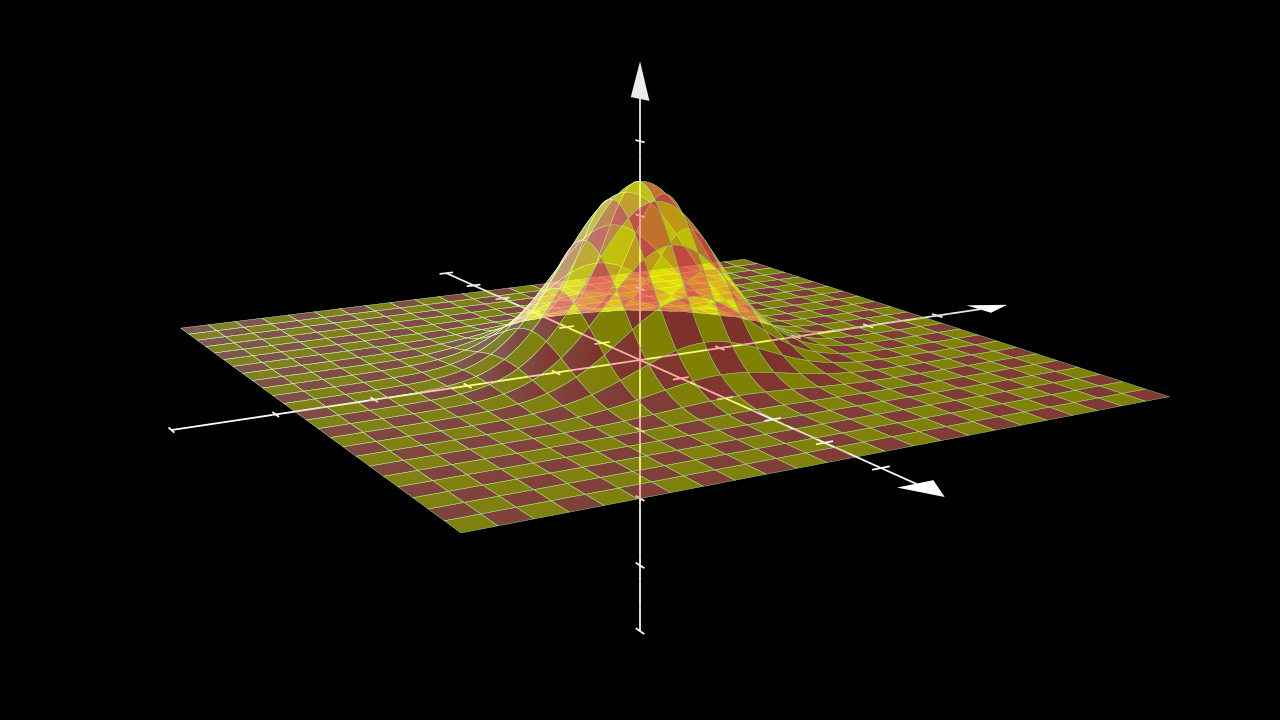

In [ ]:
%%manim -qm -v WARNING ThreeDSurfacePlot

from manim import *

class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 24
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_gauss(u, v):
            x = u
            y = v
            sigma, mu = 0.4, [0.0, 0.0]
            d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
            z = np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
            return np.array([x, y, z])

        gauss_plane = Surface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-2, +2],
            u_range=[-2, +2]
        )

        gauss_plane.scale(2, about_point=ORIGIN)
        gauss_plane.set_style(fill_opacity=1, stroke_color=GREEN)

        # Set a different checkerboard pattern
        gauss_plane.set_fill_by_checkerboard(RED, YELLOW, opacity=0.5)

        axes = ThreeDAxes()
        self.add(axes, gauss_plane)


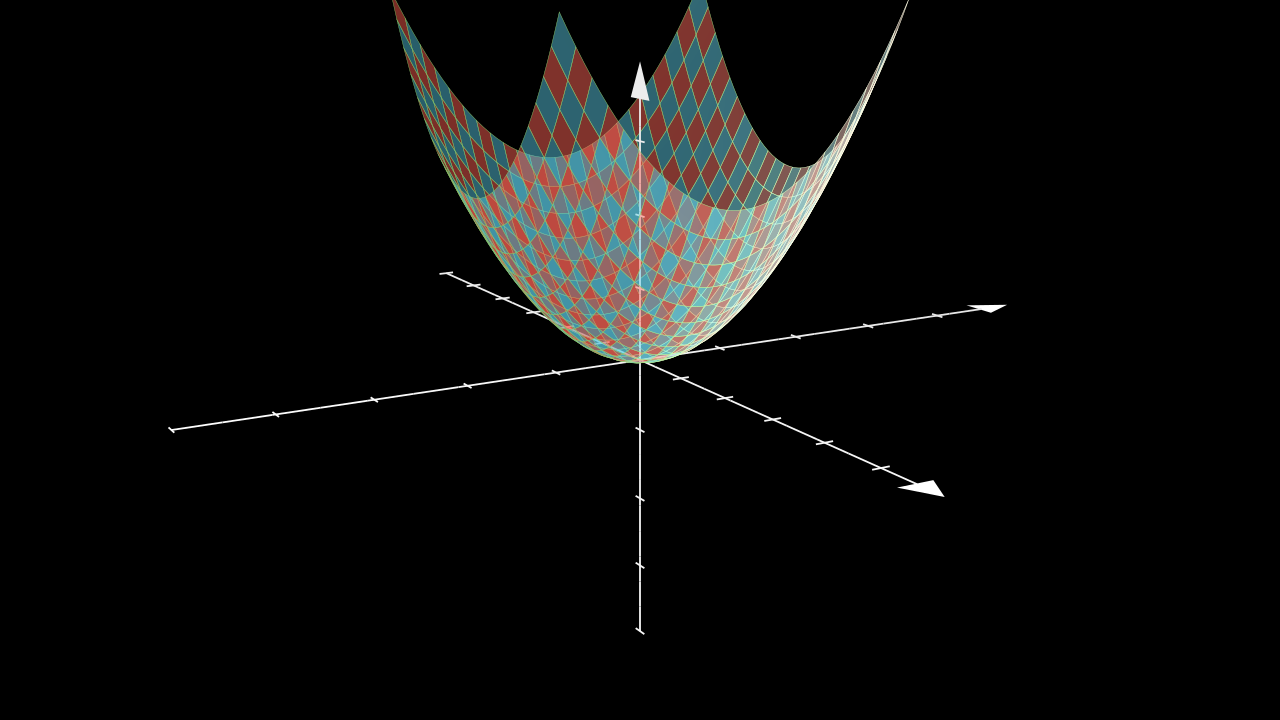

In [ ]:
%%manim -qm -v WARNING ThreeDSurfacePlot

class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 24
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_paraboloid(u, v):
            x = u
            y = v
            z = x**2 + y**2  # Paraboloid equation
            return np.array([x, y, z])

        paraboloid_surface = Surface(
            param_paraboloid,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-1, +1],
            u_range=[-1, +1]
        )

        paraboloid_surface.scale(2, about_point=ORIGIN)
        paraboloid_surface.set_style(fill_opacity=1, stroke_color=GREEN)

        # Set a different checkerboard pattern
        paraboloid_surface.set_fill_by_checkerboard(RED, BLUE, opacity=0.5)

        axes = ThreeDAxes()
        self.add(axes, paraboloid_surface)


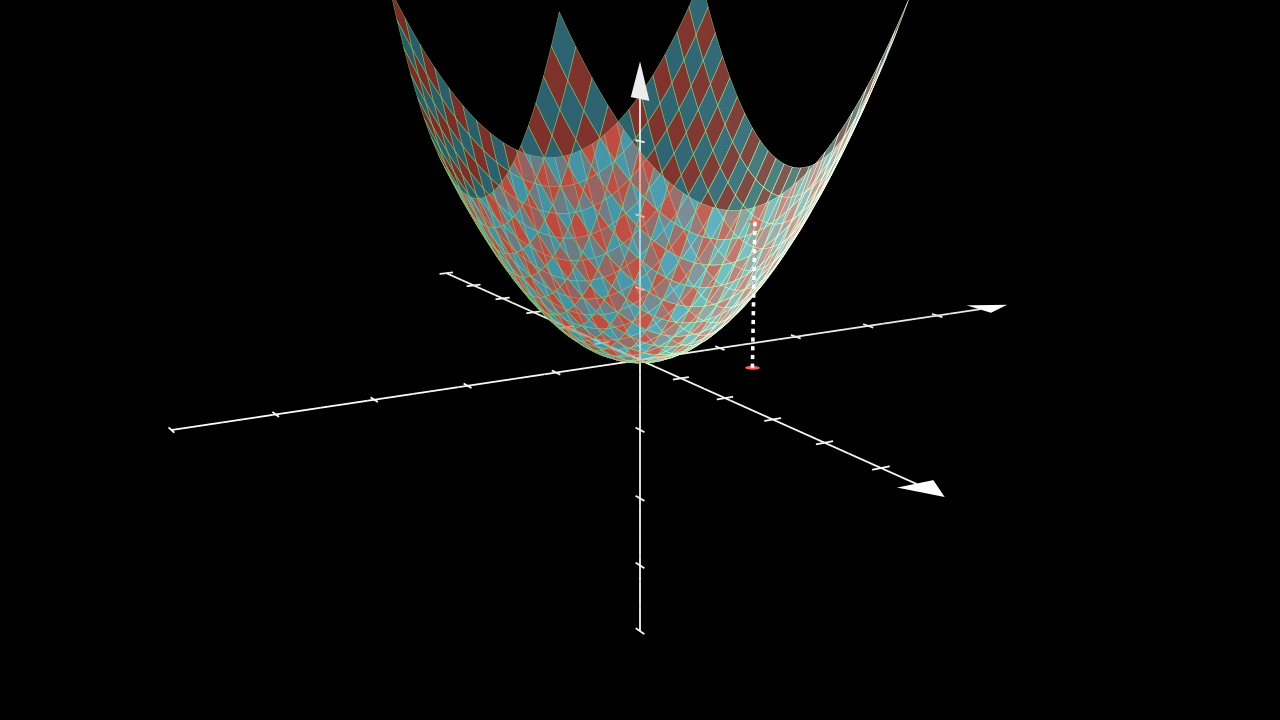

In [ ]:
%%manim -qm -v WARNING ThreeDSurfacePlot

from manim import *

class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 24
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_paraboloid(u, v):
            x = u
            y = v
            z = x**2 + y**2  # Paraboloid equation
            return np.array([x, y, z])

        paraboloid_surface = Surface(
            param_paraboloid,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-1, +1],
            u_range=[-1, +1]
        )

        paraboloid_surface.scale(2, about_point=ORIGIN)
        paraboloid_surface.set_style(fill_opacity=1, stroke_color=GREEN)
        paraboloid_surface.set_fill_by_checkerboard(RED, BLUE, opacity=0.5)

        axes = ThreeDAxes()
        
        # Create red dot at (0.5, 0.5)
        red_dot = Dot(point=np.array([0.9, 0.9, 0]), color=RED)
        
        # Calculate the z coordinate of the green dot on the surface
        z_coord = 0.9**2 + 0.9**2
        
        # Create green dot at (0.5, 0.5, f(0.5, 0.5))
        green_dot = Dot(point=np.array([0.9, 0.9, z_coord]), color=RED)
        
        # Draw a dashed line from the red dot to the green dot
        dashed_line = DashedLine(red_dot.get_center(), green_dot.get_center(), color=WHITE)
        
        # Adding everything to the scene
        self.add(axes, paraboloid_surface, red_dot, green_dot, dashed_line)


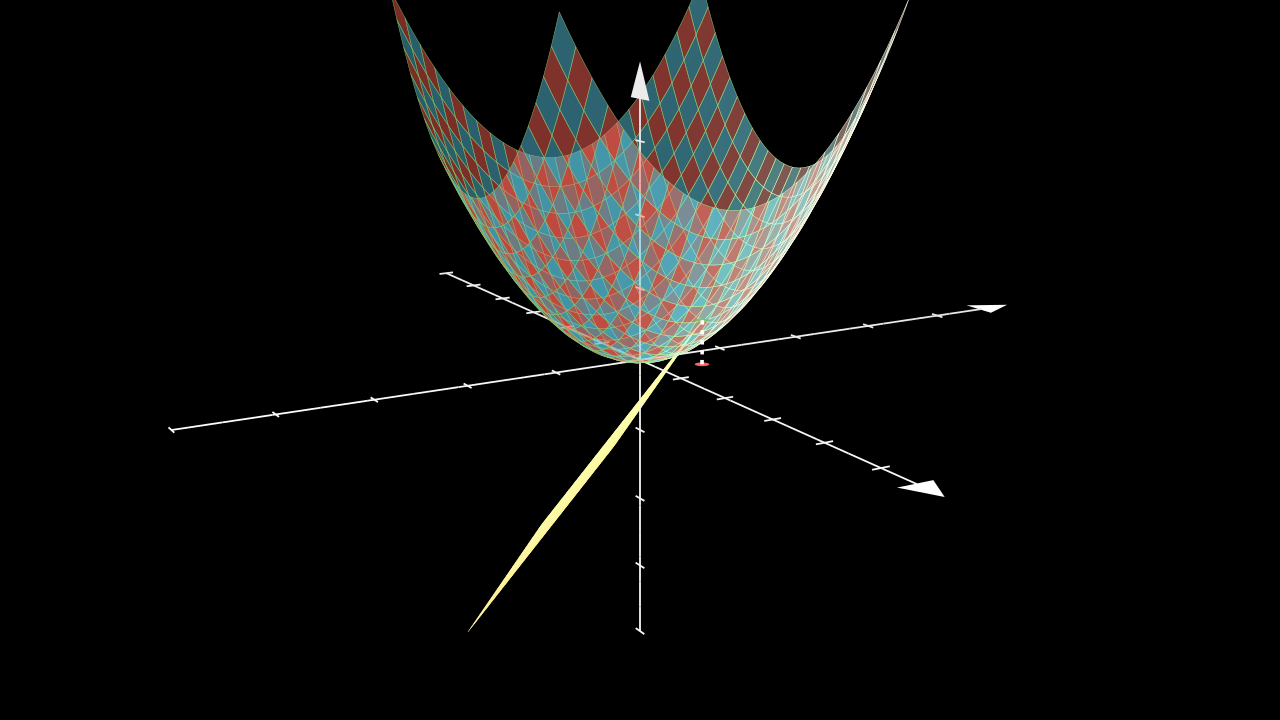

In [ ]:
%%manim -qm -v WARNING ThreeDSurfacePlot

from manim import *

class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 24
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_paraboloid(u, v):
            x = u
            y = v
            z = x**2 + y**2  # Paraboloid equation
            return np.array([x, y, z])

        paraboloid_surface = Surface(
            param_paraboloid,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-1, +1],
            u_range=[-1, +1]
        )
        paraboloid_surface.scale(2, about_point=ORIGIN)
        paraboloid_surface.set_style(fill_opacity=1, stroke_color=GREEN)
        paraboloid_surface.set_fill_by_checkerboard(RED, BLUE, opacity=0.5)
        
        # Tangent plane
        z_coord = 0.5 + (0.5 - 0.5) + (0.5 - 0.5)
        tangent_plane = Surface(
            lambda u, v: np.array([u, v, z_coord + (u - 0.5) + (v - 0.5)]),
            resolution=(resolution_fa, resolution_fa),
            v_range=[-0.5, 0.5],
            u_range=[-0.5, 0.5]
        )
        tangent_plane.scale(2, about_point=np.array([0.5, 0.5, z_coord]))
        tangent_plane.set_style(fill_opacity=0.2, fill_color=GOLD, stroke_color=ORANGE)

        # Red dot at (0.5, 0.5)
        red_dot = Dot(point=np.array([0.5, 0.5, 0]), color=RED)
        
        # Green dot at (0.5, 0.5, f(0.5, 0.5))
        green_dot = Dot(point=np.array([0.5, 0.5, z_coord]), color=GREEN)
        
        # Dashed line from red dot to green dot
        dashed_line = DashedLine(red_dot.get_center(), green_dot.get_center(), color=WHITE)

        axes = ThreeDAxes()
        
        self.add(axes, paraboloid_surface, red_dot, green_dot, dashed_line, tangent_plane)


In [ ]:
%%manim -qm -v WARNING MovingFrameBox

class MovingFrameBox(Scene):
    def construct(self):
        text1 = MathTex(
            "\\frac{d}{dx}", "[f(x) + g(x)]", "=", "\\frac{d}{dx}f(x)", "+", "\\frac{d}{dx}g(x)"
        )
        text2 = MathTex(
            "\\frac{d}{dx}", "[cf(x)]", "=", "c", "\\frac{d}{dx}f(x)"
        )

        # Positioning the two equations
        text1.to_edge(UP, buff=0.5)
        text2.next_to(text1, DOWN, buff=1)

        self.play(Write(text1), Write(text2))
        self.wait()

        # Highlighting parts of the first equation
        framebox1_1 = SurroundingRectangle(text1[1], buff=.1)
        framebox1_2 = SurroundingRectangle(text1[3], buff=.1)
        framebox1_3 = SurroundingRectangle(text1[5], buff=.1)

        self.play(Create(framebox1_1))
        self.wait()
        self.play(ReplacementTransform(framebox1_1, framebox1_2))
        self.wait()
        self.play(ReplacementTransform(framebox1_2, framebox1_3))
        self.wait()

        # Highlighting parts of the second equation
        framebox2_1 = SurroundingRectangle(text2[1], buff=.1)
        framebox2_2 = SurroundingRectangle(text2[3], buff=.1)

        self.play(Create(framebox2_1))
        self.wait()
        self.play(ReplacementTransform(framebox2_1, framebox2_2))
        self.wait()


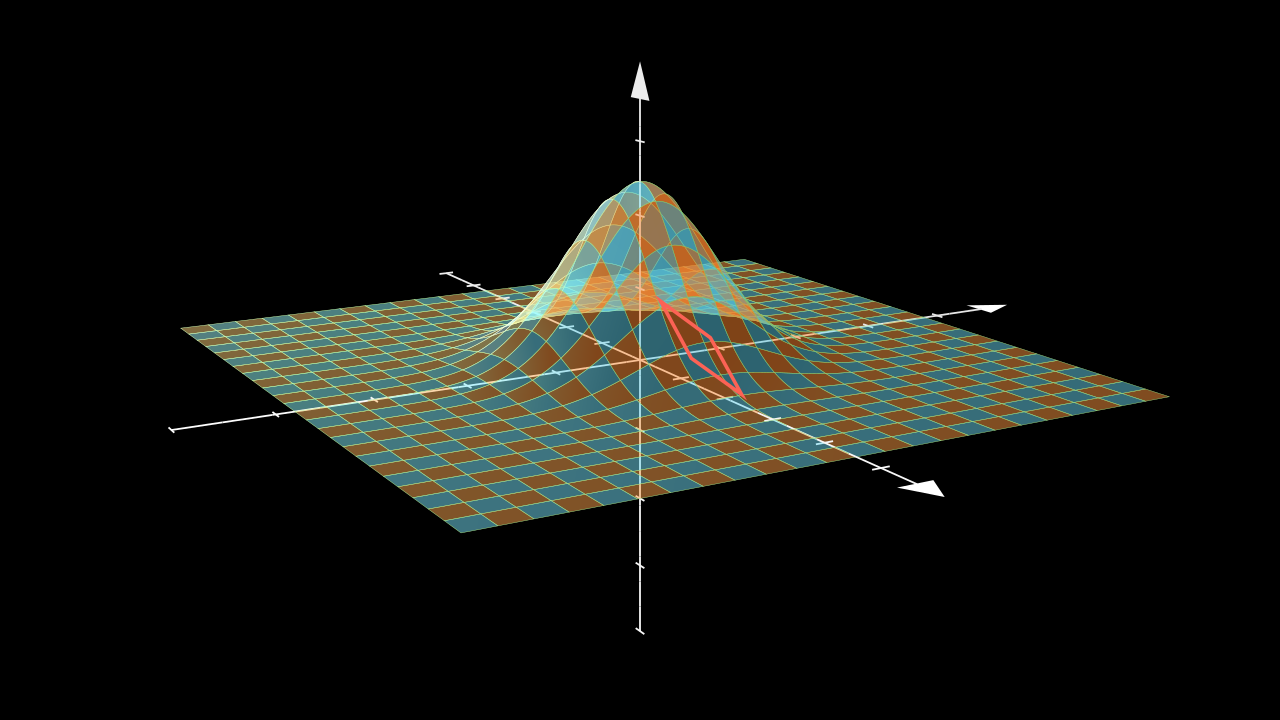

In [ ]:
%%manim -qm -v WARNING ThreeDSurfacePlot


class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 24
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_gauss(u, v):
            x = u
            y = v
            sigma, mu = 0.4, [0.0, 0.0]
            d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
            z = np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
            return np.array([x, y, z])

        gauss_plane = Surface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-2, +2],
            u_range=[-2, +2]
        )

        gauss_plane.scale(2, about_point=ORIGIN)
        gauss_plane.set_style(fill_opacity=1, stroke_color=GREEN)
        gauss_plane.set_fill_by_checkerboard(ORANGE, BLUE, opacity=0.5)

        axes = ThreeDAxes()

        # Calculate the gradient at the point (0.5, 0.5)
        x, y = 0.5, 0.5
        sigma, mu = 0.4, [0.0, 0.0]
        d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
        dz_dx = -x / (sigma ** 2) * np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
        dz_dy = -y / (sigma ** 2) * np.exp(-(d ** 2 / (2.0 * sigma ** 2)))

        # Point and gradient at (0.5, 0.5)
        point = axes.c2p(0.5, 0.5, np.exp(-(d ** 2 / (2.0 * sigma ** 2))))
        gradient = np.array([dz_dx, dz_dy, 1])

        # Create the tangent plane
        tangent_plane = Polygon(
            point + gradient * 0.5, point + np.array([-gradient[1], gradient[0], 0]) * 0.5,
            point - gradient * 0.5, point + np.array([gradient[1], -gradient[0], 0]) * 0.5,
            color=RED, fill_opacity=0.
        )

        self.add(axes, gauss_plane, tangent_plane)


In [ ]:
%%manim -qm -v WARNING SecantToTangentAnimation

class SecantToTangentAnimation(Scene):
    def construct(self):
        # Create Axes
        axes = Axes(
            x_range=[0, 5],
            y_range=[-10, 6],
            axis_config={"color": BLUE},
        )

        # Create a Graph
        graph = axes.plot(lambda x: -3 * x**2 + 12 * x - 8, color=WHITE)
        graph_label = axes.get_graph_label(graph, label='y=-3x^2+12x-8')

        # Create a Dot at the point of tangency
        tangent_point = axes.input_to_graph_point(3, graph)
        dot = Dot(point=tangent_point, color=YELLOW)

        # Define the function for the derivative (slope of the tangent)
        def derivative(x):
            return -6 * x + 12

        # Create the initial secant line
        secant_line = always_redraw(lambda: axes.get_secant_slope_group(
            x=3,  # The x-value at which secant/tangent is drawn
            graph=graph,
            dx=1.5,  # Initial dx, which will be animated to change
            secant_line_length=4,
            secant_line_color=RED
        ))

        # Add the elements to the scene
        self.add(axes, graph, graph_label, dot, secant_line)

        # Animate the secant line becoming the tangent line
        self.play(secant_line.dx_tracker.animate.set_value(0.01), run_time=4, rate_func=linear)

        # Create the tangent line using the derivative
        tangent_line = always_redraw(lambda: axes.get_tangent_line(
            3, graph, length=4, line_color=RED, slope=derivative(3)
        ))

        # Transition from the secant line to the tangent line
        self.play(Transform(secant_line, tangent_line), run_time=1)
        self.wait(2)


AttributeError: VGroup object has no attribute 'dx_tracker'

In [ ]:
# Define the sentences
sentences = ["I like summers", "I love monsoon and love summers", "I love skiing in winters"]

# Define the bigrams to check
bigrams = ["I like", "like summers", "I love", "love monsoon", "monsoon and", "and love", "love summers", "love skiing", "skiing in", "in winters"]

# Initialize a dictionary to hold the sentence and corresponding bigram counts
bigram_counts = {sentence: {bigram: 0 for bigram in bigrams} for sentence in sentences}

# Function to count bigrams in a sentence
def count_bigrams(sentence, bigram_list):
    words = sentence.split()
    for i in range(len(words) - 1):
        # Create a bigram from adjacent words
        current_bigram = f"{words[i]} {words[i+1]}"
        # If the bigram is in our list, increment the count
        if current_bigram in bigram_list:
            bigram_counts[sentence][current_bigram] += 1

# Count bigrams in each sentence
for sentence in sentences:
    count_bigrams(sentence, bigrams)

# Display the bigram counts for each sentence
bigram_counts


{'I like summers': {'I like': 1,
  'like summers': 1,
  'I love': 0,
  'love monsoon': 0,
  'monsoon and': 0,
  'and love': 0,
  'love summers': 0,
  'love skiing': 0,
  'skiing in': 0,
  'in winters': 0},
 'I love monsoon and love summers': {'I like': 0,
  'like summers': 0,
  'I love': 1,
  'love monsoon': 1,
  'monsoon and': 1,
  'and love': 1,
  'love summers': 1,
  'love skiing': 0,
  'skiing in': 0,
  'in winters': 0},
 'I love skiing in winters': {'I like': 0,
  'like summers': 0,
  'I love': 1,
  'love monsoon': 0,
  'monsoon and': 0,
  'and love': 0,
  'love summers': 0,
  'love skiing': 1,
  'skiing in': 1,
  'in winters': 1}}

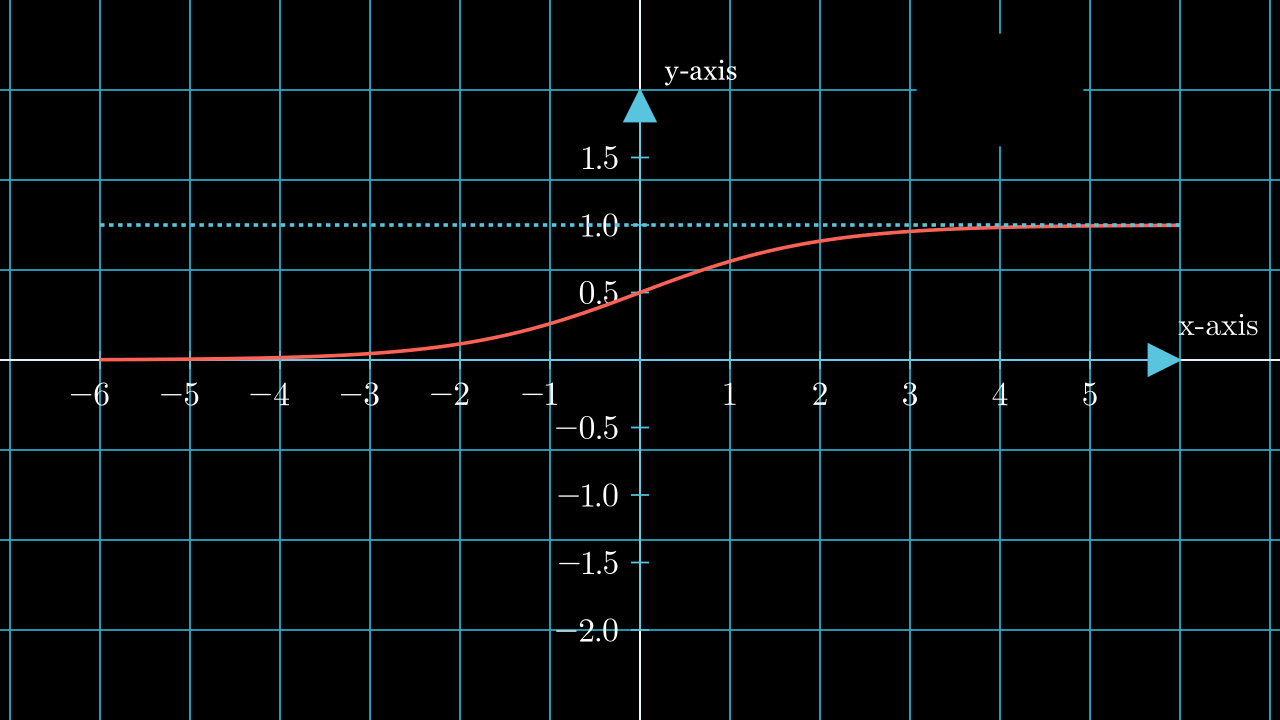

In [ ]:
%%manim -qm -v WARNING SigmoidFunction

from manim import *

class SigmoidFunction(Scene):
    def construct(self):
        # Create axes
        plane = NumberPlane()
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 2, 0.5], # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(
            Tex("x-axis").scale(0.7), Text("y-axis").scale(0.45)
        )

        # Define the sigmoid function
        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        sigmoid_graph = axes.plot(sigmoid, color=RED)

        # Add a label to the graph
        graph_label_text = MathTex('\\frac{1}{1+e^{-x}}')
        graph_label_bg = BackgroundRectangle(graph_label_text, fill_opacity=1, buff=0.1)
        graph_label = VGroup(graph_label_text, graph_label_bg).shift(UP * 3 + RIGHT * 4)

        # Dotted line at y = 1
        dotted_line = DashedLine(start=axes.c2p(-6, 1), end=axes.c2p(6, 1), color=BLUE)

        # Add elements to the scene
        self.add(plane, axes, labels, sigmoid_graph, dotted_line, graph_label)


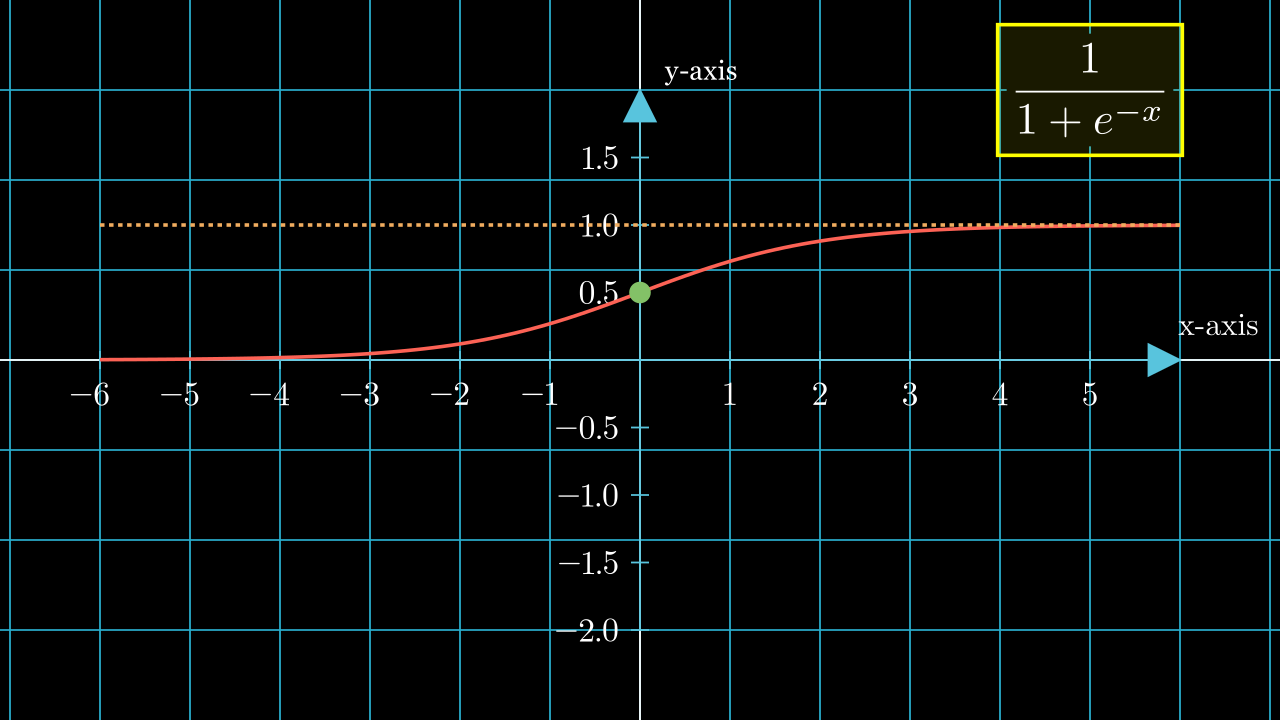

In [ ]:
%%manim -qm -v WARNING SigmoidFunction

from manim import *

class SigmoidFunction(Scene):
    def construct(self):
        # Create axes
        plane = NumberPlane()
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 2, 0.5], # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(
            Tex("x-axis").scale(0.7), Text("y-axis").scale(0.45)
        )

        # Define the sigmoid function
        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        sigmoid_graph = axes.plot(sigmoid, color=RED)

        # Add a label to the graph
        graph_label_text = MathTex('\\frac{1}{1+e^{-x}}').scale(1)
        graph_label_bg1 =  SurroundingRectangle(graph_label_text, fill_opacity=0.1, buff=0.2)
        graph_label_bg = BackgroundRectangle(graph_label_text, fill_opacity=1, buff=0.1)
        graph_label = VGroup(graph_label_bg,graph_label_bg1, graph_label_text).shift(UP * 3 + RIGHT * 5)

        # Dotted line at y = 1
        dotted_line = DashedLine(start=axes.c2p(-6, 1), end=axes.c2p(6, 1), color=GOLD)
        dot_axes = Dot(axes.coords_to_point(0, 0.5), color=GREEN).scale(1.5)
        # Add elements to the scene
        self.add(plane,axes, labels, sigmoid_graph, dotted_line, dot_axes,graph_label)


In [ ]:
%%manim -qm -v WARNING ApproachingZero

from manim import *

class ApproachingZero(Scene):
    def construct(self):
        # Create number line
        number_line = NumberLine(
            x_range=[-0.001, 0.1, 0.01], 
            length=10, 
            color=BLUE, 
            include_numbers=True,
            label_direction=DOWN
        )

        # Create a point at zero
        zero_point = Dot(number_line.n2p(0), color=RED)

        # Create an arrow
        arrow = Arrow(start=number_line.n2p(0.1), end=number_line.n2p(0.09), buff=0.1, color=YELLOW)

        # Add number line, zero point, and arrow to the scene
        self.add(number_line, zero_point, arrow)

        # Values that x will approach zero
        x_values = [0.09, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

        # Animate the arrow moving towards zero at a uniform speed
        for x in x_values:
            # Calculate the new end point for the arrow
            new_end = number_line.n2p(x) - 0.1 * RIGHT
            # Animate the arrow movement with fixed duration
            self.play(
                arrow.animate.put_start_and_end_on(number_line.n2p(x), new_end),
                run_time=1  # Set the duration for each movement to 1 second
            )

        # Final pause to show the arrow very close to zero
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING SigmoidAsymptotes

class SigmoidAsymptotes(Scene):
    def construct(self):
        # Create axes
        axes = Axes(
            x_range=[-10, 10, 1],
            y_range=[-0.5, 1.5, 0.5],
            axis_config={"color": BLUE}
        ).add_coordinates()

        # Define the sigmoid function
        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        sigmoid_graph = axes.plot(sigmoid, color=RED, x_range=[-10, 10])

        # Add a label to the graph
        graph_label = axes.get_graph_label(sigmoid_graph, label='\\sigma(x) = \\frac{1}{1+e^{-x}}')
        
        # Create dots and arrows for the animation
        dot_right = Dot(axes.c2p(0, sigmoid(0)), color=YELLOW)
        arrow_right = Arrow(axes.c2p(6, 0.5), axes.c2p(9, 0.95), buff=0.1, color=YELLOW)

        dot_left = Dot(axes.c2p(0, sigmoid(0)), color=YELLOW)
        arrow_left = Arrow(axes.c2p(-6, 0.5), axes.c2p(-9, 0.05), buff=0.1, color=YELLOW)

        # Text for x approaching infinity and negative infinity
        text_right = Text("x → ∞, \sigma(x) → 1", font_size=36).shift(RIGHT * 4 + UP * 2)
        text_left = Text("x → -∞, \sigma(x) → 0", font_size=36).shift(LEFT * 4 + UP * 2)

        # Add elements to the scene
        self.add(axes, sigmoid_graph, graph_label, dot_right, dot_left, arrow_right, arrow_left, text_right, text_left)

        # Animate the dots and arrows
        self.play(dot_right.animate.move_to(axes.c2p(9, sigmoid(9))))
        self.play(dot_left.animate.move_to(axes.c2p(-9, sigmoid(-9))))
        self.wait(2)


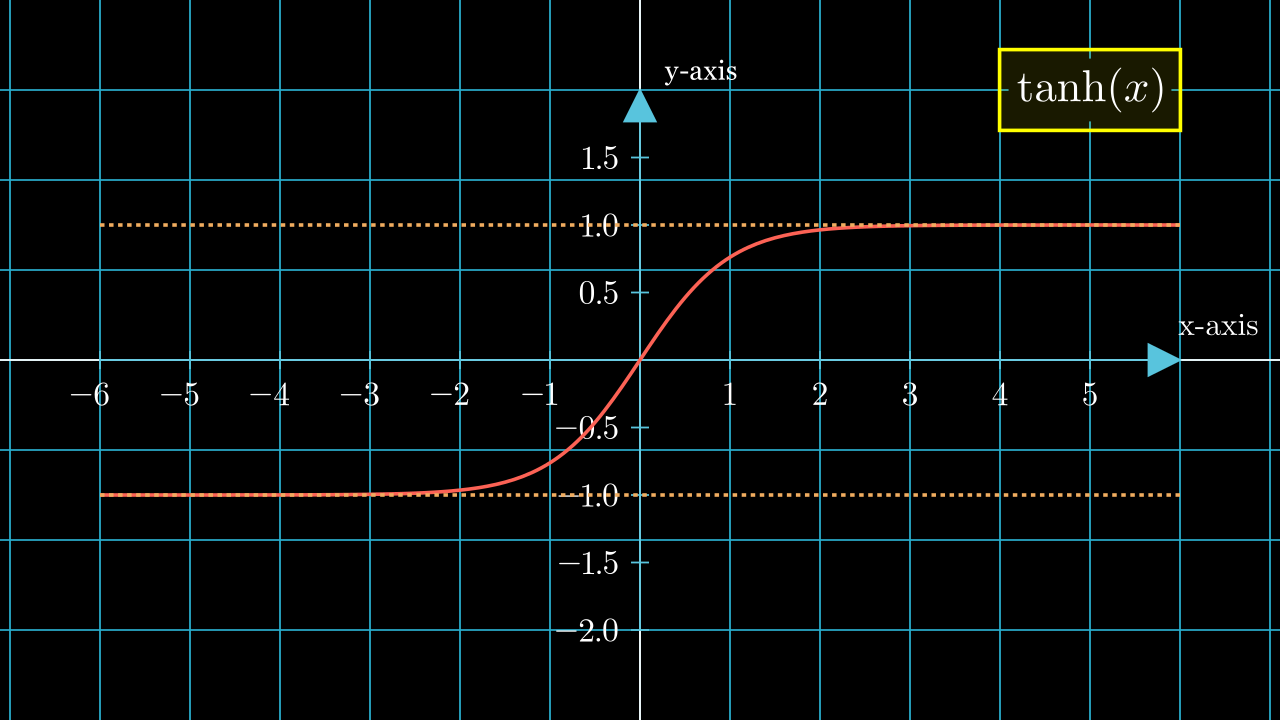

In [ ]:
%%manim -qm -v WARNING TanhFunction

from manim import *

class TanhFunction(Scene):
    def construct(self):
        # Create axes
        plane = NumberPlane()
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 2, 0.5], # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(
            Tex("x-axis").scale(0.7), Text("y-axis").scale(0.45)
        )

        # Define the tanh function
        tanh = lambda x: np.tanh(x)
        tanh_graph = axes.plot(tanh, color=RED)

        # Add a label to the graph
        graph_label_text = MathTex('\\tanh(x)').scale(1)
        graph_label_bg1 = SurroundingRectangle(graph_label_text, fill_opacity=0.1, buff=0.2)
        graph_label_bg = BackgroundRectangle(graph_label_text, fill_opacity=1, buff=0.1)
        graph_label = VGroup(graph_label_bg, graph_label_bg1, graph_label_text).shift(UP * 3 + RIGHT * 5)

        # Dotted line at y = 1
        dotted_line_1 = DashedLine(start=axes.c2p(-6, 1), end=axes.c2p(6, 1), color=GOLD)

        # Dotted line at y = -1
        dotted_line_2 = DashedLine(start=axes.c2p(-6, -1), end=axes.c2p(6, -1), color=GOLD)

        # Add elements to the scene
        self.add(plane, axes, labels, tanh_graph, dotted_line_1, dotted_line_2, graph_label)


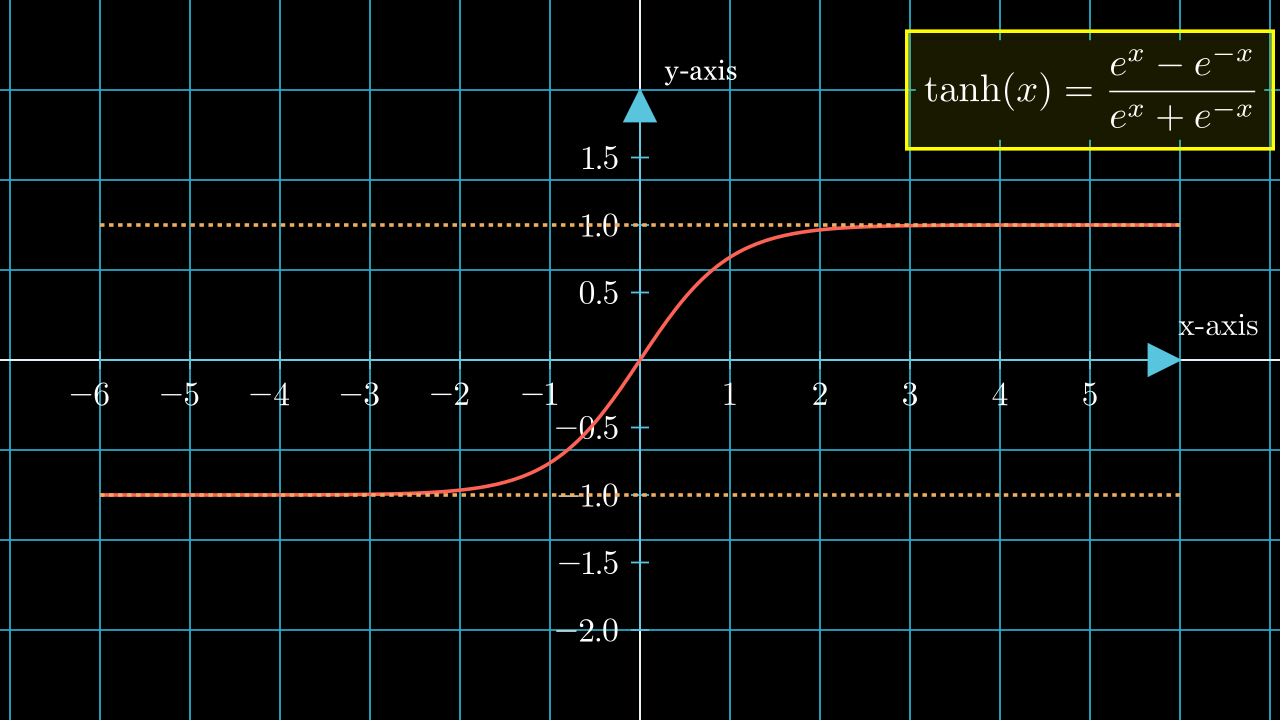

In [ ]:
%%manim -qm -v WARNING TanhFunction

from manim import *

class TanhFunction(Scene):
    def construct(self):
        # Create axes
        plane = NumberPlane()
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 2, 0.5], # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(
            Tex("x-axis").scale(0.7), Text("y-axis").scale(0.45)
        )

        # Define the tanh function
        tanh = lambda x: np.tanh(x)
        tanh_graph = axes.plot(tanh, color=RED)

        # Add a label to the graph with the tanh formula
        graph_label_text = MathTex('\\tanh(x) = \\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}').scale(0.86)
        graph_label_bg1 = SurroundingRectangle(graph_label_text, fill_opacity=0.1, buff=0.2)
        graph_label_bg = BackgroundRectangle(graph_label_text, fill_opacity=1, buff=0.1)
        graph_label = VGroup(graph_label_bg, graph_label_bg1, graph_label_text).shift(UP * 3 + RIGHT * 5)

        # Dotted line at y = 1
        dotted_line_1 = DashedLine(start=axes.c2p(-6, 1), end=axes.c2p(6, 1), color=GOLD)

        # Dotted line at y = -1
        dotted_line_2 = DashedLine(start=axes.c2p(-6, -1), end=axes.c2p(6, -1), color=GOLD)

        # Add elements to the scene
        self.add(plane, axes, labels, tanh_graph, dotted_line_1, dotted_line_2, graph_label)


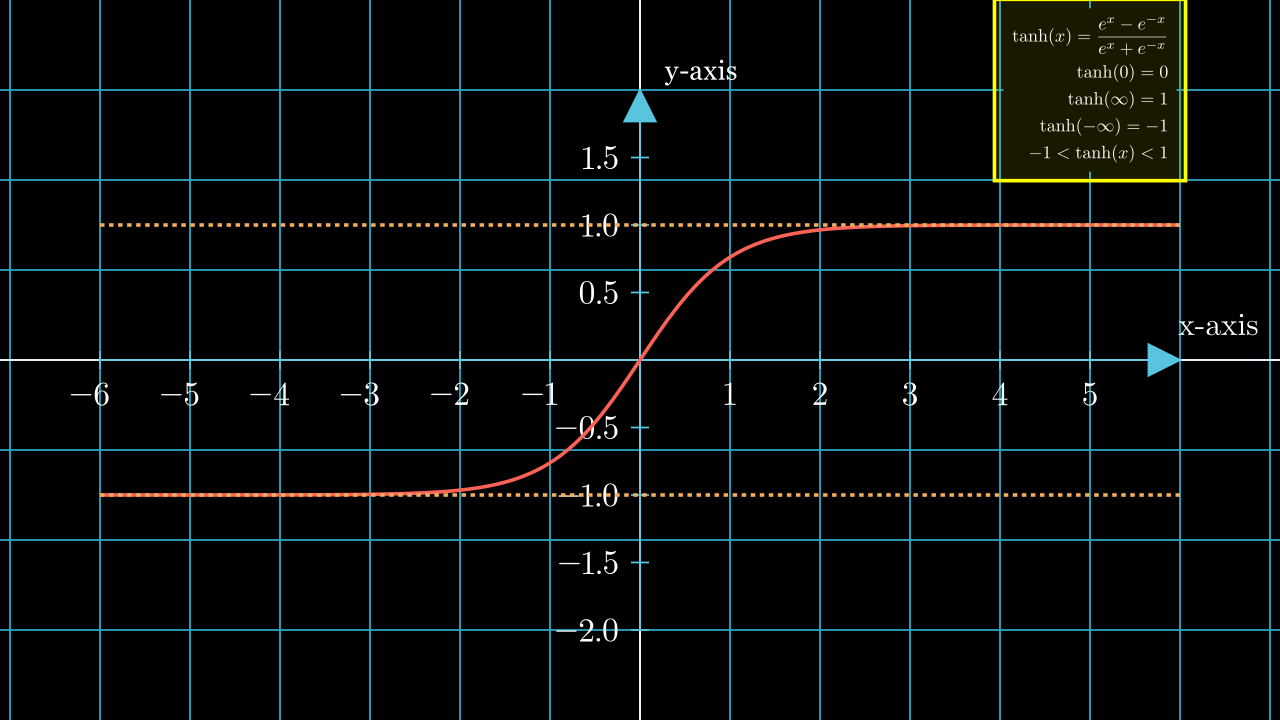

In [ ]:
%%manim -qm -v WARNING TanhFunction

from manim import *

class TanhFunction(Scene):
    def construct(self):
        # Create axes
        plane = NumberPlane()
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 2, 0.5], # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(
            Tex("x-axis").scale(0.7), Text("y-axis").scale(0.45)
        )

        # Define the tanh function
        tanh = lambda x: np.tanh(x)
        tanh_graph = axes.plot(tanh, color=RED)

        # Add a label to the graph with the tanh formula
        graph_label_text = MathTex(
            '\\tanh(x) = \\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}',
            '\\\\',
            '\\tanh(0) = 0',
            '\\\\',
            '\\tanh(\\infty) = 1',
            '\\\\',
            '\\tanh(-\\infty) = -1',
            '\\\\',
            '-1 < \\tanh(x) < 1'
        ).scale(0.4)
        graph_label_bg1 = SurroundingRectangle(graph_label_text, fill_opacity=0.1, buff=0.2)
        graph_label_bg = BackgroundRectangle(graph_label_text, fill_opacity=1, buff=0.1)
        graph_label = VGroup(graph_label_bg, graph_label_bg1, graph_label_text).shift(UP * 3 + RIGHT * 5)

        # Dotted lines at y = 1 and y = -1
        dotted_line_1 = DashedLine(start=axes.c2p(-6, 1), end=axes.c2p(6, 1), color=GOLD)
        dotted_line_2 = DashedLine(start=axes.c2p(-6, -1), end=axes.c2p(6, -1), color=GOLD)

        # Add elements to the scene
        self.add(plane, axes, labels, tanh_graph, dotted_line_1, dotted_line_2, graph_label)


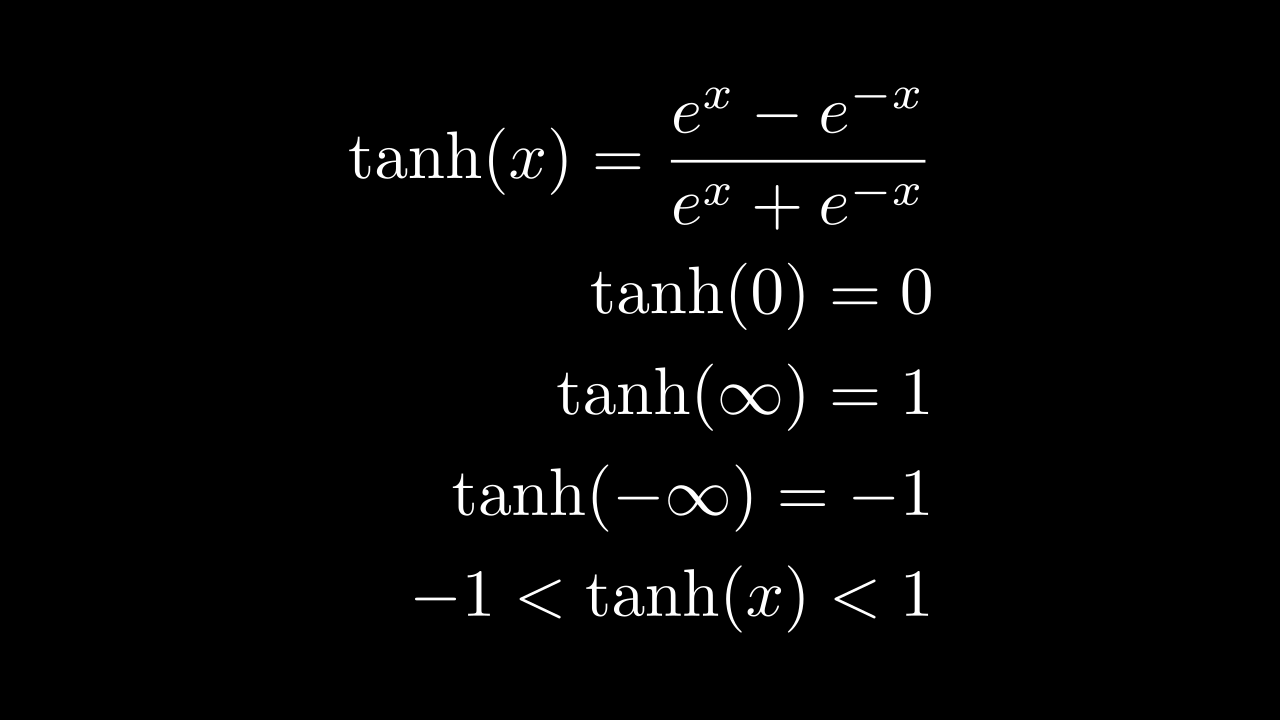

In [ ]:
%%manim -qm -v WARNING TanhFormulas

from manim import *

class TanhFormulas(Scene):
    def construct(self):
        # Formulas related to the tanh function
        formulas = MathTex(
            '\\tanh(x) = \\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}',
            '\\\\',
            '\\tanh(0) = 0',
            '\\\\',
            '\\tanh(\\infty) = 1',
            '\\\\',
            '\\tanh(-\\infty) = -1',
            '\\\\',
            '-1 < \\tanh(x) < 1'
        ).scale(1.5)

        # Center the formulas on the screen
        formulas.move_to(ORIGIN)

        # Add the formulas to the scene
        self.add(formulas)


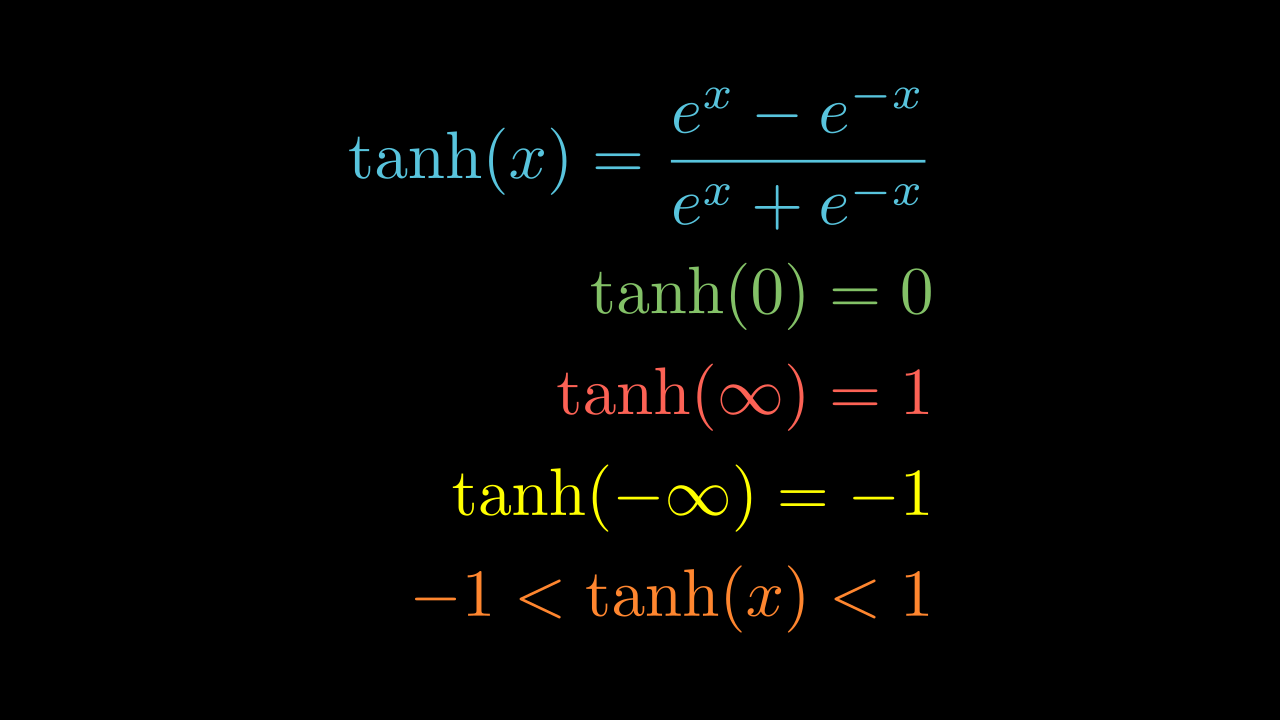

In [ ]:
%%manim -qm -v WARNING TanhFormulas

from manim import *

class TanhFormulas(Scene):
    def construct(self):
        # Formulas related to the tanh function with different colors
        formulas = MathTex(
            '\\tanh(x) = \\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}',
            '\\\\',
            '\\tanh(0) = 0',
            '\\\\',
            '\\tanh(\\infty) = 1',
            '\\\\',
            '\\tanh(-\\infty) = -1',
            '\\\\',
            '-1 < \\tanh(x) < 1',
            tex_to_color_map={
                "\\tanh(x) = \\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}": BLUE,
                "\\tanh(0) = 0": GREEN,
                "\\tanh(\\infty) = 1": RED,
                "\\tanh(-\\infty) = -1": YELLOW,
                "-1 < \\tanh(x) < 1": ORANGE
            }
        ).scale(1.5)

        # Center the formulas on the screen
        formulas.move_to(ORIGIN)

        # Add the formulas to the scene
        self.add(formulas)


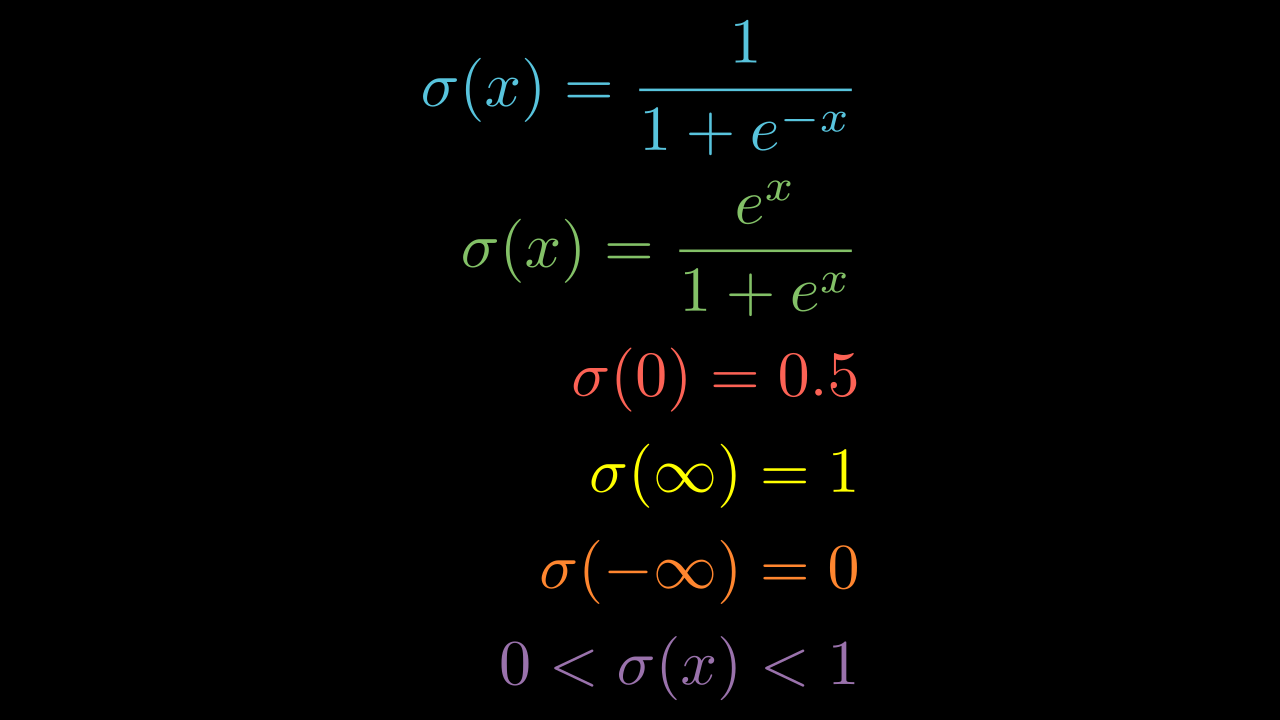

In [ ]:
%%manim -qm -v WARNING SigmoidFormulas



class SigmoidFormulas(Scene):
    def construct(self):
        # Formulas related to the sigmoid function with different colors
        formulas = MathTex(
            '\\sigma(x) = \\frac{1}{1 + e^{-x}}',
            '\\\\',
            '\\sigma(x) = \\frac{e^{x}}{1 + e^{x}}',
            '\\\\',
            '\\sigma(0) = 0.5',
            '\\\\',
            '\\sigma(\\infty) = 1',
            '\\\\',
            '\\sigma(-\\infty) = 0',
            '\\\\',
            '0 < \\sigma(x) < 1',
            tex_to_color_map={
                "\\sigma(x) = \\frac{1}{1 + e^{-x}}": BLUE,
                "\\sigma(x) = \\frac{e^{x}}{1 + e^{x}}": GREEN,
                "\\sigma(0) = 0.5": RED,
                "\\sigma(\\infty) = 1": YELLOW,
                "\\sigma(-\\infty) = 0": ORANGE,
                "0 < \\sigma(x) < 1": PURPLE
            }
        ).scale(1.43)

        # Center the formulas on the screen
        formulas.move_to(ORIGIN)

        # Add the formulas to the scene
        self.add(formulas)


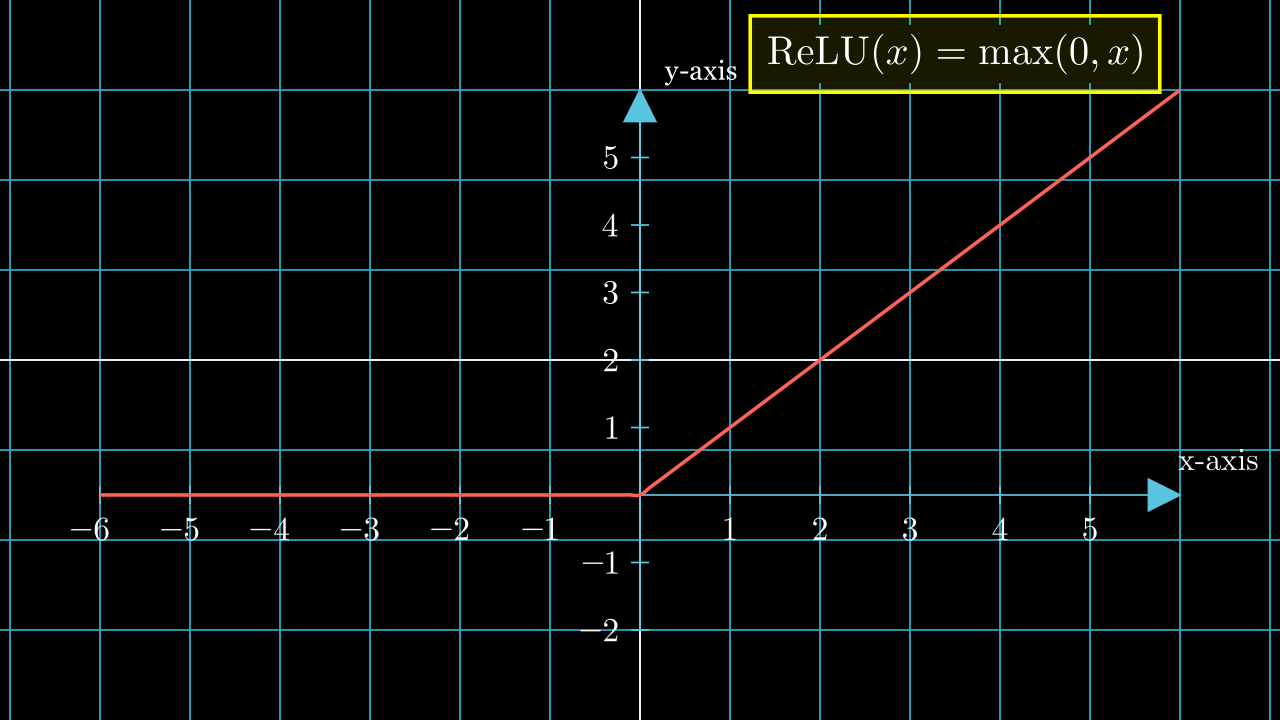

In [ ]:
%%manim -qm -v WARNING ReLUFunction

from manim import *

class ReLUFunction(Scene):
    def construct(self):
        # Create axes
        plane = NumberPlane()
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 6, 1],  # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(
            Tex("x-axis").scale(0.7), Text("y-axis").scale(0.45)
        )

        # Define the ReLU function
        relu = lambda x: np.maximum(0, x)
        relu_graph = axes.plot(relu, color=RED)

        # Add a label to the graph with the ReLU formula
        graph_label_text = MathTex(
            '\\text{ReLU}(x) = \\max(0, x)',
        ).scale(0.9).shift(0.5*RIGHT+0.4*UP)
        graph_label_bg1 = SurroundingRectangle(graph_label_text, fill_opacity=0.1, buff=0.2)
        graph_label_bg = BackgroundRectangle(graph_label_text, fill_opacity=1, buff=0.1)
        graph_label = VGroup(graph_label_bg, graph_label_bg1, graph_label_text).shift(UP * 3 + RIGHT * 3)

        # Add elements to the scene
        self.add(plane, axes, labels, relu_graph, graph_label)


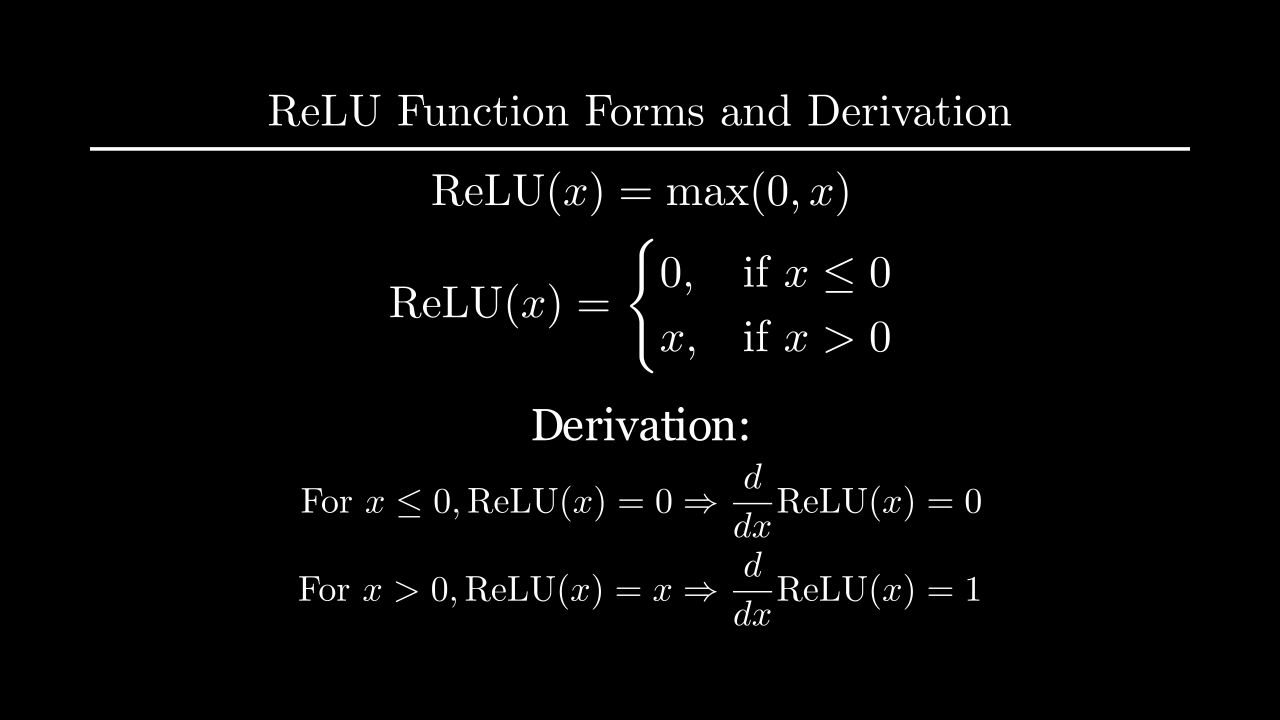

In [ ]:
%%manim -qm -v WARNING ReLUFunction

from manim import *

class ReLUFunction(Scene):
    def construct(self):
        # Title
        title = Title("ReLU Function Forms and Derivation")

        # Max form of ReLU
        max_form = MathTex(r"\text{ReLU}(x) = \max(0, x)").scale(1)
        max_form.next_to(title, DOWN)

        # Piecewise form of ReLU
        piecewise_form = MathTex(
            r"\text{ReLU}(x) = \begin{cases} 0, & \text{if } x \leq 0 \\ x, & \text{if } x > 0 \end{cases}"
        ).scale(1)
        piecewise_form.next_to(max_form, DOWN)

        # Derivation
        derivation_title = Text("Derivation:", font_size=36)
        derivation_title.next_to(piecewise_form, DOWN * 1.5)

        derivation = MathTex(
            r"\text{For } x \leq 0, \text{ReLU}(x) = 0 \Rightarrow \frac{d}{dx} \text{ReLU}(x) = 0",
            r"\\",
            r"\text{For } x > 0, \text{ReLU}(x) = x \Rightarrow \frac{d}{dx} \text{ReLU}(x) = 1"
        ).scale(0.8)
        derivation.next_to(derivation_title, DOWN)

        # Group everything
        all_parts = VGroup(title, max_form, piecewise_form, derivation_title, derivation)
        all_parts.move_to(ORIGIN)

        # Add to scene
        self.add(all_parts)


In [ ]:
%%manim -qm -v WARNING ReLUDerivation

from manim import *

class ReLUDerivation(Scene):
    def construct(self):
        # Display the piecewise form of ReLU
        relu_piecewise = MathTex(
            r"\text{ReLU}(x) = \begin{cases} 0, & \text{if } x \leq 0 \\ x, & \text{if } x > 0 \end{cases}"
        ).scale(1)
        relu_piecewise.to_edge(UP)

        # Explain the derivative for x <= 0
        derivative_case_1 = MathTex(
            r"\text{For } x \leq 0, \text{ReLU}(x) = 0 \Rightarrow \frac{d}{dx} \text{ReLU}(x) = 0"
        ).scale(0.8)
        derivative_case_1.next_to(relu_piecewise, DOWN, buff=1)

        # Explain the derivative for x > 0
        derivative_case_2 = MathTex(
            r"\text{For } x > 0, \text{ReLU}(x) = x \Rightarrow \frac{d}{dx} \text{ReLU}(x) = 1"
        ).scale(0.8)
        derivative_case_2.next_to(derivative_case_1, DOWN, buff=0.5)

        # Add elements to the scene
        self.play(Write(relu_piecewise))
        self.wait(1)
        self.play(Write(derivative_case_1))
        self.wait(1)
        self.play(Write(derivative_case_2))
        self.wait(2)


In [ ]:
%%manim -qm -v WARNING ReLUFormulas

from manim import *

class ReLUFormulas(Scene):
    def construct(self):
        # Formulas related to the ReLU function with different colors
        relu_formulas = MathTex(
            r"\text{ReLU}(x) = \max(0, x)",
            r"\\",
            r"\text{ReLU}(x) = \begin{cases} 0, & \text{if } x \leq 0 \\ x, & \text{if } x > 0 \end{cases}",
            r"\\",
            r"\text{For } x \leq 0, \, \text{ReLU}(x) = 0",
            r"\\",
            r"\text{For } x > 0, \, \text{ReLU}(x) = x",
            r"\\",
            r"\frac{d}{dx} \text{ReLU}(x) = \begin{cases} 0, & \text{if } x < 0 \\ 1, & \text{if } x > 0 \end{cases}",
            r"\\",
            r"\text{ReLU is non-linear}",
            r"\\",
            r"\text{ReLU is non-differentiable at } x = 0",
            tex_to_color_map={
                "\\text{ReLU}(x) = \\max(0, x)": BLUE,
                "\\begin{cases} 0, & \\text{if } x \\leq 0 \\ x, & \\text{if } x > 0 \\end{cases}": GREEN,
                "\\text{For } x \\leq 0": YELLOW,
                "\\text{For } x > 0": ORANGE,
                "\\frac{d}{dx} \\text{ReLU}(x)": PURPLE,
                "\\text{ReLU is non-linear}": RED,
                "\\text{ReLU is non-differentiable at } x = 0": PINK,
            }
        ).scale(0.8)

        # Center the formulas on the screen
        relu_formulas.move_to(ORIGIN)

        # Add the formulas to the scene
        self.play(Write(relu_formulas))
        self.wait(2)


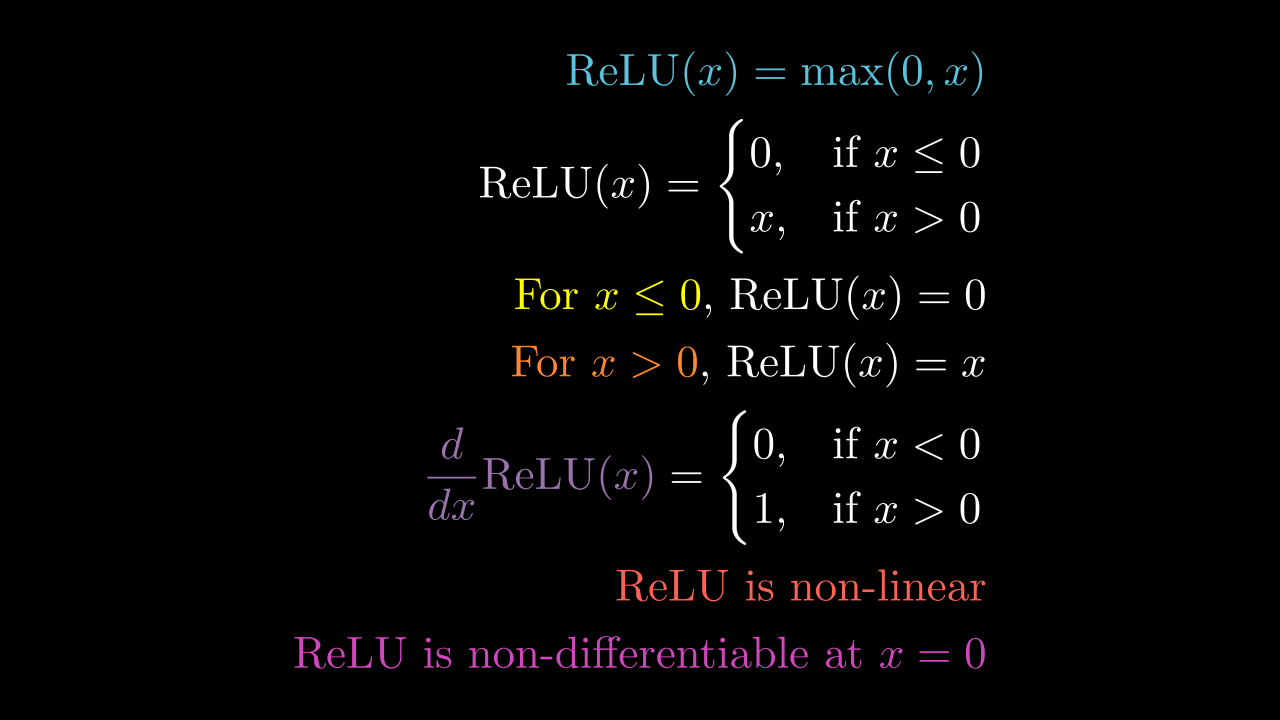

In [ ]:
%%manim -qm -v WARNING ReLUFormulas

from manim import *

class ReLUFormulas(Scene):
    def construct(self):
        # Formulas related to the ReLU function with different colors
        relu_formulas = MathTex(
            r"\text{ReLU}(x) = \max(0, x)",
            r"\\",
            r"\text{ReLU}(x) = \begin{cases} 0, & \text{if } x \leq 0 \\ x, & \text{if } x > 0 \end{cases}",
            r"\\",
            r"\text{For } x \leq 0, \, \text{ReLU}(x) = 0",
            r"\\",
            r"\text{For } x > 0, \, \text{ReLU}(x) = x",
            r"\\",
            r"\frac{d}{dx} \text{ReLU}(x) = \begin{cases} 0, & \text{if } x < 0 \\ 1, & \text{if } x > 0 \end{cases}",
            r"\\",
            r"\text{ReLU is non-linear}",
            r"\\",
            r"\text{ReLU is non-differentiable at } x = 0",
            tex_to_color_map={
                "\\text{ReLU}(x) = \\max(0, x)": BLUE,
                "\\begin{cases} 0, & \\text{if } x \\leq 0 \\ x, & \\text{if } x > 0 \\end{cases}": GREEN,
                "\\text{For } x \\leq 0": YELLOW,
                "\\text{For } x > 0": ORANGE,
                "\\frac{d}{dx} \\text{ReLU}(x)": PURPLE,
                "\\text{ReLU is non-linear}": RED,
                "\\text{ReLU is non-differentiable at } x = 0": PINK,
            }
        ).scale(1)

        # Center the formulas on the screen
        relu_formulas.move_to(ORIGIN)

        # Add the formulas to the scene without animation
        self.add(relu_formulas)


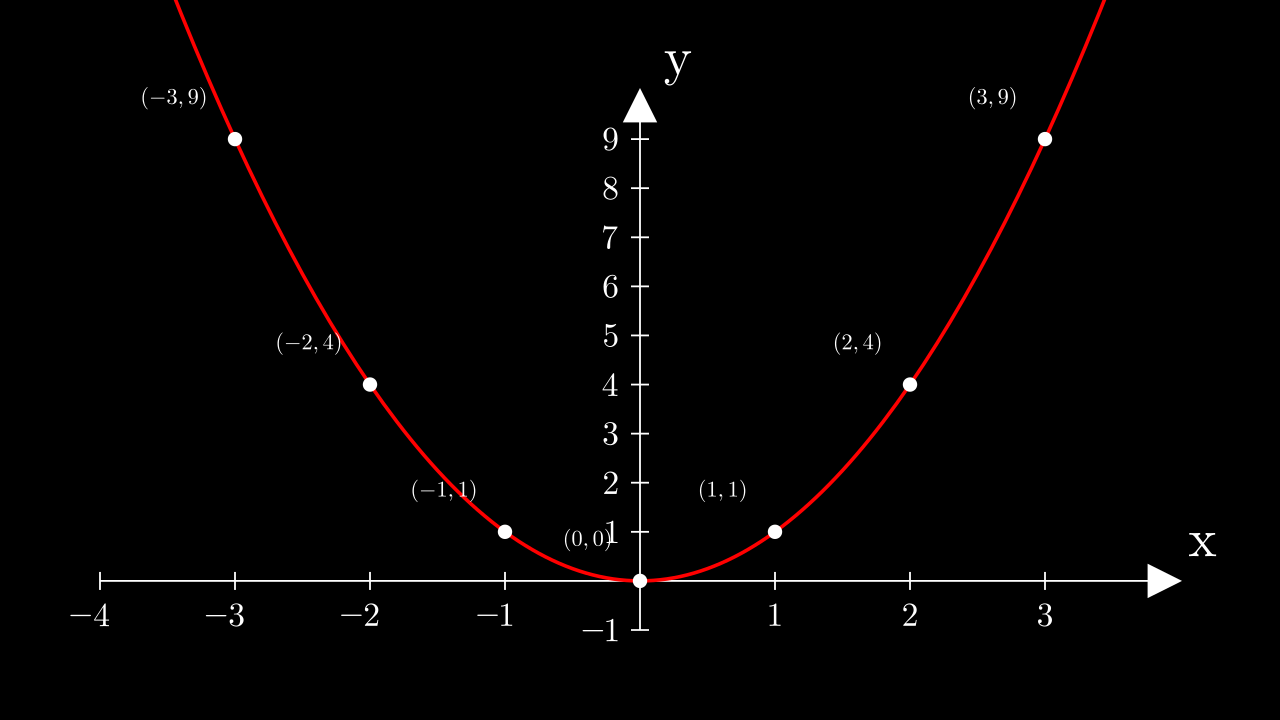

In [ ]:
%%manim -qm -v WARNING QuadraticGraph

class QuadraticGraph(Scene):
    def construct(self):
        # Create the axes
        axes = Axes(
            x_range=[-4, 4, 1],
            y_range=[-1, 10, 1],
            axis_config={"include_numbers": True},
        )

        # Create the graph
        graph = axes.plot(lambda x: x**2, color=PURE_RED)
        
        # Create the dots for specific points
        dots = VGroup(*[Dot(axes.c2p(x, x**2)) for x in range(-3, 4)])

        # Labels for the dots
        dot_labels = VGroup(
            *[
                MathTex(f"({x}, {x**2})", font_size=24).next_to(dots[i], UP + LEFT)
                for i, x in enumerate(range(-3, 4))
            ]
        )

        # Create the labels for the graph
        graph_label = MathTex("y = x^2", font_size=24).next_to(graph, UP + RIGHT)
        
        # Drawing the objects
        self.add(axes, graph, dots, dot_labels, graph_label)

        # Add the axes labels
        x_label = axes.get_x_axis_label(Tex("x").scale(1.2))
        y_label = axes.get_y_axis_label(Tex("y").scale(1.2))
        self.add(x_label, y_label)


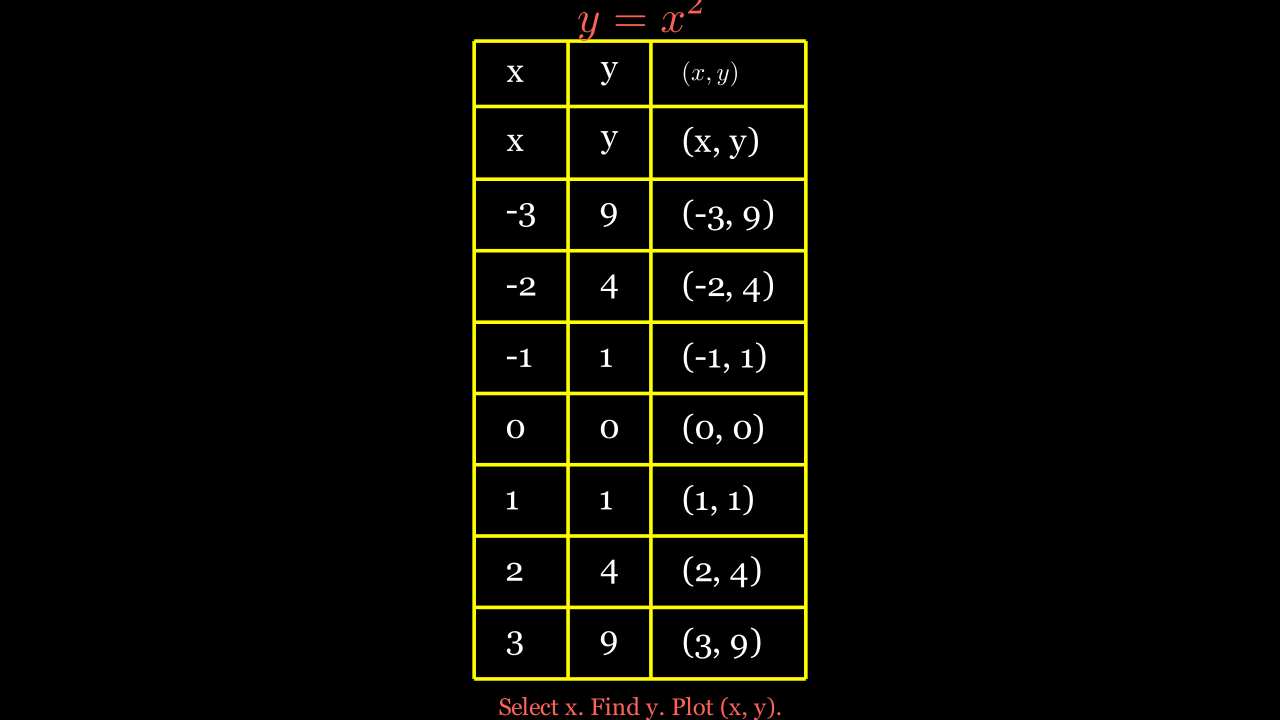

In [ ]:
%%manim -qm -v WARNING QuadraticTable

from manim import *

class QuadraticTable(Scene):
    def construct(self):
        # Create the table
        table = Table(
            [["x", "y", "(x, y)"],
             ["-3", "9", "(-3, 9)"],
             ["-2", "4", "(-2, 4)"],
             ["-1", "1", "(-1, 1)"],
             ["0", "0", "(0, 0)"],
             ["1", "1", "(1, 1)"],
             ["2", "4", "(2, 4)"],
             ["3", "9", "(3, 9)"]],
            col_labels=[Text("x"), Text("y"), MathTex("(x, y)")],
            row_labels=None,
            include_outer_lines=True,
            arrange_in_grid_config={"cell_alignment": LEFT},
            line_config={"color": YELLOW}
        ).scale(0.56)

        # Title of the table (y = x^2)
        title = MathTex("y = x^2", color=RED).scale(1)
        title.next_to(table, UP, buff=0.5).shift(0.5*DOWN)

        # Instructions below the table
        instructions = Text("Select x. Find y. Plot (x, y).", color=RED).scale(0.4)
        instructions.next_to(table, DOWN, buff=0.5).shift(0.3*UP)

        # Add elements to the scene
        self.add(table, title, instructions)

        

In [ ]:
%%manim -qm -v WARNING FunctionGraphScene
class FunctionGraphScene(Scene):
    def construct(self):
        # Create axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-3, 3, 1],
            axis_config={"color": BLUE}
        )

        # Create a graph
        graph = axes.plot(lambda x: 0.2 * (x - 3) * (x + 3), color=PURPLE)

        # Define the point of interest on the graph
        x_val = 3
        y_val = 0.2 * (x_val - 3) * (x_val + 3)
        point = axes.coords_to_point(x_val, y_val)
        
        # Create dot and labels
        dot = Dot(point, color=RED)
        input_label = MathTex("f(3)").set_color(RED)
        output_label = MathTex("(3, f(3))").set_color(RED)

        # Position labels
        input_label.next_to(dot, UP)
        output_label.next_to(dot, RIGHT)

        # Draw vertical and horizontal lines to the axes
        v_line = DashedLine(axes.c2p(x_val, 0), point, color=RED)
        h_line = DashedLine(axes.c2p(0, y_val), point, color=RED)

        # Create a label for the function
        graph_label = axes.get_graph_label(graph, label='f(x)', x_val=2, direction=UP).set_color(PURPLE)

        # Add the elements to the scene
        self.play(Create(axes), Create(graph), Write(graph_label))
        self.play(Create(v_line), Create(h_line), DrawBorderThenFill(dot))
        self.play(Write(input_label), Write(output_label))

        # Add a box around the function label (similar to the "input, output" box in the image)
        box = SurroundingRectangle(graph_label, color=WHITE)
        self.play(Create(box))


In [ ]:
%%manim -qm -v WARNING LeakyReLUFunction

class LeakyReLUFunction(Scene):
    def construct(self):
        # Create axes
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 6, 1],  # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(x_label="x-axis", y_label="y-axis")

        # Define the Leaky ReLU function
        def leaky_relu(x):
            return np.maximum(0.1 * x, x)  # Replace 0.1 with the negative slope you desire

        # Create the graph for Leaky ReLU
        graph = axes.plot(leaky_relu, color=RED)

        # Add a label to the graph with the Leaky ReLU formula
        graph_label = axes.get_graph_label(graph, label=MathTex(r'\text{Leaky ReLU}(x) = \begin{cases} 0.1x, & \text{if } x < 0 \\ x, & \text{if } x \geq 0 \end{cases}'), x_val=-4, direction=UP).set_color(GOLD)
        graph_label.shift(0.6*UP+0.6*LEFT).scale(0.7)
        # Add elements to the scene
        self.play(Create(axes), Write(labels))
        self.play(Create(graph), Write(graph_label))


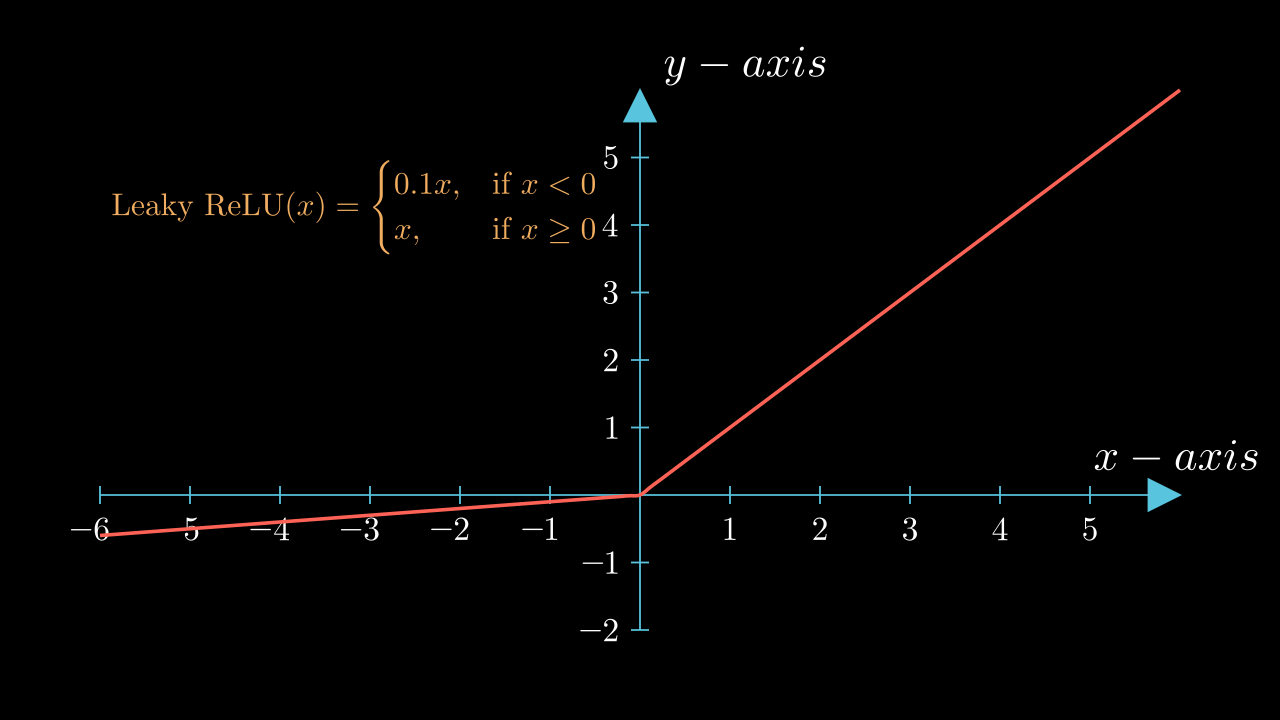

In [ ]:
%%manim -qm -v WARNING LeakyReLUFunction


class LeakyReLUFunction(Scene):
    def construct(self):
        # Create axes
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 6, 1],  # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(x_label="x-axis", y_label="y-axis")

        # Define the Leaky ReLU function
        def leaky_relu(x):
            return np.maximum(0.1 * x, x)  # Replace 0.1 with the negative slope you desire

        # Create the graph for Leaky ReLU
        graph = axes.plot(leaky_relu, color=RED)

        # Add a label to the graph with the Leaky ReLU formula
        graph_label = axes.get_graph_label(graph, label=MathTex(r'\text{Leaky ReLU}(x) = \begin{cases} 0.1x, & \text{if } x < 0 \\ x, & \text{if } x \geq 0 \end{cases}'), x_val=-4, direction=UP).set_color(GOLD)
        graph_label.shift(2.5*UP+0.4*LEFT).scale(0.7)

        # Add elements to the scene without animation
        self.add(axes, labels, graph, graph_label)


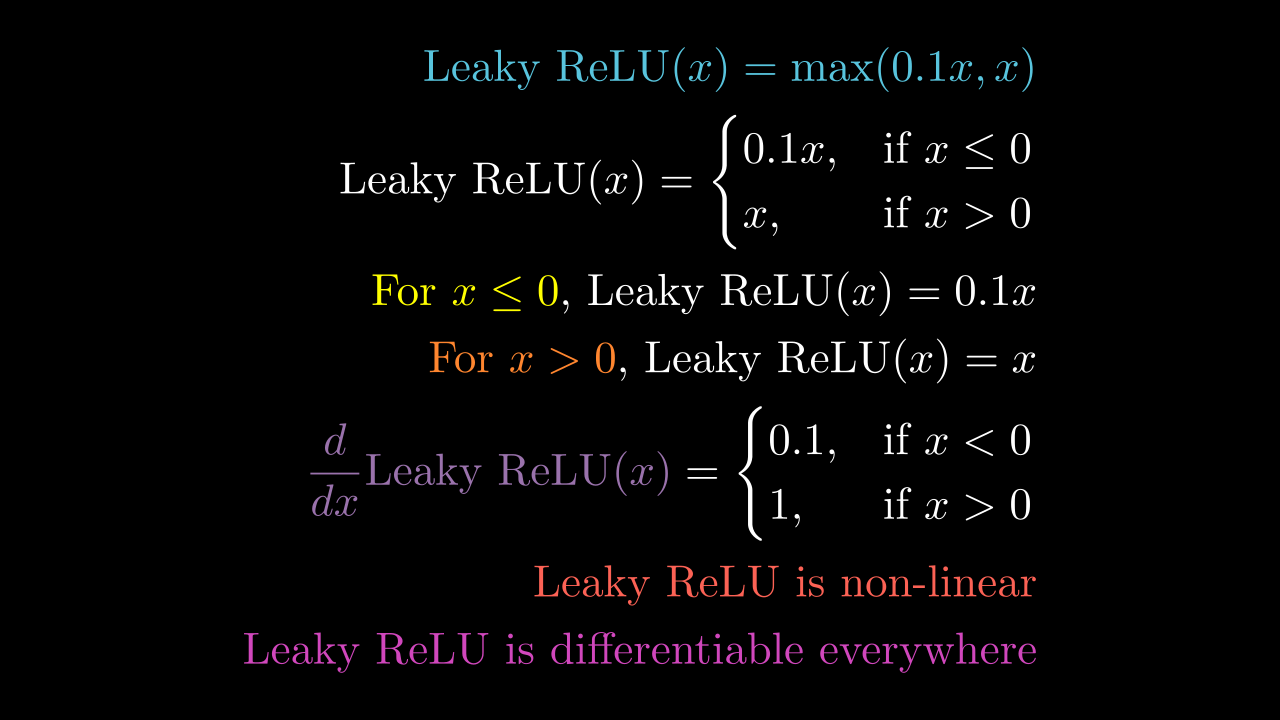

In [ ]:
%%manim -qm -v WARNING LeakyReLUFormulas

class LeakyReLUFormulas(Scene):
    def construct(self):
        # Formulas related to the Leaky ReLU function with different colors
        leaky_relu_formulas = MathTex(
            r"\text{Leaky ReLU}(x) = \max(0.1x, x)",
            r"\\",
            r"\text{Leaky ReLU}(x) = \begin{cases} 0.1x, & \text{if } x \leq 0 \\ x, & \text{if } x > 0 \end{cases}",
            r"\\",
            r"\text{For } x \leq 0, \, \text{Leaky ReLU}(x) = 0.1x",
            r"\\",
            r"\text{For } x > 0, \, \text{Leaky ReLU}(x) = x",
            r"\\",
            r"\frac{d}{dx} \text{Leaky ReLU}(x) = \begin{cases} 0.1, & \text{if } x < 0 \\ 1, & \text{if } x > 0 \end{cases}",
            r"\\",
            r"\text{Leaky ReLU is non-linear}",
            r"\\",
            r"\text{Leaky ReLU is differentiable everywhere}",
            tex_to_color_map={
                "\\text{Leaky ReLU}(x) = \\max(0.1x, x)": BLUE,
                "\\begin{cases} 0.1x, & \\text{if } x \\leq 0 \\ x, & \\text{if } x > 0 \\end{cases}": GREEN,
                "\\text{For } x \\leq 0": YELLOW,
                "\\text{For } x > 0": ORANGE,
                "\\frac{d}{dx} \\text{Leaky ReLU}(x)": PURPLE,
                "\\text{Leaky ReLU is non-linear}": RED,
                "\\text{Leaky ReLU is differentiable everywhere}": PINK,
            }
        ).scale(1)

        # Center the formulas on the screen
        leaky_relu_formulas.move_to(ORIGIN)

        # Add the formulas to the scene without animation
        self.add(leaky_relu_formulas)


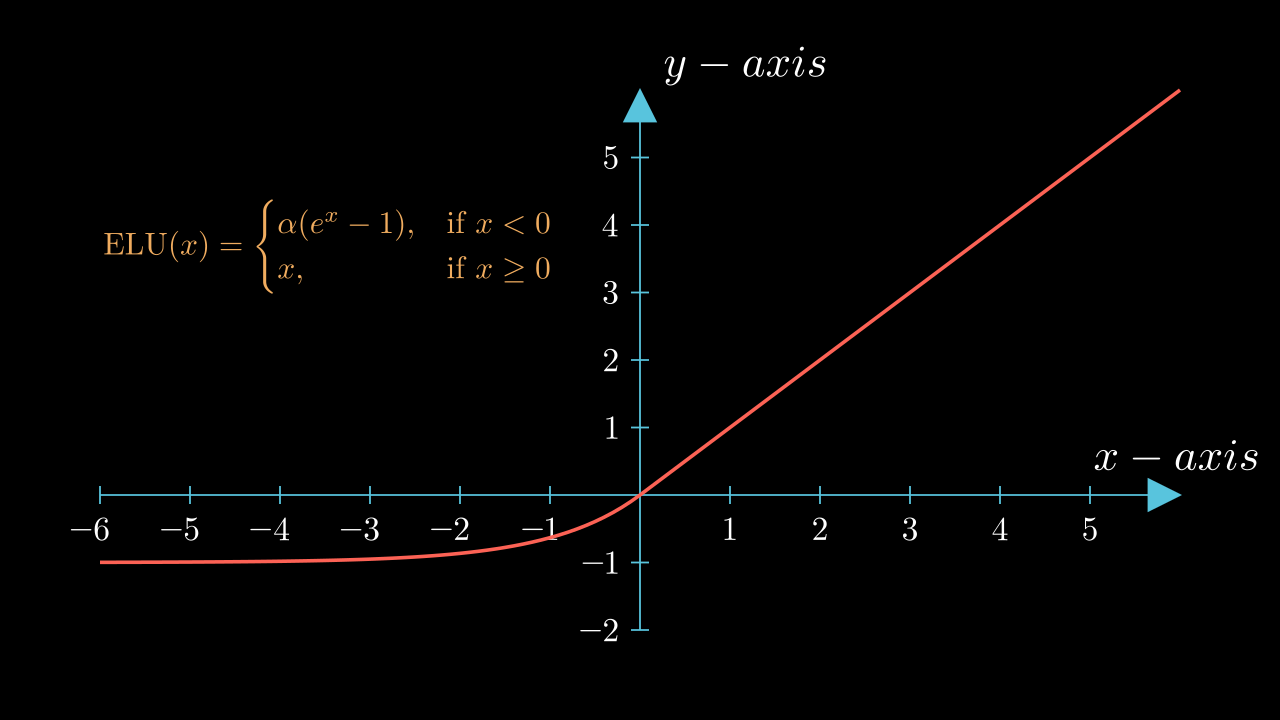

In [ ]:
%%manim -qm -v WARNING ELUFunction

class ELUFunction(Scene):
    def construct(self):
        # Create axes
        axes = Axes(
            x_range=[-6, 6, 1],  # x_min, x_max, x_step
            y_range=[-2, 6, 1],  # y_min, y_max, y_step
            axis_config={"color": BLUE},
        ).add_coordinates()
        labels = axes.get_axis_labels(x_label="x-axis", y_label="y-axis")

        # Define the ELU function
        alpha = 1  # Scaling parameter for the negative values
        def elu(x):
            return np.where(x < 0, alpha * (np.exp(x) - 1), x)

        # Create the graph for ELU
        graph = axes.plot(elu, color=RED)

        # Add a label to the graph with the ELU formula
        graph_label = axes.get_graph_label(graph, label=MathTex(r'\text{ELU}(x) = \begin{cases} \alpha(e^x - 1), & \text{if } x < 0 \\ x, & \text{if } x \geq 0 \end{cases}'), x_val=-4, direction=UP).set_color(GOLD)
        graph_label.shift(2.5*UP+0.4*LEFT).scale(0.7)

        # Add elements to the scene without animation
        self.add(axes, labels, graph, graph_label)


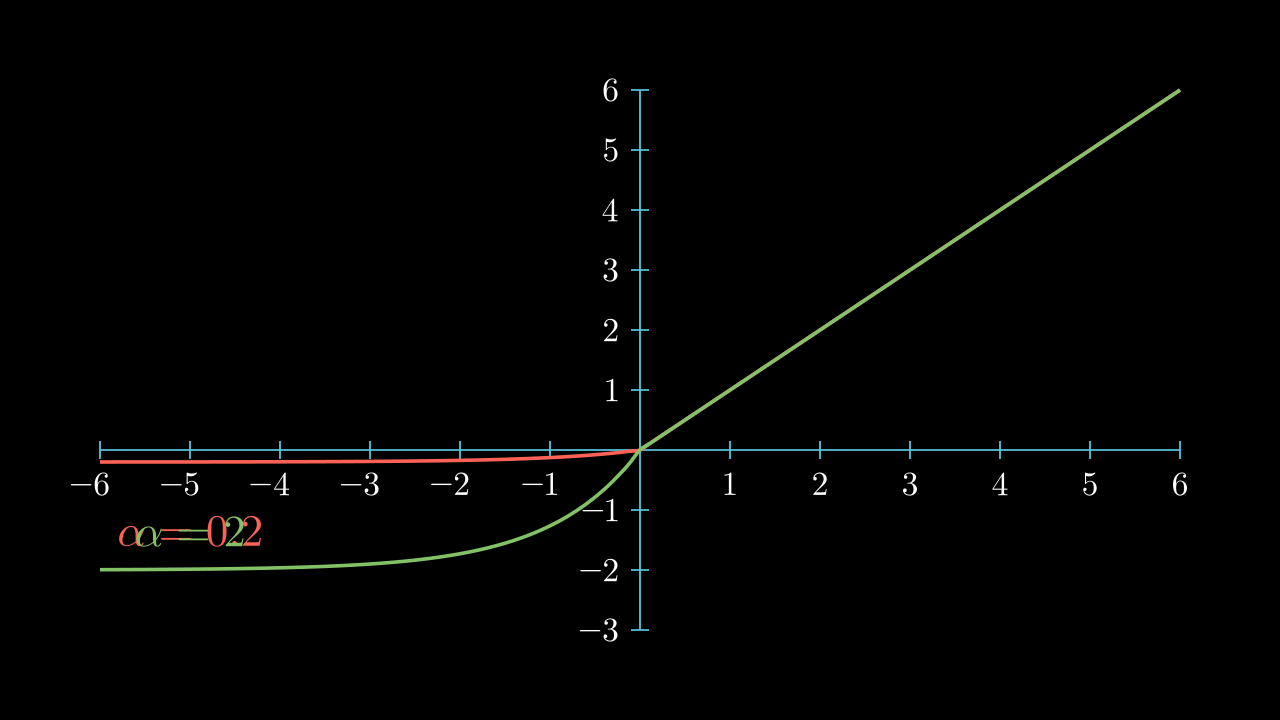

In [ ]:
%%manim -qm -v WARNING ELUFunctionGraphs

class ELUFunctionGraphs(Scene):
    def construct(self):
        # Create axes
        axes = Axes(
            x_range=[-6, 6, 1],
            y_range=[-3, 6, 1],
            axis_config={"color": BLUE},
            tips=False,
        ).add_coordinates()

        # Define the ELU function with different alpha values
        alpha_values = [0.2, 2]
        colors = [RED, GREEN, YELLOW, ORANGE, PURPLE]

        elu_graphs = VGroup()

        # Create a graph for each alpha value and add a label
        for alpha, color in zip(alpha_values, colors):
            elu_graph = axes.plot(lambda x: alpha * (np.exp(x) - 1) if x < 0 else x, color=color)
            elu_graphs.add(elu_graph)

        # Add labels for each alpha value
        graph_labels = VGroup(
            *[
                axes.get_graph_label(elu_graphs[i], label=MathTex(f"\\alpha={alpha}"), x_val=-5, direction=UP).set_color(colors[i])
                for i, alpha in enumerate(alpha_values)
            ]
        )

        # Add elements to the scene
        self.add(axes, elu_graphs, graph_labels)


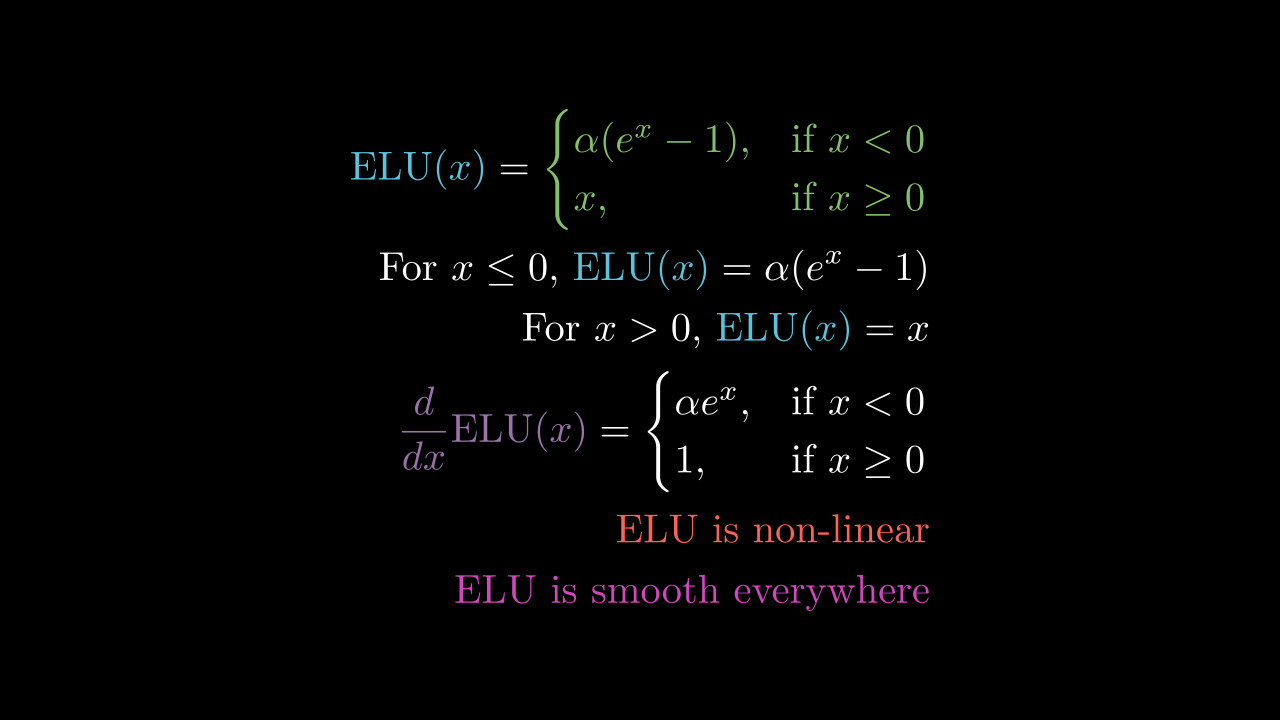

In [ ]:
%%manim -qm -v WARNING ELUFormulas

class ELUFormulas(Scene):
    def construct(self):
        # Formulas related to the ELU function with different colors
        elu_formulas = MathTex(
            r"\text{ELU}(x) = \begin{cases} \alpha(e^x - 1), & \text{if } x < 0 \\ x, & \text{if } x \geq 0 \end{cases}",
            r"\\",
            r"\text{For } x \leq 0, \, \text{ELU}(x) = \alpha(e^x - 1)",
            r"\\",
            r"\text{For } x > 0, \, \text{ELU}(x) = x",
            r"\\",
            r"\frac{d}{dx} \text{ELU}(x) = \begin{cases} \alpha e^x, & \text{if } x < 0 \\ 1, & \text{if } x \geq 0 \end{cases}",
            r"\\",
            r"\text{ELU is non-linear}",
            r"\\",
            r"\text{ELU is smooth everywhere}",
            tex_to_color_map={
                r"\text{ELU}(x)": BLUE,
                r"\begin{cases} \alpha(e^x - 1), & \text{if } x < 0 \\ x, & \text{if } x \geq 0 \end{cases}": GREEN,
                r"\frac{d}{dx} \text{ELU}(x)": PURPLE,
                r"\text{ELU is non-linear}": RED,
                r"\text{ELU is smooth everywhere}": PINK,
            }
        ).scale(0.9)

        # Center the formulas on the screen
        elu_formulas.move_to(ORIGIN)

        # Add the formulas to the scene without animation
        self.add(elu_formulas)


In [ ]:
%%manim -qm -v WARNING SoftmaxSurface

class SoftmaxSurface(ThreeDScene):
    def construct(self):
        # Define axes
        axes = ThreeDAxes(
            x_range=[-2, 2, 0.5],
            y_range=[-2, 2, 0.5],
            z_range=[0, 1, 0.2]
        )

        # Define the softmax function for two variables (first component)
        def softmax_component(x, y):
            return np.exp(x) / (np.exp(x) + np.exp(y))

        # Create a surface plot for the softmax function
        softmax_surface = Surface(
            lambda u, v: axes.c2p(u, v, softmax_component(u, v)),
            u_range=[-2, 2],
            v_range=[-2, 2],
            resolution=(40, 40)
        )

        # Styling for the surface
        softmax_surface.set_style(fill_opacity=0.75, stroke_color=BLUE)

        # Add axes and surface to the scene
        self.set_camera_orientation(phi=60 * DEGREES, theta=45 * DEGREES)
        self.add(axes, softmax_surface)
        self.begin_ambient_camera_rotation(rate=0.1)  # Start rotating camera
        self.wait(5)


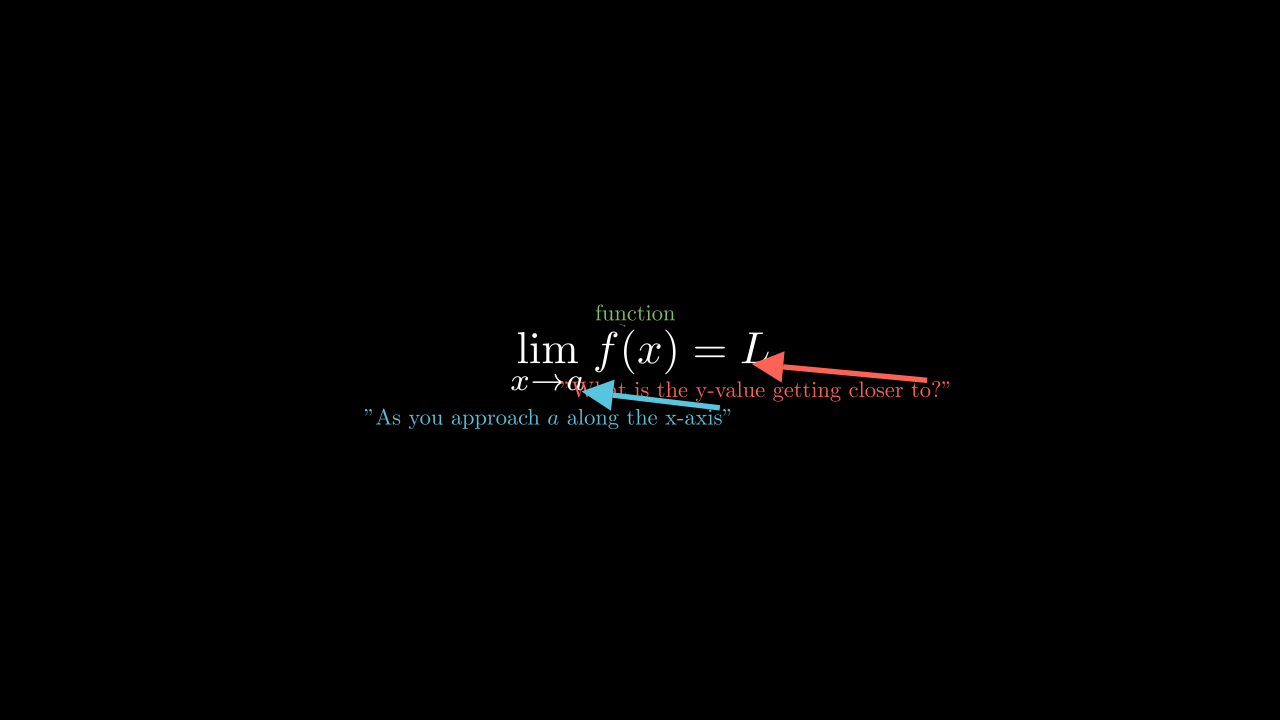

In [ ]:
%%manim -qm -v WARNING LimitExpression



class LimitExpression(Scene):
    def construct(self):
        # Define the components of the limit expression
        limit_text = MathTex(r"\lim_{", "x", r"\to", "a}", "f(", "x", ")", "=", "L", font_size=48)
        
        # Labels for each part of the limit expression
        function_label = Tex("function", color=GREEN).scale(0.5).next_to(limit_text[4:7], UP, buff=0.1)
        limit_label = Tex(r'"As you approach $a$ along the x-axis"', color=BLUE).scale(0.5).next_to(limit_text[1:4], DOWN, buff=0.2)
        equals_label = Tex(r'"What is the y-value getting closer to?"', color=RED).scale(0.5).next_to(limit_text[8], DOWN, buff=0.2)
        
        # Arrows pointing to parts of the limit expression
        function_arrow = Arrow(function_label, limit_text[4:7], buff=0.1, color=GREEN)
        limit_arrow = Arrow(limit_label, limit_text[3], buff=0.1, color=BLUE)
        equals_arrow = Arrow(equals_label, limit_text[8], buff=0.1, color=RED)
        
        # Add the components to the scene
        self.add(limit_text, function_label, limit_label, equals_label)
        self.add(function_arrow, limit_arrow, equals_arrow)


In [ ]:
%%manim -qm -v WARNING LimitExplanation




class LimitExplanation(Scene):
    def construct(self):
        # Create axes
        axes = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 5, 1],
            axis_config={"include_numbers": True},
        )

        # Create the graph of a function
        graph = axes.plot(lambda x: 0.2*x**2 + 1, color=BLUE, x_range=[0.5, 4])

        # Define the point a and the limit value L
        a = 3
        L = 0.2*a**2 + 1
        point_a = Dot(color=RED).move_to(axes.c2p(a, 0))
        point_L = Dot(color=GREEN).move_to(axes.c2p(a, L))

        # Labels for the points a and L
        label_a = Tex("a").next_to(point_a, DOWN)
        label_L = Tex("L").next_to(point_L, LEFT)

        # The explanation text
        explanation_text = Text(
            "As x approaches a, f(x) gets close to L",
            font_size=36
        ).to_edge(UP)

        # Create a dot at the start of x-axis
        moving_x_dot = Dot(color=YELLOW).move_to(axes.c2p(0.5, 0))

        # Create a moving dot along the graph
        moving_graph_dot = Dot(color=YELLOW).move_to(axes.c2p(0.5, graph.underlying_function(0.5)))

        # Define value trackers for x and y values
        x_tracker = ValueTracker(0.5)

        # Updaters to move the dots along the x-axis and the graph
        moving_x_dot.add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), 0)))
        moving_graph_dot.add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), graph.underlying_function(x_tracker.get_value()))))

        # Add elements to the scene
        self.add(axes, graph, point_a, label_a, point_L, label_L, explanation_text, moving_x_dot, moving_graph_dot)

        # Animate the dot moving towards point a
        self.play(x_tracker.animate.set_value(a), run_time=4, rate_func=linear)
        
        # Clear updaters after the animation
        moving_x_dot.clear_updaters()
        moving_graph_dot.clear_updaters()

        # Show the final position and value
        final_dot = Dot(color=ORANGE).move_to(axes.c2p(a, L))
        final_label = Tex("f(a)", color=ORANGE).next_to(final_dot, UP)
        self.add(final_dot, final_label)

        # Hold the final state for a moment
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING XApproachingFromBothSides

class XApproachingFromBothSides(Scene):
    def construct(self):
        # Create a number line
        number_line = NumberLine(
            x_range=[-1, 4, 1],
            length=10,
            include_numbers=True,
            include_tip=True
        )

        # Define the target value 'a'
        a = 2
        point_a = Dot(color=RED).move_to(number_line.n2p(a))

        # Label for the point 'a'
        label_a = Tex("a").next_to(point_a, UP)

        # Create two dots for left and right approach
        left_dot = Dot(color=GREEN).move_to(number_line.n2p(a - 1))
        right_dot = Dot(color=BLUE).move_to(number_line.n2p(a + 1))

        # Add elements to the scene
        self.add(number_line, point_a, label_a, left_dot, right_dot)

        # Animate the dots moving towards 'a' from both sides
        self.play(
            left_dot.animate.move_to(number_line.n2p(a - 0.1)),  # Slightly left to 'a'
            right_dot.animate.move_to(number_line.n2p(a + 0.1)),  # Slightly right to 'a'
            run_time=2,
            rate_func=linear
        )
        self.wait(0.5)

        # Animate the dots moving even closer to 'a'
        self.play(
            left_dot.animate.move_to(number_line.n2p(a - 0.01)),  # Very close left to 'a'
            right_dot.animate.move_to(number_line.n2p(a + 0.01)),  # Very close right to 'a'
            run_time=2,
            rate_func=linear
        )
        self.wait(1)

        # Fade out the dots to signify that they don't actually reach 'a'
        self.play(FadeOut(left_dot), FadeOut(right_dot))
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING XApproachingFromBothSides

class XApproachingFromBothSides(Scene):
    def construct(self):
        # Create a number line
        number_line = NumberLine(
            x_range=[0, 3, 1],
            length=10,
            include_numbers=True,
            include_tip=True
        )

        # Define the target value 'a'
        a = 2
        point_a = Dot(color=RED).move_to(number_line.n2p(a))

        # Label for the point 'a'
        label_a = Tex("a").next_to(point_a, UP)

        # Create two dots for left and right approach
        left_dot = Dot(color=GREEN).move_to(number_line.n2p(1.9))
        right_dot = Dot(color=BLUE).move_to(number_line.n2p(2.1))

        # Add elements to the scene
        self.add(number_line, point_a, label_a, left_dot, right_dot)

        # Animate the dots moving towards 'a' from both sides
        self.play(
            left_dot.animate.move_to(number_line.n2p(a - 0.01)),  # Very close left to 'a'
            right_dot.animate.move_to(number_line.n2p(a + 0.01)),  # Very close right to 'a'
            run_time=2,
            rate_func=linear
        )
        self.wait(1)

        # Fade out the dots to signify that they don't actually reach 'a'
        self.play(FadeOut(left_dot), FadeOut(right_dot))
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING LimitApproach

class LimitApproach(Scene):
    def construct(self):
        # Display the number 2
        number_two = Text("What is limit x tends to 2 from positive side of 2", font_size=40)
        self.play(Write(number_two))
        self.wait(1)

        # Fade out the number 2
        self.play(FadeOut(number_two))

        # Display the text "limit x tends to 2"
        limit_text = Tex(r"$\lim_{x \to 2^{+}}$", font_size=72)
        self.play(Write(limit_text))
        self.wait(1)

        # Move the limit text to the top of the screen
        self.play(limit_text.animate.to_edge(UP))

        # List of numbers to display
        numbers = ["2.1", "2.01", "2.001", "2.0001", "2.00001", "2.000001", "2.0000001", "2.00000001","2.000000001"]

        # Colors for each number
        colors = [RED, GREEN, BLUE, YELLOW, PURPLE, ORANGE, PINK, TEAL]

        # Create and display each number in sequence
        for i, (num, color) in enumerate(zip(numbers, colors)):
            num_text = Tex(num, font_size=48, color=color)
            if i == 0:
                num_text.next_to(limit_text, DOWN, buff=1)
            else:
                num_text.next_to(prev_num_text, DOWN, buff=0.2)

            self.play(Write(num_text))
            prev_num_text = num_text  # Keep track of the previous number for positioning

        # Add a series of dots below the last number
        dots = Tex(r"\ldots", font_size=48, color=WHITE)
        dots.next_to(prev_num_text, DOWN, buff=0.2)
        self.play(Write(dots))

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitApproachhh


class LimitApproachhh(Scene):
    def construct(self):
        # Display the question
        question = Text("What is the limit as x approaches 2 from the left?", font_size=40)
        self.play(Write(question))
        self.wait(1)

        # Fade out the question
        self.play(FadeOut(question))

        # Display the limit expression
        limit_text = Tex(r"$\lim_{x \to 2^{-}}$", font_size=72)
        self.play(Write(limit_text))
        self.wait(1)

        # Move the limit expression to the top of the screen
        self.play(limit_text.animate.to_edge(UP))

        # List of numbers to display, approaching 2 from the left
        numbers = ["1.9", "1.99", "1.999", "1.9999", "1.99999", "1.999999"]

        # Colors for each number
        colors = [RED, GREEN, BLUE, YELLOW, PURPLE, ORANGE]

        # Create and display each number in sequence
        for i, num in enumerate(numbers):
            num_text = Tex(num, font_size=48, color=colors[i % len(colors)])
            if i == 0:
                num_text.next_to(limit_text, DOWN, buff=1)
            else:
                num_text.next_to(prev_num_text, DOWN, buff=0.2)

            self.play(Write(num_text))
            prev_num_text = num_text  # Keep track of the previous number for positioning

        # Add a series of vertical dots below the last number to indicate the continuation
        dots = Tex(r"\vdots", font_size=48, color=WHITE)
        dots.next_to(prev_num_text, DOWN, buff=0.2)
        self.play(Write(dots))

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING NumberLineAnimation

class NumberLineAnimation(Scene):
    def construct(self):
        # Create an empty number line
        number_line = NumberLine(
            x_range=[1.8, 2.2, 0.1],
            length=10,
            include_numbers=False,
            include_tip=True
        )

        # Add the number line to the scene
        self.add(number_line)

        # Define the numbers and their positions on the number line
        numbers_and_positions = {
            "2": 2,
            "2.1": 2.1,
            "2.01": 2.01,
            "2.001": 2.001,
            "2.0001": 2.0001
        }

        # Distance for each number from the number line
        distances = {
            "2": 3,
            "2.1": 2,
            "2.01": 1,
            "2.001": 0.5,
            "2.0001": 0.2  # Reduced distance for visibility
        }

        # Animate the display of each number
        for number, position in numbers_and_positions.items():
            # Create a label for the number
            num_label = Tex(number, font_size=24).next_to(number_line.n2p(position), UP, buff=distances[number])
            
            # Add the label to the scene
            self.play(Write(num_label), run_time=1)

        # Hold the final state for a moment
        self.wait(2)



In [ ]:
%%manim -qm -v WARNING LimitApproach

class LimitApproach(Scene):
    def construct(self):
        # Display the text "What is limit x tends to 2 from positive side of 2"
        question_text = Text("What is limit x tends to 2 from positive side of 2", font_size=40)
        self.play(Write(question_text))
        self.wait(1)

        # Fade out the text
        self.play(FadeOut(question_text))

        # Display the text "limit x tends to 2+"
        limit_text = Tex(r"$\lim_{x \to 2^{+}}$", font_size=72)
        self.play(Write(limit_text))
        self.wait(1)

        # Move the limit text to the top of the screen
        self.play(limit_text.animate.to_edge(UP))

        # Create a number line
        number_line = NumberLine(
            x_range=[1, 3, 0.1],
            length=10,
            include_numbers=True,
            include_tip=True
        ).shift(DOWN)

        # Add the number line to the scene
        self.add(number_line)

        # Create a moving dot starting from 2.1
        moving_dot = Dot(color=RED).move_to(number_line.n2p(2.1))
        self.add(moving_dot)

        # List of numbers to display
        numbers = [2.1, 2.01, 2.001, 2.0001, 2.00001, 2.000001, 2.0000001, 2.00000001, 2.000000001]

        # Animate the dot moving towards 2 from the right
        for num in numbers:
            self.play(moving_dot.animate.move_to(number_line.n2p(num)), run_time=0.5)

        # Add a series of dots to signify the continuation
        dots = Tex(r"\ldots", font_size=48, color=WHITE).next_to(number_line.n2p(2), RIGHT, buff=0.1)
        self.play(Write(dots))

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitApproach


from manim import *

class LimitApproach(Scene):
    def construct(self):
        # Display the text "Meaning of lim x -> 2+"
        title_text = Text("Meaning of lim x -> 2+", font_size=40, color=RED)
        self.play(Write(title_text))
        self.wait(1)

        # Change the color of the text to white and move it to the top of the screen
        self.play(title_text.animate.set_color(WHITE).to_edge(UP))

        # Create a number line with specific numbers
        number_line = NumberLine(
            x_range=[1.999, 2.1],  # Min, Max, Step
            length=10,
            include_numbers=False,  # Custom numbers will be added
            include_tip=True
        ).shift(DOWN)

        # Add the number line to the scene
        self.add(number_line)

        # Adding custom labels for numbers
        numbers = [2, 2.01, 2.001, 2.0001, 2.00001, 2.000001]

        # Create and place labels for the numbers
        for num in numbers:
            label = Tex(f"{num}", font_size=20).next_to(number_line.n2p(num), DOWN, buff=0.1)
            self.add(label)

        # Create a red dot
        moving_dot = Dot(color=RED).move_to(number_line.n2p(2.1))

        # Add the dot to the scene
        self.add(moving_dot)

        # Animate the dot moving to each number
        for num in numbers:
            self.play(moving_dot.animate.move_to(number_line.n2p(num)), run_time=2)
            self.wait(1)

        # End of the scene
        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitVisualization

class LimitVisualization(Scene):
    def construct(self):
        # Initial statement
        initial_statement = Text("What is Lim x->a f(x) = L?", font_size=40, color=RED)
        self.play(Write(initial_statement))
        self.wait(1)

        # Move the statement up and set it as title
        self.play(
            initial_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # New statement
        new_statement = Text("As x goes closer and closer to a, f(x) goes closer and closer to L", 
                             font_size=36, color=GOLD)
        self.play(Write(new_statement))
        self.wait(1)

        # Move the new statement below the initial statement
        self.play(
            new_statement.animate.next_to(initial_statement, DOWN, buff=0.5)
        )

        # Define the function f(x) = (x-1)*(x-2)*(x+3)
        def func(x):
            return (x - 1) * (x - 2) * (x + 3)

        # Create axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-20, 20, 5],
            axis_config={"include_numbers": True}
        )

        # Create the graph of the function
        graph = axes.plot(func, color=BLUE)

        # Add axes and graph to the scene
        self.play(Create(axes), Create(graph))
        self.wait(1)

        # Initialize trackers
        x_tracker = ValueTracker(3)

        # Create a red dot at the starting x position
        x_dot = Dot(color=RED).add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), 0)))
        self.add(x_dot)

        # Create a yellow dot at the starting f(x) position
        fx_dot = Dot(color=YELLOW).add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value()))))
        self.add(fx_dot)

        # Animate both dots simultaneously
        self.play(x_tracker.animate.set_value(1.5), run_time=4, rate_func=linear)

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitVisualizationgraph

class LimitVisualizationgraph(Scene):
    def construct(self):
        # Initial statement
        initial_statement = Text("What is Lim x->a (a= 1.5) f(x) = L (L=-1.2)", font_size=40, color=RED)
        self.play(Write(initial_statement))
        self.wait(1)

        # Move the statement up and set it as title
        self.play(
            initial_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # New statement
        new_statement = Text("As x goes closer and closer to a, f(x) goes closer and closer to L", 
                             font_size=36, color=GOLD)
        self.play(Write(new_statement))
        self.wait(2)

        # Move the new statement below the initial statement
        self.play(
            new_statement.animate.next_to(initial_statement, DOWN, buff=0.5)
        )

        # Define the function f(x) = (x-1)*(x-2)*(x+3)
        def func(x):
            return (x - 1) * (x - 2) * (x + 3)

        # Create axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-20, 20, 5],
            axis_config={"include_numbers": True}
        )

        # Create the graph of the function
        graph = axes.plot(func, color=BLUE)

        # Add axes and graph to the scene
        self.play(Create(axes), Create(graph))
        self.wait(1)

        # Initialize trackers
        x_tracker = ValueTracker(3)

        # Create a red dot at the starting x position
        x_dot = Dot(color=RED).add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), 0)))
        self.add(x_dot)

        # Create a yellow dot at the starting f(x) position
        fx_dot = Dot(color=YELLOW).add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value()))))
        self.add(fx_dot)

        # Display the values taken by the red and yellow dots
        x_label = always_redraw(lambda: Tex(f"x = {x_tracker.get_value():.2f}", font_size=24).next_to(x_dot, UP, buff=0.1))
        fx_label = always_redraw(lambda: Tex(f"f(x) = {func(x_tracker.get_value()):.2f}", font_size=24).next_to(fx_dot, RIGHT, buff=0.1))

        self.add(x_label, fx_label)

        # Animate both dots simultaneously
        self.play(x_tracker.animate.set_value(1.5), run_time=4, rate_func=linear)

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitVisualizationWithLineLeft


class LimitVisualizationWithLineLeft(Scene):
    def construct(self):
        # Initial statement
        initial_statement = Text("What is Lim x->a (=1.5) f(x) = L (=-1.12)?", font_size=35, color=RED)
        self.play(Write(initial_statement))
        self.wait(1)

        # Move the statement up and set it as title
        self.play(
            initial_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # New statement
        new_statement = Text("As x goes closer and closer to a (=1.5), f(x) goes closer and closer to L (=-1.12)", 
                             font_size=36, color=GOLD).scale(0.7)
        self.play(Write(new_statement))
        self.wait(1)

        # Move the new statement below the initial statement
        self.play(
            new_statement.animate.next_to(initial_statement, DOWN, buff=0.5)
        )

        # Define the function f(x) = (x-1)*(x-2)*(x+3)
        def func(x):
            return (x - 1) * (x - 2) * (x + 3)

        # Create axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-20, 20, 5],
            axis_config={"include_numbers": True}
        )

        # Create the graph of the function
        graph = axes.plot(func, color=BLUE)

        # Add axes and graph to the scene
        self.play(Create(axes), Create(graph))
        self.wait(1)

        # Initialize trackers
        x_tracker = ValueTracker(3)

        # Create a red dot at the starting x position
        x_dot = Dot(color=RED).add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), 0)))
        self.add(x_dot)

        # Create a yellow dot at the starting f(x) position
        fx_dot = Dot(color=YELLOW).add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value()))))
        self.add(fx_dot)

        # Create a line connecting the red dot and yellow dot
        connecting_line = always_redraw(lambda: DashedLine(x_dot.get_center(), fx_dot.get_center(), color=WHITE))
        self.add(connecting_line)

        # Display the values taken by the red and yellow dots
        x_label = always_redraw(lambda: Tex(f"x = {x_tracker.get_value():.2f}", font_size=24).next_to(x_dot, UP, buff=0.1))
        fx_label = always_redraw(lambda: Tex(f"f(x) = {func(x_tracker.get_value()):.2f}", font_size=24).next_to(fx_dot, RIGHT, buff=0.1))

        self.add(x_label, fx_label)

        # Animate both dots simultaneously
        self.play(x_tracker.animate.set_value(1.5), run_time=4, rate_func=linear)

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitVisualizationWithLineRight

class LimitVisualizationWithLineRight(Scene):
    def construct(self):
        # Initial statement
        initial_statement = Text("What is Lim x->a (=1.5) f(x) = L (=-1.2)?", font_size=40, color=RED)
        self.play(Write(initial_statement))
        self.wait(1)

        # Move the statement up and set it as title
        self.play(
            initial_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # New statement
        new_statement = Text("As x goes closer and closer to 1.5, f(x) goes closer and closer to -1.12", 
                             font_size=36, color=GOLD).scale(0.8)
        self.play(Write(new_statement))
        self.wait(1)

        # Move the new statement below the initial statement
        self.play(
            new_statement.animate.next_to(initial_statement, DOWN, buff=0.5)
        )

        # Define the function f(x) = (x-1)*(x-2)*(x+3)
        def func(x):
            return (x - 1) * (x - 2) * (x + 3)

        # Create axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-20, 20, 5],
            axis_config={"include_numbers": True}
        )

        # Create the graph of the function
        graph = axes.plot(func, color=BLUE)

        # Add axes and graph to the scene
        self.play(Create(axes), Create(graph))
        self.wait(1)

        # Initialize trackers
        x_tracker = ValueTracker(0)  # Start at x = 0

        # Create a red dot at the starting x position
        x_dot = Dot(color=RED).add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), 0)))
        self.add(x_dot)

        # Create a yellow dot at the starting f(x) position
        fx_dot = Dot(color=YELLOW).add_updater(lambda m: m.move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value()))))
        self.add(fx_dot)

        # Create a line connecting the red dot and yellow dot
        connecting_line = always_redraw(lambda: DashedLine(x_dot.get_center(), fx_dot.get_center(), color=WHITE))
        self.add(connecting_line)

        # Display the values taken by the red and yellow dots
        x_label = always_redraw(lambda: Tex(f"x = {x_tracker.get_value():.2f}", font_size=24).next_to(x_dot, UP, buff=0.1))
        fx_label = always_redraw(lambda: Tex(f"f(x) = {func(x_tracker.get_value()):.2f}", font_size=24).next_to(fx_dot, RIGHT, buff=0.1))

        self.add(x_label, fx_label)

        # Animate both dots simultaneously
        self.play(x_tracker.animate.set_value(1.5), run_time=4, rate_func=linear)

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitVisualizationBothWays

class LimitVisualizationBothWays(Scene):
    def construct(self):
        # Initial statement
        initial_statement = Text("What is Lim x->a f(x) = L?", font_size=40, color=RED)
        self.play(Write(initial_statement))
        self.wait(1)

        # Move the statement up and set it as title
        self.play(
            initial_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # New statement
        new_statement = Text("As x goes closer and closer to a, f(x) goes closer and closer to L", 
                             font_size=36, color=GOLD)
        self.play(Write(new_statement))
        self.wait(1)

        # Move the new statement below the initial statement
        self.play(
            new_statement.animate.next_to(initial_statement, DOWN, buff=0.5)
        )

        # Define the function f(x) = (x-1)*(x-2)*(x+3)
        def func(x):
            return (x - 1) * (x - 2) * (x + 3)

        # Create axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-20, 20, 5],
            axis_config={"include_numbers": True}
        )

        # Create the graph of the function
        graph = axes.plot(func, color=BLUE)

        # Add axes and graph to the scene
        self.play(Create(axes), Create(graph))
        self.wait(1)

        # Initialize trackers for both directions
        x_tracker_right = ValueTracker(3)
        x_tracker_left = ValueTracker(0)

        # Create red dots for both directions
        x_dot_right = Dot(color=RED).add_updater(lambda m: m.move_to(axes.c2p(x_tracker_right.get_value(), 0)))
        x_dot_left = Dot(color=RED).add_updater(lambda m: m.move_to(axes.c2p(x_tracker_left.get_value(), 0)))
        self.add(x_dot_right, x_dot_left)

        # Create yellow dots for both directions
        fx_dot_right = Dot(color=YELLOW).add_updater(lambda m: m.move_to(axes.c2p(x_tracker_right.get_value(), func(x_tracker_right.get_value()))))
        fx_dot_left = Dot(color=YELLOW).add_updater(lambda m: m.move_to(axes.c2p(x_tracker_left.get_value(), func(x_tracker_left.get_value()))))
        self.add(fx_dot_right, fx_dot_left)

        # Create lines connecting red and yellow dots
        connecting_line_right = always_redraw(lambda: DashedLine(x_dot_right.get_center(), fx_dot_right.get_center(), color=WHITE))
        connecting_line_left = always_redraw(lambda: DashedLine(x_dot_left.get_center(), fx_dot_left.get_center(), color=WHITE))
        self.add(connecting_line_right, connecting_line_left)
        
        # Display the values taken by the red and yellow dots
        x_label1 = always_redraw(lambda: Tex(f"x = {x_tracker_right.get_value():.2f}", font_size=24).next_to(x_dot_right, UP, buff=0.1))
        fx_label1 = always_redraw(lambda: Tex(f"f(x) = {func(x_tracker_right.get_value()):.2f}", font_size=24).next_to(fx_dot_right, RIGHT, buff=0.1))
        # Display the values taken by the red and yellow dots
        x_label2 = always_redraw(lambda: Tex(f"x = {x_tracker_left.get_value():.2f}", font_size=24).next_to(x_dot_left, UP, buff=0.1))
        fx_label2 = always_redraw(lambda: Tex(f"f(x) = {func(x_tracker_left.get_value()):.2f}", font_size=24).next_to(fx_dot_left, LEFT, buff=0.1))
        self.add(x_label1, fx_label1,x_label2, fx_label2)

        # Animate both sets of dots simultaneously
        self.play(x_tracker_right.animate.set_value(1.5), x_tracker_left.animate.set_value(1.5), run_time=4, rate_func=linear)

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitVisualizationBothWays
class LimitVisualizationBothWays(Scene):
    def construct(self):
        # Initial statement
        initial_statement = Text("What is Lim x->a f(x) = L?", font_size=40, color=RED)
        self.play(Write(initial_statement))
        self.wait(1)

        # Move the statement up and set it as title
        self.play(
            initial_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # New statement
        new_statement = Text("As x goes closer and closer to a, f(x) goes closer and closer to L", 
                             font_size=36, color=GOLD)
        self.play(Write(new_statement))
        self.wait(1)

        # Move the new statement below the initial statement
        self.play(
            new_statement.animate.next_to(initial_statement, DOWN, buff=0.5)
        )

        # Define the function f(x) = (x-1)*(x-2)*(x+3)
        def func(x):
            return (x - 1) * (x - 2) * (x + 3)

        # Create axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-20, 20, 5],
            axis_config={"include_numbers": True}
        )

        # Create the graph of the function
        graph = axes.plot(func, color=BLUE)

        # Add axes and graph to the scene
        self.play(Create(axes), Create(graph))
        self.wait(1)

        # Initialize trackers for both directions
        x_tracker_right = ValueTracker(3)
        x_tracker_left = ValueTracker(0)

        # Create red dots for both directions
        x_dot_right = Dot(color=RED).add_updater(lambda m: m.move_to(axes.c2p(x_tracker_right.get_value(), 0)))
        x_dot_left = Dot(color=RED).add_updater(lambda m: m.move_to(axes.c2p(x_tracker_left.get_value(), 0)))
        self.add(x_dot_right, x_dot_left)

        # Create yellow dots for both directions
        fx_dot_right = Dot(color=YELLOW).add_updater(lambda m: m.move_to(axes.c2p(x_tracker_right.get_value(), func(x_tracker_right.get_value()))))
        fx_dot_left = Dot(color=YELLOW).add_updater(lambda m: m.move_to(axes.c2p(x_tracker_left.get_value(), func(x_tracker_left.get_value()))))
        self.add(fx_dot_right, fx_dot_left)

        # Create lines connecting red and yellow dots
        connecting_line_right = always_redraw(lambda: DashedLine(x_dot_right.get_center(), fx_dot_right.get_center(), color=WHITE))
        connecting_line_left = always_redraw(lambda: DashedLine(x_dot_left.get_center(), fx_dot_left.get_center(), color=WHITE))
        self.add(connecting_line_right, connecting_line_left)
        
        # Display the values taken by the red and yellow dots
        x_label1 = always_redraw(lambda: Tex(f"x = {x_tracker_right.get_value():.2f}", font_size=24).next_to(x_dot_right, UP, buff=0.1))
        fx_label1 = always_redraw(lambda: Tex(f"f(x) = {func(x_tracker_right.get_value()):.2f}", font_size=24).next_to(fx_dot_right, RIGHT, buff=0.1))
        x_label2 = always_redraw(lambda: Tex(f"x = {x_tracker_left.get_value():.2f}", font_size=24).next_to(x_dot_left, UP, buff=0.1))
        fx_label2 = always_redraw(lambda: Tex(f"f(x) = {func(x_tracker_left.get_value()):.2f}", font_size=24).next_to(fx_dot_left, LEFT, buff=0.1))
        self.add(x_label1, fx_label1, x_label2, fx_label2)

        # Animate both sets of dots simultaneously
        self.play(x_tracker_right.animate.set_value(1.5), x_tracker_left.animate.set_value(1.5), run_time=4, rate_func=linear)

        # Fade out the initial and new statements
        self.play(FadeOut(initial_statement), FadeOut(new_statement))

        # Display the final statement
        final_statement = MathTex("lim_{x \\to 1.5} (x-1)(x-2)(x+3) = -1.12", font_size=36, color=GREEN).shift(3.2*UP)
        self.play(Write(final_statement))
        self.wait(2)



In [ ]:
%%manim -qm -v WARNING LimitVisualizationWithLinerightof2

class LimitVisualizationWithLinerightof2(Scene):
    def construct(self):
        # Initial statement
        initial_statement = Text("What is limit x -> a+ (a=2)", font_size=40, color=RED)
        self.play(Write(initial_statement))
        self.wait(1)

        # Move the statement up and set it as title
        self.play(
            initial_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # Create a number line
        number_line = NumberLine(
            x_range=[1, 5, 1],
            length=10,
            include_numbers=True,
            include_tip=True
        )

        # Add the number line to the scene
        self.add(number_line)

        # Initialize tracker for the red dot
        x_tracker = ValueTracker(2.5)

        # Create a red dot at the starting x position
        x_dot = Dot(color=RED).add_updater(lambda m: m.move_to(number_line.n2p(x_tracker.get_value())))
        self.add(x_dot)

        # Display the values taken by the red dot
        x_label = always_redraw(lambda: Tex(f"x = {x_tracker.get_value():.2f}", font_size=24).next_to(x_dot, UP, buff=0.1))
        self.add(x_label)

        # Animate the red dot moving towards x = 2
        self.play(x_tracker.animate.set_value(2), run_time=4, rate_func=linear)

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitVisualizationFromLeftof2

class LimitVisualizationFromLeftof2(Scene):
    def construct(self):
        # Title statement
        title_statement = Text("What is limit x -> a- (a=2)", font_size=40, color=RED)
        self.play(Write(title_statement))
        self.wait(1)

        # Move the title to the top
        self.play(
            title_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # Create a number line
        number_line = NumberLine(
            x_range=[1, 5, 1],
            length=10,
            include_numbers=True,
            include_tip=True
        )

        # Add the number line to the scene
        self.add(number_line)

        # Initialize tracker for the red dot
        x_tracker = ValueTracker(1.5)

        # Create a red dot at the starting x position
        x_dot = Dot(color=RED).add_updater(lambda m: m.move_to(number_line.n2p(x_tracker.get_value())))
        self.add(x_dot)

        # Display the values taken by the red dot
        x_label = always_redraw(lambda: Tex(f"x = {x_tracker.get_value():.2f}", font_size=24).next_to(x_dot, UP, buff=0.1))
        self.add(x_label)

        # Animate the red dot moving towards x = 3
        self.play(x_tracker.animate.set_value(2), run_time=4, rate_func=linear)

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitVisualizationBothSidesof2


class LimitVisualizationBothSidesof2(Scene):
    def construct(self):
        # Title statement
        title_statement = Text("What is limit x -> a (a=2) from both sides?", font_size=40, color=RED)
        self.play(Write(title_statement))
        self.wait(1)

        # Move the title to the top
        self.play(
            title_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # Create a number line
        number_line = NumberLine(
            x_range=[1, 5, 1],
            length=10,
            include_numbers=True,
            include_tip=True
        )

        # Add the number line to the scene
        self.add(number_line)

        # Initialize trackers for both directions
        x_tracker_right = ValueTracker(1.5)
        x_tracker_left = ValueTracker(2.5)

        # Create red dots for both directions
        x_dot_right = Dot(color=RED).add_updater(lambda m: m.move_to(number_line.n2p(x_tracker_right.get_value())))
        x_dot_left = Dot(color=RED).add_updater(lambda m: m.move_to(number_line.n2p(x_tracker_left.get_value())))
        self.add(x_dot_right, x_dot_left)

        # Display the values taken by the red dots
        x_label_right = always_redraw(lambda: Tex(f"x = {x_tracker_right.get_value():.2f}", font_size=24).next_to(x_dot_right, UP, buff=0.1))
        x_label_left = always_redraw(lambda: Tex(f"x = {x_tracker_left.get_value():.2f}", font_size=24).next_to(x_dot_left, UP, buff=0.1))
        self.add(x_label_right, x_label_left)

        # Animate both red dots moving towards x = 2
        self.play(x_tracker_right.animate.set_value(2), x_tracker_left.animate.set_value(2), run_time=4, rate_func=linear)

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING LimitApproachingZero

class LimitApproachingZero(Scene):
    def construct(self):
        # Title statement
        title_statement = Text("What is limit x -> 0 from both sides", font_size=40, color=RED)
        self.play(Write(title_statement))
        self.wait(1)

        # Move the title to the top
        self.play(
            title_statement.animate.set_color(WHITE).to_edge(UP)
        )

        # Create a number line
        number_line = NumberLine(
            x_range=[-1, 1, 0.4],
            length=10,
            include_numbers=True,
            include_tip=True
        )

        # Add the number line to the scene
        self.add(number_line)

        # Initialize trackers for both directions
        x_tracker_right = ValueTracker(0.5)
        x_tracker_left = ValueTracker(-0.5)

        # Create red dots for both directions
        x_dot_right = Dot(color=RED).add_updater(lambda m: m.move_to(number_line.n2p(x_tracker_right.get_value())))
        x_dot_left = Dot(color=GREEN).add_updater(lambda m: m.move_to(number_line.n2p(x_tracker_left.get_value())))
        self.add(x_dot_right, x_dot_left)

        # Display the values taken by the red dots
        x_label_right = always_redraw(lambda: Tex(f"x = {x_tracker_right.get_value():.2f}", font_size=24).next_to(x_dot_right, UP, buff=0.1))
        x_label_left = always_redraw(lambda: Tex(f"x = {x_tracker_left.get_value():.2f}", font_size=24).next_to(x_dot_left, UP, buff=0.1))
        self.add(x_label_right, x_label_left)

        # Animate the red dot moving towards x = 0 from right
        self.play(x_tracker_right.animate.set_value(0), run_time=4, rate_func=linear)

        # Animate the red dot moving towards x = 0 from left
        self.play(x_tracker_left.animate.set_value(0), run_time=4, rate_func=linear)

        self.wait(2)


In [ ]:
%%manim -qm -v WARNING DrawQuadraticFunction

class DrawQuadraticFunction(Scene):
    def construct(self):
        # Initial statement
        initial_statement = Text("Hey, Let me draw function f(x) = x^2 for you", font_size=36, color=BLUE)
        self.play(Write(initial_statement))
        self.wait(1)
        
        # Move the statement up and set it as title
        self.play(
            initial_statement.animate.set_color(WHITE).to_edge(UP)
        )
        self.wait(2)
        self.play(FadeOut(initial_statement))
        # Additional statements
        statement_1 = Text("Here we can call f(x) = y, hence we draw the graph of y = x^2", font_size=24, color=GREEN)
        self.play(Write(statement_1))
        self.wait(1)
        self.play(statement_1.animate.to_edge(UP))
        self.wait(2)
        self.play(FadeOut(statement_1))
        statement_2 = Text("We have x as the independent variable and y as the dependent variable", font_size=24, color=PURPLE)
        self.play(Write(statement_2))
        self.wait(1)
        self.play(statement_2.animate.to_edge(UP))
        self.play(FadeOut(statement_2))
        # Create axes
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 9, 1],
            axis_config={"include_numbers": True}
        )

        # Add axes to the scene
        self.play(Create(axes))
        self.wait(1)

        # Points and their corresponding locations
        points = [0, 1, -1, 2, -2, 3, -3]
        locations = [(x, x**2) for x in points]

        # Draw points and display coordinates
        for x, y in locations:
            dot = Dot(color=RED).move_to(axes.c2p(x, y))
            label = Tex(f"({x}, {y})", font_size=24).next_to(dot, UP, buff=0.1)
            self.play(Create(dot), Write(label))
            self.wait(0.5)

        # Define and draw the quadratic function
        quadratic_func = axes.plot(lambda x: x**2, color=ORANGE)
        func_label = MathTex("y = x^2", font_size=24, color=ORANGE).next_to(quadratic_func, UP, buff=0.5)
        self.play(Create(quadratic_func), Write(func_label))
        self.wait(2)


In [ ]:
%%manim -qm -v WARNING FunctionGraphScene

class FunctionGraphScene(Scene):
    def construct(self):
        # Define the axes
        axes = Axes(
            x_range=[2, 6, 1],
            y_range=[-2, 2, 1],
            x_length=5,
            y_length=4,
            axis_config={"color": BLUE},
        )

        # Labels for the axes
        x_label = axes.get_x_axis_label("x")
        y_label = axes.get_y_axis_label("y")

        # Define the function
        def func(x):
            return -(x - 3) * (x - 5)

        # Create the graph
        graph = axes.plot(func, color=RED)
        graph_label = axes.get_graph_label(graph, label='y=-(x-3)(x-5)').shift(0.2*DOWN)

        # Points for the secant line
        x1, x2 = 3.2, 4.5
        p1 = axes.c2p(x1, func(x1))
        p2 = axes.c2p(x2, func(x2))
        secant = Line(p1, p2, color=GREEN)

        # Dot and labels for the points
        dot1 = Dot(p1, color=YELLOW)
        dot2 = Dot(p2, color=YELLOW)
        label1 = MathTex(f"({x1}, {func(x1):.2f})").next_to(dot1, UP).scale(0.5).shift(0.2*UP)
        label2 = MathTex(f"({x2}, {func(x2):.2f})").next_to(dot2, UP).scale(0.5)

        # Adding all elements to the scene
        self.add(axes, x_label, y_label)
        self.play(Create(graph), Write(graph_label))
        self.play(Create(secant), GrowFromCenter(dot1), GrowFromCenter(dot2))
        self.play(Write(label1), Write(label2))

# To run this scene, use the following command:
# manim -pql script_name.py FunctionGraphScene


In [ ]:
%%manim -qm -v WARNING FunctionGraphScene

class FunctionGraphScene(Scene):
    def construct(self):
        # Define the axes
        axes = Axes(
            x_range=[2, 6, 1],
            y_range=[-2, 2, 1],
            x_length=5,
            y_length=4,
            axis_config={"color": BLUE},
        )

        # Labels for the axes
        x_label = axes.get_x_axis_label("x")
        y_label = axes.get_y_axis_label("y")

        # Define the function
        def func(x):
            return -(x-3)*(x-5)

        # Create the graph
        graph = axes.plot(func, color=RED)
        graph_label = axes.get_graph_label(graph, label='y=-(x-3)(x-5)').shift(0.2*DOWN)

        # Initial points for the triangle
        x1 = 3.2
        x2_start = 4.5
        p1 = axes.c2p(x1, func(x1))  # Static point on the curve (x1, f(x1))

        # ValueTrackers
        x2_tracker = ValueTracker(x2_start)

        # Dynamic points for the moving dot and the triangle vertices
        p2 = lambda: axes.c2p(x2_tracker.get_value(), func(x2_tracker.get_value()))
        p3 = lambda: axes.c2p(x2_tracker.get_value(), func(x1))  # Point on the x-axis

        # Secant line calculation
        secant_slope = lambda: (func(x2_tracker.get_value()) - func(x1)) / (x2_tracker.get_value() - x1)
        secant_line = always_redraw(lambda: Line(
            start=axes.c2p(axes.x_range[0], func(x1) + secant_slope() * (axes.x_range[0] - x1)),
            end=axes.c2p(axes.x_range[1], func(x1) + secant_slope() * (axes.x_range[1] - x1)),
            color=GREEN
        ))

        # Dashed lines from the points to the x-axis
        dashed_line_1 = DashedLine(start=p1, end=axes.c2p(x1, 0), color=WHITE)
        dashed_line_2 = always_redraw(lambda: DashedLine(start=p2(), end=axes.c2p(x2_tracker.get_value(), 0), color=WHITE))

        # Dots and labels for the points
        dot1 = Dot(p1, color=YELLOW)
        dot2 = always_redraw(lambda: Dot(p2(), color=YELLOW))

        label1 = MathTex(f"({x1}, {func(x1):.2f})").next_to(dot1, UP).scale(0.5)
        label2 = always_redraw(lambda: MathTex(f"({x2_tracker.get_value():.2f}, {func(x2_tracker.get_value()):.2f})").next_to(dot2, UP).scale(0.5))

        # Triangle connecting the points
        triangle = always_redraw(lambda: Polygon(p1, p2(), p3(), color=BLUE, fill_opacity=0.5))

        # Adding all elements to the scene
        self.add(axes, x_label, y_label, graph, graph_label, dot1, label1, triangle, dot2, label2, secant_line, dashed_line_1)
        self.add(dashed_line_2)  # Add the second dashed line separately since it's dynamic

        # Animate the movement of x2 towards x1
        self.play(x2_tracker.animate.set_value(x1), run_time=4, rate_func=linear)

        # Keep the scene displayed
        self.wait(2)


<string>:38: RuntimeWarning: invalid value encountered in scalar divide                                                


In [ ]:
%%manim -qm -v WARNING Paradox

class Paradox(Scene):
    def construct(self):
        # Setting up the axes
        axes = Axes(
            x_range=[0, 10, 1],
            y_range=[0, 20, 5],
            x_length=9,
            y_length=6,
            axis_config={"include_numbers": True, "include_tip": False},
        ).to_edge(DL).set_color(GREY)

        # Adding labels to the axes
        axes_labels = axes.get_axis_labels(x_label="x", y_label="y")

        # Defining the function to be graphed
        func = axes.get_graph(
            lambda x: 0.1 * (x - 2) * (x - 5) * (x - 7) + 7,
            x_range=[0, 10]
        )
        func.set_color(BLUE)

        # Creating trackers for the variable 'x' and the differential 'dx'
        x = ValueTracker(7)
        dx = ValueTracker(2)

        # Creating the secant line that will always redraw itself on the graph
        secant = always_redraw(
            lambda: axes.get_secant_slope_group(
                x=x.get_value(),
                graph=func,
                dx=dx.get_value(),
                dx_line_color=YELLOW,
                dy_line_color=ORANGE,
                dx_label="dx",
                dy_label="dy",
                secant_line_color=GREEN,
                secant_line_length=8
            )
        )

        # Defining dots that will always redraw themselves on the graph
        dot1 = always_redraw(
            lambda: Dot()
                .scale(0.7)
                .move_to(axes.c2p(x.get_value(), func.underlying_function(x.get_value())))
        )

        dot2 = always_redraw(
            lambda: Dot()
                .scale(0.7)
                .move_to(
                    axes.c2p(
                        x.get_value() + dx.get_value(),
                        func.underlying_function(x.get_value() + dx.get_value())
                    )
                )
        )

        # Adding the axes, labels, and function to the scene
        self.add(axes, axes_labels, func)

        # Grouping the dots and secant line together for animation
        self.play(Create(VGroup(dot1, dot2, secant)))

        # Animating the 'dx' value to show the secant line becoming a tangent line
        self.play(dx.animate.set_value(0.001), run_time=8)
        self.wait(2)

        # Animating the 'x' value to move along the graph
        self.play(x.animate.set_value(1), run_time=5)
        self.wait()

        # Returning the 'x' value to its initial position
        self.play(x.animate.set_value(7), run_time=5)
        self.wait()

        # Animating the 'dx' value to return to its original value
        self.play(dx.animate.set_value(2), run_time=6)


TypeError: Mobject.__getattr__.<locals>.getter() got an unexpected keyword argument 'x_range'

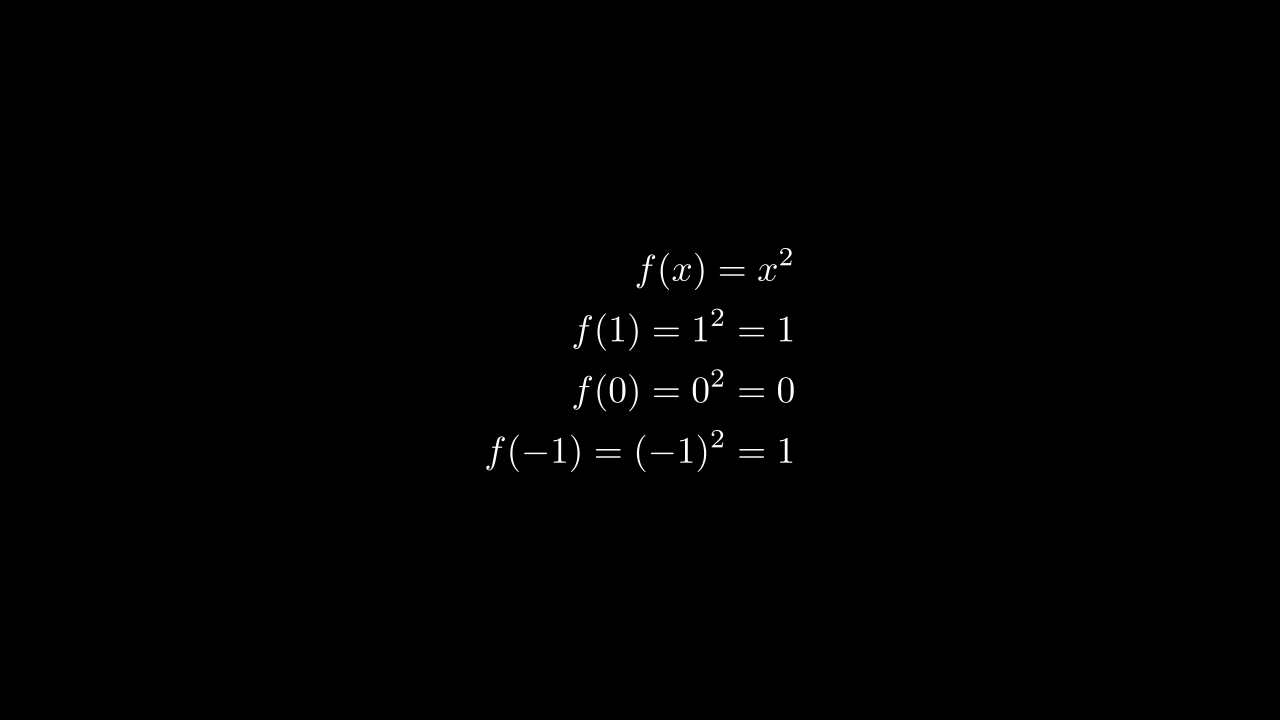

In [ ]:
%%manim -qm -v WARNING LaTeXAlignEnvironment
class LaTeXAlignEnvironment(Scene):
    def construct(self):
        tex = MathTex(
            r'f(x) = x^2 \\',
            r'f(1) = 1^2 = 1 \\',
            r'f(0) = 0^2 = 0 \\',
            r'f(-1) = (-1)^2 = 1',
            font_size=40
        )
        self.add(tex)


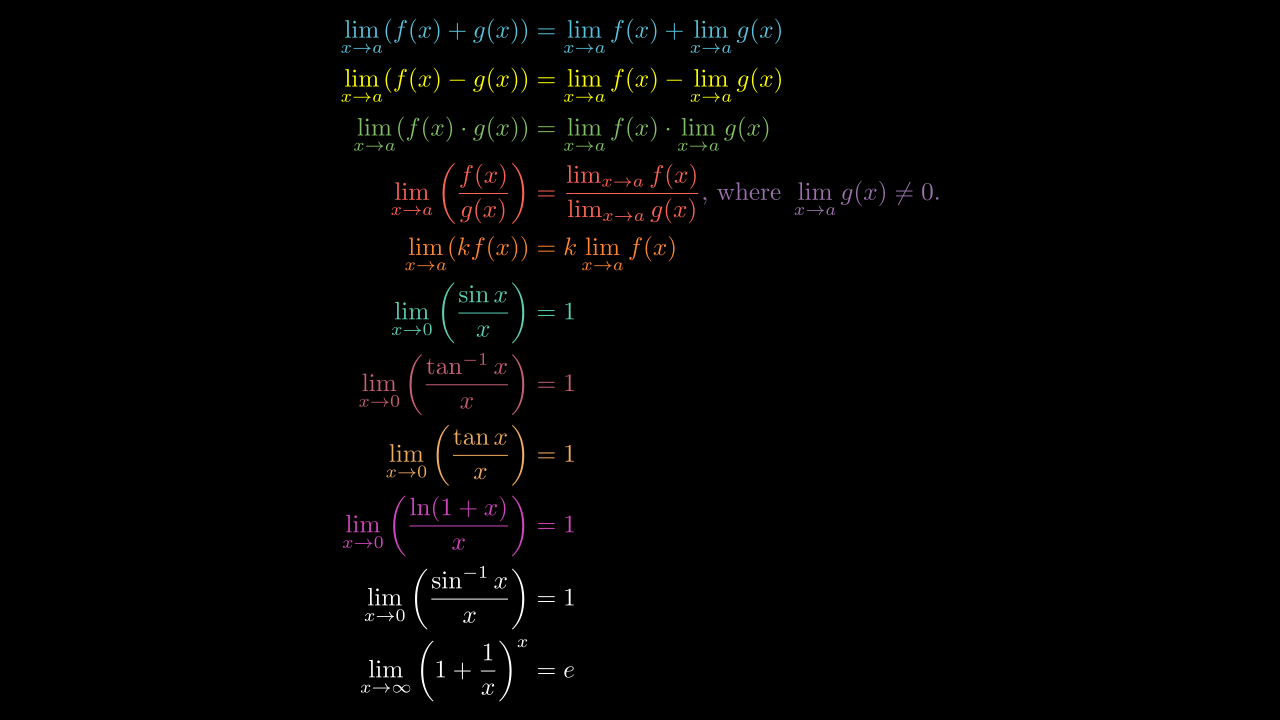

In [ ]:
%%manim -qm -v WARNING LimitPropertiesScene


class LimitPropertiesScene(Scene):
    def construct(self):
        tex = MathTex(
            r"\lim_{x \to a}(f(x) + g(x)) &= \lim_{x \to a}f(x) + \lim_{x \to a}g(x)\\",
            r"\lim_{x \to a}(f(x) - g(x)) &= \lim_{x \to a}f(x) - \lim_{x \to a}g(x)\\",
            r"\lim_{x \to a}(f(x) \cdot g(x)) &= \lim_{x \to a}f(x) \cdot \lim_{x \to a}g(x)\\",
            r"\lim_{x \to a}\left(\frac{f(x)}{g(x)}\right) &= \frac{\lim_{x \to a}f(x)}{\lim_{x \to a}g(x)}",
            r"\text{, where }\lim_{x \to a}g(x) \neq 0.\\",
            r"\lim_{x \to a}(kf(x)) &= k \lim_{x \to a}f(x)\\",
            r"\lim_{x \to 0}\left(\frac{\sin x}{x}\right) &= 1\\",
            r"\lim_{x \to 0}\left(\frac{\tan^{-1} x}{x}\right) &= 1\\",
            r"\lim_{x \to 0}\left(\frac{\tan x}{x}\right) &= 1\\",
            r"\lim_{x \to 0}\left(\frac{\ln(1 + x)}{x}\right) &= 1\\",
            r"\lim_{x \to 0}\left(\frac{\sin^{-1} x}{x}\right) &= 1\\",
            r"\lim_{x \to \infty}\left(1 + \frac{1}{x}\right)^x &= e",
            font_size=36
        ).scale(0.75)

        # Set different color shades for each formula
        colors = [BLUE, YELLOW, GREEN, RED, PURPLE, ORANGE, TEAL, MAROON, GOLD, PINK]
        for i, color in enumerate(colors):
            tex[i].set_color(color)

        self.add(tex)


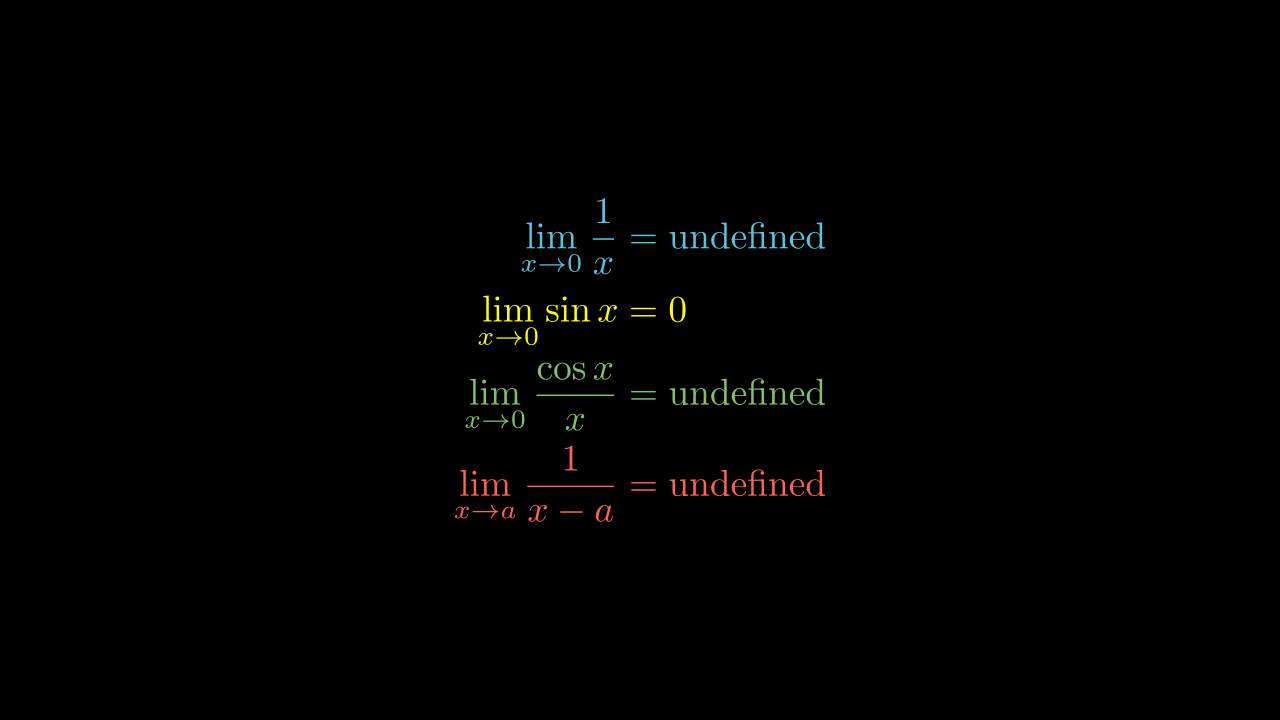

In [ ]:
%%manim -qm -v WARNING LimitPropertiesScene

class LimitPropertiesScene(Scene):
    def construct(self):
        tex = MathTex(
            r"\lim_{x \to 0} \frac{1}{x} &= \text{undefined}\\",
            r"\lim_{x \to 0} \sin x &= 0\\",
            r"\lim_{x \to 0} \frac{\cos x}{x} &= \text{undefined}\\",
            r"\lim_{x \to a} \frac{1}{x-a} &= \text{undefined}",
            font_size=50
        ).scale(0.80)

        # Set different color shades for each formula
        colors = [BLUE, YELLOW, GREEN, RED]
        for i, color in enumerate(colors):
            tex[i].set_color(color)

        self.add(tex)


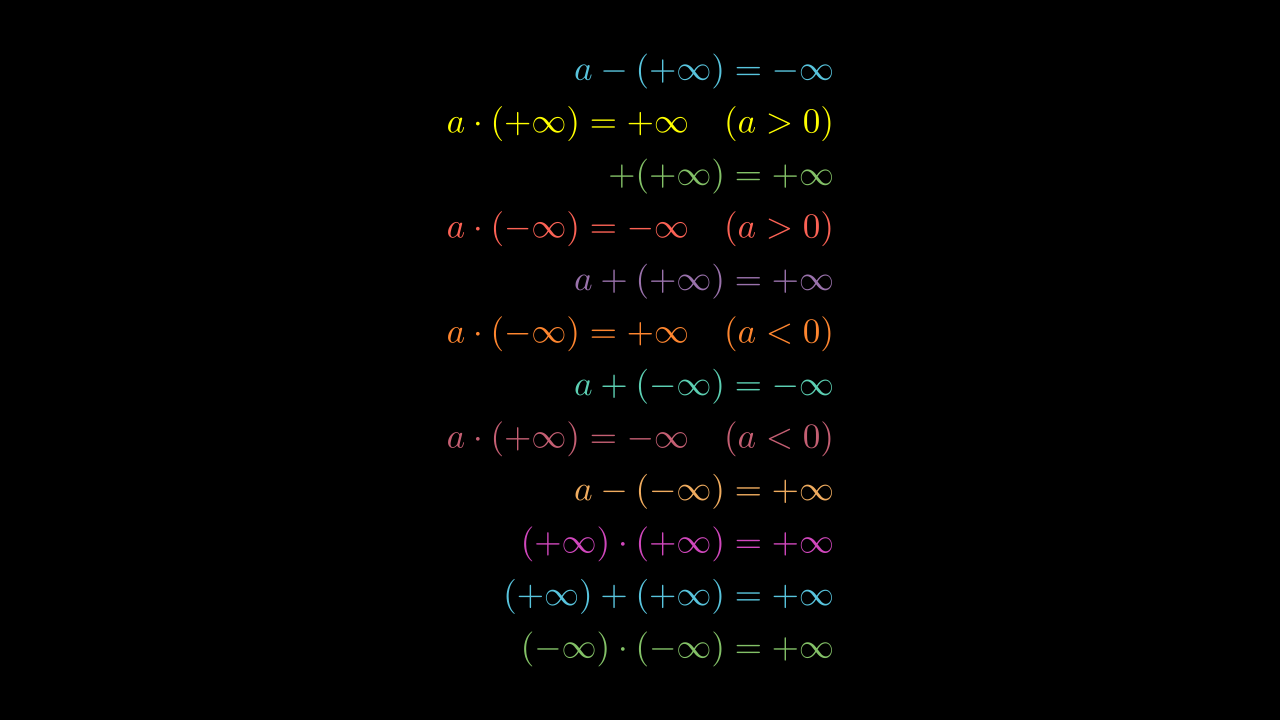

In [ ]:
%%manim -qm -v WARNING InfinityPropertiesScene

class InfinityPropertiesScene(Scene):
    def construct(self):
        tex = MathTex(
            r"a - (+\infty) = -\infty\\", r"a \cdot (+\infty) = +\infty \quad (a > 0)\\", 
            r"+ (+\infty) = +\infty\\", r"a \cdot (-\infty) = -\infty \quad (a > 0)\\",
            r"a + (+\infty) = +\infty\\", r"a \cdot (-\infty) = +\infty \quad (a < 0)\\",
            r"a + (-\infty) = -\infty\\", r"a \cdot (+\infty) = -\infty \quad (a < 0)\\",
            r"a - (-\infty) = +\infty\\", r"(+\infty) \cdot (+\infty) = +\infty\\",
            r"(+\infty) + (+\infty) = +\infty\\", r"(-\infty) \cdot (-\infty) = +\infty\\",
            
            font_size=50,
            color=WHITE
        ).scale(0.75)

        # Set different color shades for each formula
        colors = [BLUE, YELLOW, GREEN, RED, PURPLE, ORANGE, TEAL, MAROON, GOLD, PINK, BLUE, GREEN, GREY,WHITE, PINK, BLUE]
        for i, color in enumerate(colors):
            if i < len(tex):
                tex[i].set_color(color)

        self.add(tex)


In [ ]:
%%manim -qm -v WARNING DivByZeroScene

from manim import *

class DivByZeroScene(Scene):
    def construct(self):
        # The starting statement
        statement = Text("The meaning of 1/0", font_size=36).to_edge(UP+LEFT)
        
        # Sequence of expressions for positive and negative values
        expressions = MathTex(
            r'\frac{1}{0.1} = 10',
            r'\frac{1}{0.01} = 100',
            r'\frac{1}{0.001} = 1,000',
            r'\frac{1}{0.0001} = 10,000',
            r'\vdots',
            r'\frac{1}{0.000000000001} = 1,000,000,000,000',
            
            font_size=36,
            color=WHITE
        ).arrange(DOWN, buff=0.5)

        # Adding the starting statement to the scene
        self.add(statement)
        self.wait(1)
        
        # Adding the sequence of expressions to the scene
        self.play(Write(expressions))
        self.wait(8)


In [ ]:
%%manim -qm -v WARNING PiecewiseFunctionAnimation

class PiecewiseFunctionAnimation(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 2.5, 0.5],
            y_range=[0, 6, 1],
            axis_config={"color": BLUE},
        )

        # Define the piecewise function
        def func(x):
            return x**2 if x <= 1 else 6 - x

        # Display the function definition
        function_definition = MathTex(
            "f(x) = \\begin{cases} x^2 & \\text{if } x \\leq 1 \\\\ 6 - x & \\text{if } x > 1 \\end{cases}",
            font_size=24,color = RED
        ).to_corner(UR).scale(1.2)

        # Create the graphs for each piece of the piecewise function
        graph1 = axes.plot(lambda x: x**2, x_range=[0, 1], color=RED)
        graph2 = axes.plot(lambda x: 6 - x, x_range=[1, 2.5], color=RED)
        graphs = VGroup(graph1, graph2)

        # Display the axes, the function, and the function definition
        self.play(Create(axes), Create(graphs), Write(function_definition))
        self.wait(1)

        # Value tracker for the x value
        x_tracker = ValueTracker(1.5)

        # Create the dot at the initial x value
        dot = Dot(color=RED).move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())))
        
        dot_label = always_redraw(lambda: MathTex(
            f"(", f"{x_tracker.get_value():.2f}", ", ", f"{func(x_tracker.get_value()):.2f}", ")",
            color=WHITE).next_to(dot, UR).set_color_by_tex(f"{func(x_tracker.get_value()):.2f}", RED))

        # Create the dashed lines
        horizontal_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(0, func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        ))
        vertical_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(x_tracker.get_value(), 0),
            color=YELLOW,
            dash_length=0.1
        ))

        # Display the dot and the dashed lines
        self.play(FadeIn(dot), Create(vertical_line), Create(horizontal_line), Write(dot_label))
        self.wait(1)

        # Updater for the dot and dashed lines
        dot.add_updater(lambda d: d.move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value()))))
        vertical_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(x_tracker.get_value(), 0),
            end=axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        )))
        horizontal_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(0, func(x_tracker.get_value())),
            end=dot.get_center(),
            color=YELLOW,
            dash_length=0.1
        )))

        # Animate the dot moving towards x = 1
        self.play(x_tracker.animate.set_value(1), run_time=4, rate_func=linear)
        
        

In [ ]:
%%manim -qm -v WARNING PlotFunctionGraphproper

class PlotFunctionGraphproper(Scene):
    def construct(self):
        # Create a coordinate system
        axes = Axes(
            x_range=[0, 10, 1],
            y_range=[0, 10, 1],
            axis_config={"color": BLUE},
        )

        # Define the function f(x)
        def func(x):
            return 0.1 * (x - 2) * (x - 5) * (x - 7) + 7

        # Create the function graph
        graph = axes.plot(func, color=RED)
        graph_label = axes.get_graph_label(graph, label='f(x)')

        # Draw the coordinate system and the graph
        self.play(Create(axes), Create(graph), Write(graph_label))

        # ValueTracker for x_value
        x_value = ValueTracker(3)

        # Create a dot and its label, updated by x_value
        dot = always_redraw(lambda: Dot(axes.c2p(x_value.get_value(), func(x_value.get_value())), color=PURPLE))
        dot_label = always_redraw(lambda: MathTex(
            f"({x_value.get_value():.2f}, {func(x_value.get_value()):.2f})", color=WHITE
        ).next_to(dot, UR))

        # Create dashed lines that move with the dot
        vertical_line = always_redraw(lambda: DashedLine(
            start=axes.c2p(x_value.get_value(), 0),
            end=axes.c2p(x_value.get_value(), func(x_value.get_value())),
            color=YELLOW
        ))

        horizontal_line = always_redraw(lambda: DashedLine(
            start=axes.c2p(0, func(x_value.get_value())),
            end=axes.c2p(x_value.get_value(), func(x_value.get_value())),
            color=YELLOW
        ))

        # Play the creation of dot, its label, and dashed lines
        self.play(GrowFromCenter(dot), Write(dot_label), Create(vertical_line), Create(horizontal_line))
        self.wait(1)

        # Animate the dot moving along the graph with dashed lines
        self.play(x_value.animate.set_value(7), rate_func=linear, run_time=8)
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING PlotFunctionGraphproper


from manim import *

class PlotFunctionGraphproper(Scene):
    def construct(self):
        # Create a coordinate system
        axes = Axes(
            x_range=[0, 10, 1],
            y_range=[0, 10, 1],
            axis_config={"color": BLUE},
        )

        # Define the function f(x)
        def func(x):
            return 0.1 * (x - 2) * (x - 5) * (x - 7) + 7

        # Create the function graph
        graph = axes.plot(func, color=RED)
        graph_label = axes.get_graph_label(graph, label='f(x)')

        # Draw the coordinate system and the graph
        self.play(Create(axes), Create(graph), Write(graph_label))

        # ValueTracker for x_value
        x_value = ValueTracker(0)

        # Create a dot and its label, updated by x_value
        dot = always_redraw(lambda: Dot(axes.c2p(x_value.get_value(), func(x_value.get_value())), color=PURPLE))
        
        # Update the dot label, changing the color of f(x) to red
        dot_label = always_redraw(lambda: MathTex(
            f"({x_value.get_value():.2f}, ", "{:.2f}".format(func(x_value.get_value()))
        ).next_to(dot, UR).set_color_by_tex("{:.2f}".format(func(x_value.get_value())), RED))
        
        # Labels for the x and y values
        x_label = always_redraw(lambda: MathTex(
            f"x = {x_value.get_value():.2f}", color=WHITE
        ).next_to(axes.c2p(x_value.get_value(), 0), DOWN))

        y_label = always_redraw(lambda: MathTex(
            f"f(x) = {func(x_value.get_value()):.2f}", color=RED
        ).next_to(axes.c2p(0, func(x_value.get_value())), LEFT))

        # Create dashed lines that move with the dot
        vertical_line = always_redraw(lambda: DashedLine(
            start=axes.c2p(x_value.get_value(), 0),
            end=axes.c2p(x_value.get_value(), func(x_value.get_value())),
            color=YELLOW
        ))

        horizontal_line = always_redraw(lambda: DashedLine(
            start=axes.c2p(0, func(x_value.get_value())),
            end=axes.c2p(x_value.get_value(), func(x_value.get_value())),
            color=YELLOW
        ))

        # Play the creation of dot, its label, dashed lines, and x/y labels
        self.play(GrowFromCenter(dot), Write(dot_label), Create(vertical_line), Create(horizontal_line), Write(x_label), Write(y_label))
        self.wait(1)
        
        # Display the function definition to the right side up
        function_definition = MathTex("f(x) = 0.1(x - 2)(x - 5)(x - 7) + 7",color=RED).to_edge(0.3*DOWN+RIGHT)
        self.play(Write(function_definition))

        # Animate the dot moving along the graph with dashed lines and x/y labels
        self.play(x_value.animate.set_value(8), rate_func=linear, run_time=8)
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING PlotFunctionGraphproper

class PlotFunctionGraphproper(Scene):
    def construct(self):
        # Create a coordinate system
        axes = Axes(
            x_range=[0, 10, 1],
            y_range=[0, 10, 1],
            axis_config={"color": BLUE},
        )

        # Define the function f(x)
        def func(x):
            return 0.1 * (x - 2) * (x - 5) * (x - 7) + 7

        # Create the function graph
        graph = axes.plot(func, color=RED)
        # Position the graph label to the right of the graph
        graph_label = axes.get_graph_label(graph, label='f(x)', x_val=9, direction=RIGHT)

        # Draw the coordinate system and the graph
        self.play(Create(axes), Create(graph), Write(graph_label))

        # ValueTracker for x_value
        x_value = ValueTracker(0)

        # Create a dot and its label, updated by x_value
        dot = always_redraw(lambda: Dot(axes.c2p(x_value.get_value(), func(x_value.get_value())), color=PURPLE))
        
        # Update the dot label, changing the color of f(x) to red
        dot_label = always_redraw(lambda: MathTex(
            f"({x_value.get_value():.2f}, ",
            "{:.2f}".format(func(x_value.get_value())),
            color=WHITE
        ).next_to(dot, UR))
        dot_label[1].set_color(RED)  # Set the function value to red

        # Labels for the x and y values
        x_label = always_redraw(lambda: MathTex(
            f"x = {x_value.get_value():.2f}", color=WHITE
        ).next_to(axes.c2p(x_value.get_value(), 0), DOWN))

        y_label = always_redraw(lambda: MathTex(
            f"f(x) = {func(x_value.get_value()):.2f}", color=RED
        ).next_to(axes.c2p(0, func(x_value.get_value())), LEFT).scale(0.7))

        # Create dashed lines that move with the dot
        vertical_line = always_redraw(lambda: DashedLine(
            start=axes.c2p(x_value.get_value(), 0),
            end=axes.c2p(x_value.get_value(), func(x_value.get_value())),
            color=YELLOW
        ))

        horizontal_line = always_redraw(lambda: DashedLine(
            start=axes.c2p(0, func(x_value.get_value())),
            end=axes.c2p(x_value.get_value(), func(x_value.get_value())),
            color=YELLOW
        ))

        # Play the creation of dot, its label, dashed lines, and x/y labels
        self.play(GrowFromCenter(dot), Write(dot_label), Create(vertical_line), Create(horizontal_line), Write(x_label), Write(y_label))
        self.wait(1)

        # Animate the dot moving along the graph with dashed lines and x/y labels
        self.play(x_value.animate.set_value(8), rate_func=linear, run_time=4)
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING PlotFunctionGraphproper


class PlotFunctionGraphproper(Scene):
    def construct(self):
        # Create a coordinate system
        axes = Axes(
            x_range=[0, 10, 1],
            y_range=[0, 10, 1],
            axis_config={"color": BLUE},
        )

        # Define the function f(x)
        def func(x):
            return 0.1 * (x - 2) * (x - 5) * (x - 7) + 7

        # Create the function graph
        graph = axes.plot(func, color=RED)
        graph_label = axes.get_graph_label(graph, label='f(x)')

        # Draw the coordinate system and the graph
        self.play(Create(axes), Create(graph), Write(graph_label))

        # ValueTracker for x_value
        x_value = ValueTracker(0)

        # Create a dot and its label, updated by x_value
        dot = always_redraw(lambda: Dot(axes.c2p(x_value.get_value(), func(x_value.get_value())), color=PURPLE))
        
        # Update the dot label, changing the color of f(x) to red
        dot_label = always_redraw(lambda: MathTex(
            f"(",
            f"{x_value.get_value():.2f}",
            ",",
            f"{func(x_value.get_value()):.2f}",
            ")",
            color=WHITE
        ).next_to(dot, UR)).set_color_by_tex("{:.2f}".format(func(x_value.get_value())), RED)
          # Set the function value to red
        
        # Labels for the x and y values
        x_label = always_redraw(lambda: MathTex(
            f"x = {x_value.get_value():.2f}", color=WHITE
        ).next_to(axes.c2p(x_value.get_value(), 0), DOWN))

        y_label = always_redraw(lambda: MathTex(
            f"f(x) = {func(x_value.get_value()):.2f}", color=RED
        ).next_to(axes.c2p(0, func(x_value.get_value())), LEFT).scale(0.5))

        # Create dashed lines that move with the dot
        vertical_line = always_redraw(lambda: DashedLine(
            start=axes.c2p(x_value.get_value(), 0),
            end=axes.c2p(x_value.get_value(), func(x_value.get_value())),
            color=YELLOW
        ))

        horizontal_line = always_redraw(lambda: DashedLine(
            start=axes.c2p(0, func(x_value.get_value())),
            end=axes.c2p(x_value.get_value(), func(x_value.get_value())),
            color=YELLOW
        ))

        # Play the creation of dot, its label, dashed lines, and x/y labels
        self.play(GrowFromCenter(dot), Write(dot_label), Create(vertical_line), Create(horizontal_line), Write(x_label), Write(y_label))
        self.wait(1)

        # Animate the dot moving along the graph with dashed lines and x/y labels
        self.play(x_value.animate.set_value(8), rate_func=linear, run_time=4)
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING PiecewiseFunctionAnimation


class PiecewiseFunctionAnimation(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 2.5, 0.5],
            y_range=[0, 6, 1],
            axis_config={"color": BLUE},
        ).add_coordinates()

        # Define the piecewise function
        def func(x):
            return x**2 if x <= 1 else 6 - x

        # Display the function definition
        function_definition = MathTex(
            "f(x) = \\begin{cases} x^2 & \\text{if } x \\leq 1 \\\\ 6 - x & \\text{if } x > 1 \\end{cases}",
            font_size=24,
            color=RED
        ).to_corner(UR).scale(1.2)

        # Create the graphs for each piece of the piecewise function
        graph1 = axes.plot(lambda x: x**2, x_range=[0, 1], color=RED)
        graph2 = axes.plot(lambda x: 6 - x, x_range=[1, 2.5], color=RED)
        graphs = VGroup(graph1, graph2)

        # Display the axes, the function, and the function definition
        self.play(Create(axes), Create(graphs), Write(function_definition))
        self.wait(1)

        # Value tracker for the x value
        x_tracker = ValueTracker(1.5)

        # Create the dot at the initial x value
        dot = Dot(color=RED).move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())))
        
        dot_label = always_redraw(lambda: MathTex(
            f"(", f"{x_tracker.get_value():.2f}", ", ", f"{func(x_tracker.get_value()):.2f}", ")",
            color=WHITE
        ).next_to(dot, UR))

        dot_label[3].set_color(RED)  # Set the function value to red

        # Create the dashed lines
        horizontal_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(0, func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        ))
        vertical_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(x_tracker.get_value(), 0),
            color=YELLOW,
            dash_length=0.1
        ))

        # Display the dot and the dashed lines
        self.play(FadeIn(dot), Create(vertical_line), Create(horizontal_line), Write(dot_label))
        self.wait(1)

        # Updater for the dot and dashed lines
        dot.add_updater(lambda d: d.move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value()))))
        vertical_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(x_tracker.get_value(), 0),
            end=axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        )))
        horizontal_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(0, func(x_tracker.get_value())),
            end=dot.get_center(),
            color=YELLOW,
            dash_length=0.1
        )))

        # Animate the dot moving towards x = 1
        self.play(x_tracker.animate.set_value(1), run_time=4, rate_func=linear)
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING PiecewiseFunctionAnimation1
class PiecewiseFunctionAnimation1(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 2.5, 0.5],
            y_range=[0, 6, 1],
            axis_config={"color": BLUE},
        ).add_coordinates()

        # Define the piecewise function
        def func(x):
            return x**2 if x <= 1 else 6 - x

        # Display the function definition
        function_definition = MathTex(
            "f(x) = \\begin{cases} x^2 & \\text{if } x \\leq 1 \\\\ 6 - x & \\text{if } x > 1 \\end{cases}",
            font_size=24,
            color=RED
        ).to_corner(UR).scale(1.2)

        # Create the graphs for each piece of the piecewise function
        graph1 = axes.plot(lambda x: x**2, x_range=[0, 1], color=RED)
        graph2 = axes.plot(lambda x: 6 - x, x_range=[1, 2.5], color=RED)
        graphs = VGroup(graph1, graph2)

        # Display the axes, the function, and the function definition
        self.play(Create(axes), Create(graphs), Write(function_definition))
        self.wait(1)

        # Value tracker for the x value, starting from 0.3
        x_tracker = ValueTracker(0.3)

        # Create the dot at the initial x value
        dot = Dot(color=RED).move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())))
        
        dot_label = always_redraw(lambda: MathTex(
            f"(", f"{x_tracker.get_value():.2f}", ", ", f"{func(x_tracker.get_value()):.2f}", ")",
            color=WHITE
        ).next_to(dot, UR))

        dot_label[3].set_color(RED)  # Set the function value to red

        # Create the dashed lines
        horizontal_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(0, func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        ))
        vertical_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(x_tracker.get_value(), 0),
            color=YELLOW,
            dash_length=0.1
        ))

        # Display the dot and the dashed lines
        self.play(FadeIn(dot), Create(vertical_line), Create(horizontal_line), Write(dot_label))
        self.wait(1)

        # Updater for the dot and dashed lines
        dot.add_updater(lambda d: d.move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value()))))
        vertical_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(x_tracker.get_value(), 0),
            end=axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        )))
        horizontal_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(0, func(x_tracker.get_value())),
            end=dot.get_center(),
            color=YELLOW,
            dash_length=0.1
        )))

        # Animate the dot moving towards x = 1 from the left-hand side
        self.play(x_tracker.animate.set_value(1), run_time=4, rate_func=linear)
        self.wait(1)


In [ ]:
%%manim -qm -v WARNING PiecewiseFunctionAnimationboth

class PiecewiseFunctionAnimationboth(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 2.5, 0.5],
            y_range=[0, 6, 1],
            axis_config={"color": BLUE},
        ).add_coordinates()

        # Define the piecewise function
        def func(x):
            return x**2 if x <= 1 else 6 - x

        # Display the function definition
        function_definition = MathTex(
            "f(x) = \\begin{cases} x^2 & \\text{if } x \\leq 1 \\\\ 6 - x & \\text{if } x > 1 \\end{cases}",
            font_size=24,
            color=RED
        ).to_corner(UR).scale(1.2)

        # Create the graphs for each piece of the piecewise function
        graph1 = axes.plot(lambda x: x**2, x_range=[0, 1], color=RED)
        graph2 = axes.plot(lambda x: 6 - x, x_range=[1, 2.5], color=RED)
        graphs = VGroup(graph1, graph2)

        # Display the axes, the function, and the function definition
        self.play(Create(axes), Create(graphs), Write(function_definition))
        self.wait(1)

        # Value tracker for the x value, starting from 0.3
        x_tracker = ValueTracker(0.3)

        # Create the dot at the initial x value
        dot = Dot(color=RED).move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())))
        
        dot_label = always_redraw(lambda: MathTex(
            f"(", f"{x_tracker.get_value():.2f}", ", ", f"{func(x_tracker.get_value()):.2f}", ")",
            color=WHITE
        ).next_to(dot, UR))

        dot_label[3].set_color(RED)  # Set the function value to red

        # Create the dashed lines
        horizontal_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(0, func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        ))
        vertical_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(x_tracker.get_value(), 0),
            color=YELLOW,
            dash_length=0.1
        ))

        # Display the dot and the dashed lines
        self.play(FadeIn(dot), Create(vertical_line), Create(horizontal_line), Write(dot_label))
        self.wait(1)

        # Updater for the dot and dashed lines
        dot.add_updater(lambda d: d.move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value()))))
        vertical_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(x_tracker.get_value(), 0),
            end=axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        )))
        horizontal_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(0, func(x_tracker.get_value())),
            end=dot.get_center(),
            color=YELLOW,
            dash_length=0.1
        )))

        # Animate the dot moving towards x = 1 from x = 0.3
        self.play(x_tracker.animate.set_value(1), run_time=4, rate_func=linear)
        self.wait(1)

        # Reset the dot to x = 1.5
        x_tracker.set_value(1.5)

        # Animate the dot moving towards x = 1 from x = 1.5
        self.play(x_tracker.animate.set_value(1), run_time=4, rate_func=linear)
        self.wait(1)

        # Clear updaters
        dot.clear_updaters()
        vertical_line.clear_updaters()
        horizontal_line.clear_updaters()


In [ ]:
%%manim -qm -v WARNING PiecewiseFunctionAnimationtwo

class PiecewiseFunctionAnimationtwo(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-2, 2, 0.5],
            y_range=[-2, 2, 0.5],
            axis_config={"color": BLUE},
        ).add_coordinates()

        # Define the function sin(x)/x
        def func(x):
            return np.sin(x) / x if x != 0 else 1

        # Display the function definition
        function_definition = MathTex(
            r"f(x) = \frac{\sin(x)}{x}",
            font_size=24,
            color=RED
        ).to_corner(UR).scale(1.2)

        # Create the graph for sin(x)/x
        graph = axes.plot(func, x_range=[-2, 2], discontinuities=[0], color=RED)

        # Display the axes and the function
        self.play(Create(axes), Create(graph), Write(function_definition))
        self.wait(1)

        # Value tracker for the x value, starting close to 0
        x_tracker = ValueTracker(-1.5)

        # Create the dot at the initial x value
        dot = Dot(color=RED).move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())))
        
        dot_label = always_redraw(lambda: MathTex(
            f"(", f"{x_tracker.get_value():.2f}", ", ", f"{func(x_tracker.get_value()):.2f}", ")",
            color=WHITE
        ).next_to(dot, UR))

        dot_label[3].set_color(RED)  # Set the function value to red

        # Create the dashed lines
        horizontal_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(0, func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        ))
        vertical_line = always_redraw(lambda: DashedLine(
            start=dot.get_center(),
            end=axes.c2p(x_tracker.get_value(), 0),
            color=YELLOW,
            dash_length=0.1
        ))

        # Display the dot and the dashed lines
        self.play(FadeIn(dot), Create(vertical_line), Create(horizontal_line), Write(dot_label))
        self.wait(1)

        # Updater for the dot and dashed lines
        dot.add_updater(lambda d: d.move_to(axes.c2p(x_tracker.get_value(), func(x_tracker.get_value()))))
        vertical_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(x_tracker.get_value(), 0),
            end=axes.c2p(x_tracker.get_value(), func(x_tracker.get_value())),
            color=YELLOW,
            dash_length=0.1
        )))
        horizontal_line.add_updater(lambda d: d.become(DashedLine(
            start=axes.c2p(0, func(x_tracker.get_value())),
            end=dot.get_center(),
            color=YELLOW,
            dash_length=0.1
        )))

        # Animate the dot moving towards x = 0
        self.play(x_tracker.animate.set_value(0), run_time=4, rate_func=linear)
        self.wait(1)

        # Clear updaters
        dot.clear_updaters()
        vertical_line.clear_updaters()
        horizontal_line.clear_updaters()


In [ ]:
%%manim -qm -v WARNING PiecewiseFunctionAnimationthree


class PiecewiseFunctionAnimationthree(Scene):
    def construct(self):
        # Create the coordinate system
        axes = Axes(
            x_range=[-5, 5],
            y_range=[-5, 5],
            axis_config={"color": BLUE},
        ).add_coordinates()

        # Define the piecewise function parts
        def func1(x):
            return -x
        def func2(x):
            return 2
        def func3(x):
            return x

        # Create the graphs for each piece of the piecewise function
        graph1 = axes.plot(func1, x_range=[-5, 0], color=RED)
        graph2 = axes.plot(func2, x_range=[0, 3], color=RED)
        graph3 = axes.plot(func3, x_range=[3, 5], color=RED)
        graphs = VGroup(graph1, graph2, graph3)

        # Display the axes and the function
        self.play(Create(axes), Create(graphs))
        self.wait(1)

        # Value tracker for the x value, starting from the left
        x_tracker_left = ValueTracker(-3)

        # Create the dot at the initial x value on the left
        dot_left = Dot(color=RED).move_to(axes.c2p(x_tracker_left.get_value(), func1(x_tracker_left.get_value())))

        # Value tracker for the x value, starting from the right
        x_tracker_right = ValueTracker(4)

        # Create the dot at the initial x value on the right
        dot_right = Dot(color=RED).move_to(axes.c2p(x_tracker_right.get_value(), func3(x_tracker_right.get_value())))

        # Display the dots
        self.play(FadeIn(dot_left), FadeIn(dot_right))
        self.wait(1)

        # Animate the dots moving towards x = 0
        self.play(
            x_tracker_left.animate.set_value(0),
            x_tracker_right.animate.set_value(0),
            run_time=4, rate_func=linear
        )
        self.wait(1)

        # Display the constant part of the function
        dot_constant = Dot(color=RED).move_to(axes.c2p(0, func2(0)))
        self.play(FadeIn(dot_constant))
        self.wait(1)


# Differentialtion in Python

In [2]:
from sympy import symbols, Function, diff, limit, oo, exp, sqrt , sin ,cos
import numpy as np
# Define symbols
x = symbols('x')

# Define functions
f1 = x**3 + 2*x**2 - 5*x + 1  # Polynomial Function
f2 = exp(x) + exp(-x)         # Exponential Function
f3 = 1 / (x**2 + 1)           # Rational Function
f4 = sqrt(x)                  # Square Root Function
f5 = x**x                     # Power Function
f6 = 1/sin(x**2+3*x+5)
# Display the functions
print("Functions:")
print("f1(x) =", f1)
print("f2(x) =", f2)
print("f3(x) =", f3)
print("f4(x) =", f4)
print("f5(x) =", f5)


# Evaluate f1 at x = 3 f1(3)
f1_at_3 = f1.subs(x, 3)
print('f1(3)=',f1_at_3)

# Calculate and display some limits
print("\nLimits:")
print("Limit of f1 as x approaches 2:", limit(f1, x, 2))
print("Limit of f2 as x approaches infinity:", limit(f2, x, oo))
print("Limit of f3 as x approaches 0:", limit(f3, x, 0))

# Calculate and display derivatives
print("\nDerivatives:")
print("Derivative of f1 with respect to x:", diff(f1, x))
print("Derivative of f2 with respect to x:", diff(f2, x))
print("Derivative of f3 with respect to x:", diff(f3, x))
print("Derivative of f6 with respect to x:", diff(f6, x))



Functions:
f1(x) = x**3 + 2*x**2 - 5*x + 1
f2(x) = exp(x) + exp(-x)
f3(x) = 1/(x**2 + 1)
f4(x) = sqrt(x)
f5(x) = x**x
f1(3)= 31

Limits:
Limit of f1 as x approaches 2: 7
Limit of f2 as x approaches infinity: oo
Limit of f3 as x approaches 0: 1

Derivatives:
Derivative of f1 with respect to x: 3*x**2 + 4*x - 5
Derivative of f2 with respect to x: exp(x) - exp(-x)
Derivative of f3 with respect to x: -2*x/(x**2 + 1)**2
Derivative of f6 with respect to x: -(2*x + 3)*cos(x**2 + 3*x + 5)/sin(x**2 + 3*x + 5)**2


In [7]:
def sigmoid(x):
    z = 1 / 1+np.exp(x)

    return z

sigmoid(0), sigmoid(10), sigmoid(0.5), sigmoid(1)

(2.0, 22027.465794806718, 2.648721270700128, 3.718281828459045)

In [4]:
sigmoid(-np.inf) # Infinity

1.0

To determine if a function is **increasing or decreasing on an interval**, we can use the **first derivative test**:

1. **Find the First Derivative**: Calculate the first derivative $f'(x)$ of the function $f(x)$.
2. **Evaluate the Sign of the First Derivative**:
   - If $f'(x) > 0$ for all $x$ in the interval, then $f(x)$ is increasing on that interval.
   - If $f'(x) < 0$ for all $x$ in the interval, then $f(x)$ is decreasing on that interval.

If we want to test this for an entire domain, we should also check for any critical points where $f'(x) = 0$ or where $f'(x)$ does not exist, as these points can be local maxima, minima, or points of inflection.

Let's implement this test in Python using the `sympy` library. We'll demonstrate this with an example function, $f(x) = x^2 - 4x + 3$. You can replace this with any function you're interested in.


In [9]:
import sympy as sp

# Define the variable and function
x = sp.symbols('x')
f = x**2 - 4*x + 3

# Calculate the first derivative
f_prime = sp.diff(f, x)
print("f'(x) = ",f_prime)
print(f_prime.subs(x,1.999999999999))
print(f_prime.subs(x,2))
print(f_prime.subs(x,2.0000001))
# Find the critical points
critical_points = sp.solve(f_prime, x)

# Test the intervals around the critical points for increase/decrease
intervals = [-sp.oo] + sorted(critical_points) + [sp.oo]
for i in range(len(intervals) - 1):
    test_point = (intervals[i] + intervals[i+1]) / 2
    if f_prime.subs(x, test_point) > 0:
        print(f"The function is increasing on the interval ({intervals[i]}, {intervals[i+1]})")
    elif f_prime.subs(x, test_point) < 0:
        print(f"The function is decreasing on the interval ({intervals[i]}, {intervals[i+1]})")
    else:
        print(f"The function's behavior on the interval ({intervals[i]}, {intervals[i+1]}) cannot be determined from the first derivative test alone.")


f'(x) =  2*x - 4
-2.00017780116468e-12
0
1.99999999672684e-7
The function is decreasing on the interval (-oo, 2)
The function is increasing on the interval (2, oo)


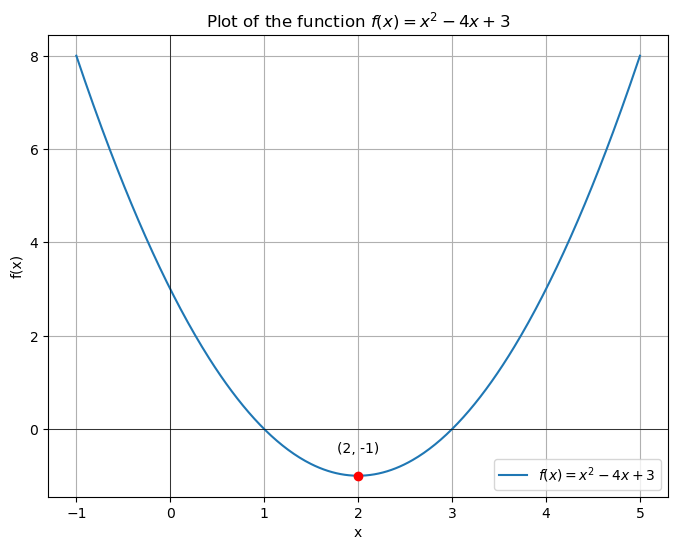

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f(x):
    return x**2 - 4*x + 3

# Create an array of x values from -1 to 5
x = np.linspace(-1, 5, 400)

# Calculate y values
y = f(x)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = x^2 - 4x + 3$')

# Identify the critical points and determine their nature
critical_points = np.array([2])  # The derivative of f is 2x - 4, which is zero at x = 2
for cp in critical_points:
    plt.plot(cp, f(cp), 'ro')  # Plot critical point
    plt.text(cp, f(cp) + 0.5, f'({cp}, {f(cp)})', ha='center')  # Annotate the critical point

# Set the labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function $f(x) = x^2 - 4x + 3$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


# <span style="color:fuchsia;">**Convexity/Concavity Test for a Function**</span>


To determine whether a function $ f(x) $ is convex or concave over an interval $[a, b]$, follow these steps:

1. **Define the Function**: Let $ f(x) = ...$ (specify the function here).
2. **Evaluate the Function**: Compute the values at the endpoints and the midpoint:
   * $ f(a) = ... $
   - $ f(b) = ...$
   - $f\left(\frac{a+b}{2}\right) = ...$
3. **Compare the Values**:
   - If $ f\left(\frac{a+b}{2}\right) \leq \frac{f(a) + f(b)}{2})$, the function is **convex** over \([a, b]\).
   - If $ f\left(\frac{a+b}{2}\right) > \frac{f(a) + f(b)}{2} $, the function is **concave** over \([a, b]\).

### Example
Let's apply these steps to a specific function, such as $f(x) = x^2$ over the interval $[1, 3]$:

1. **Function**: $ f(x) = x^2 $
2. **Evaluations**:
   - $ f(1) = 1^2 = 1 $
   - $ f(3) = 3^2 = 9 $
   - $ f\left(\frac{1+3}{2}\right) = f(2) = 2^2 = 4 $
3. **Comparison**:
   - Since $ 4 \leq \frac{1+9}{2} = 5 $, the function $ x^2 $ is convex over the interval $[1, 3]$.


In [ ]:
from sympy import symbols, Function

def test_convexity(f, a, b):
    # Evaluate the function at a, b, and the midpoint
    f_a = f.subs(x, a)
    f_b = f.subs(x, b)
    f_midpoint = f.subs(x, (a + b) / 2)
    print('f(a)=',f_a)
    print('f(b)=',f_b)
    print('f(a+b/2)=',f_midpoint)
    # Compute f(a) + f(b) / 2
    average = (f_a + f_b) / 2
    print('f(a)+f(b)/2=',round(average,2))
    # Compare and determine convexity or concavity
    if f_midpoint <= average:
        return "The function is convex over the interval [{}, {}]".format(a, b)
    else:
        return "The function is concave over the interval [{}, {}]".format(a, b)

# Define the symbol
x = symbols('x')

# Example: Define the function f(x)
f = -x**2  # You can replace this with any function

# Define the interval [a, b]
a = 0
b = 1

# Test convexity
result = test_convexity(f, a, b)
print(result)


f(a)= 0
f(b)= -1
f(a+b/2)= -0.250000000000000
f(a)+f(b)/2= -0.50
The function is concave over the interval [0, 1]


A function is **convex** on an interval if its second derivative is non-negative on that interval, and **concave** if the second derivative is non-positive.

Let's outline the steps:

1. **Define the Function**: Specify the function $f(x)$.
2. **Compute the Second Derivative**: Find $f''(x)$, the second derivative of $f(x)$.
3. **Evaluate the Second Derivative over the Interval $[a, b]$**: Check the sign of $f''(x)$ at various points in the interval.
   - If $f''(x) \geq 0$ for all $x$ in $[a, b]$, the function is convex.
   - If $f''(x) < 0$ for all $x$ in $[a, b]$, the function is concave.

Let's implement this in Python. Assume we have a function $f(x)$, and we want to test its convexity/concavity over an interval $[a, b]$. We'll use `sympy` for symbolic mathematics in Python.

I'll demonstrate with an example function, say $f(x) = x^3 - 3x^2 + 2x$. You can replace this with any function you're interested in.


In [ ]:
import sympy as sp

# Define the symbolic variable and function
x = sp.symbols('x')
f = x**3 - 3*x**2 + 2*x  # Example function, can be replaced with any other function

# Compute the second derivative
f_second_derivative = sp.diff(f, x, x)

# Function to test convexity/concavity over an interval [a, b]
def test_convexity_concavity(func, a, b):
    # Evaluating the second derivative over the interval
    second_derivative_values = [func.subs(x, val) for val in [a, (a+b)/2, b]]

    # Test for convexity and concavity
    if all(val >= 0 for val in second_derivative_values):
        return "Convex over the interval"
    elif all(val <= 0 for val in second_derivative_values):
        return "Concave over the interval"
    else:
        return "Neither convex nor concave over the entire interval"

# Example interval [a, b]
a, b = 0, 2

# Test the function over the interval
convexity_concavity_result = test_convexity_concavity(f_second_derivative, a, b)
convexity_concavity_result, f_second_derivative


('Neither convex nor concave over the entire interval', 6*(x - 1))

In [11]:
!pip install manim

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.9 kB 1.4 MB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.9 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 649.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/44.9 kB ? eta -:--:--
     ---------------------------------------- 44.9/44.9 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/585.2 kB ? eta -:--:--
   -------- ------------------------------- 122.9/585.2 kB 7.0 MB/s eta 0:00:01
   -------------- ------------------------- 215.0/585.2 kB 2.6 MB/s eta 0:00:01
   ------------------------- -------------- 378.9/585.2 kB

In [13]:
# %%manim -qm -v WARNING ConvexConcaveFunctionPlot

from manim import *

class ConvexConcaveFunctionPlot(Scene):
    def construct(self):
        # Define axes
        axes = Axes(
            x_range=[-3, 3],
            y_range=[-5, 5],
            axis_config={"color": BLUE},
        )

        # Convex functions
        convex_funcs = [
            lambda x: x**2,
            lambda x: x**4,
            lambda x: 2 - 0.5 * x**2,
        ]
        convex_labels = [
            "f(x) = x^2",
            "f(x) = x^4",
            "f(x) = 2 - 0.5x^2",
        ]

        # Concave functions
        concave_funcs = [
            lambda x: -x**2,
            lambda x: -x**4,
            lambda x: 0.5 * x**2 - 2,
        ]
        concave_labels = [
            "f(x) = -x^2",
            "f(x) = -x^4",
            "f(x) = 0.5x^2 - 2",
        ]
        self.add(axes)
        # Create plots and labels for convex functions
        for func, label in zip(convex_funcs, convex_labels):
            plot = axes.plot(func, color=GREEN)
            plot_label = axes.get_graph_label(plot, label=label, x_val=-2, direction=UP+LEFT)
            self.play(Create(plot), Write(plot_label))
            self.wait(3)
            self.play(FadeOut(plot), FadeOut(plot_label))

        # Create plots and labels for concave functions
        for func, label in zip(concave_funcs, concave_labels):
            plot = axes.plot(func, color=RED)
            plot_label = axes.get_graph_label(plot, label=label, x_val=2, direction=UP+RIGHT)
            self.play(Create(plot), Write(plot_label))
            self.wait(3)
            
            self.play(FadeOut(plot), FadeOut(plot_label))

# Note: Do not forget to add the axes to the scene before plotting the functions.


### Maxima and Minima of a function over interval

The conditions for local maxima and minima of a function using the first and second derivative tests are as follows:

- **First Derivative Test**: If the derivative $f'(x)$ changes sign from positive to negative at $x = c$, then $f$ has a local maximum at $x = c$. If $f'(x)$ changes from negative to positive at $x = c$, then $f$ has a local minimum at $x = c$.

- **Second Derivative Test**: If $f'(c) = 0$ and $f''(c) > 0$, then $f$ has a local minimum at $x = c$. If $f'(c) = 0$ and $f''(c) < 0$, then $f$ has a local maximum at $x = c$.

Now, let's write the Python code to find the critical points and determine the local maxima and minima for the function $f(x) = x^3 - 3x^2 + 1$, as well as graph the function and indicate the points of maxima and minima.


f'(x) = 3*x**2 - 6*x
f'(x) = 0 at the critical points:
[0, 2]
f''(x) = 6*x - 6
Second derivative at critical points:
f''(0) = -6
f''(2) = 6
Local maximum at x = 0, f(0) = 1
Local minimum at x = 2, f(2) = -3


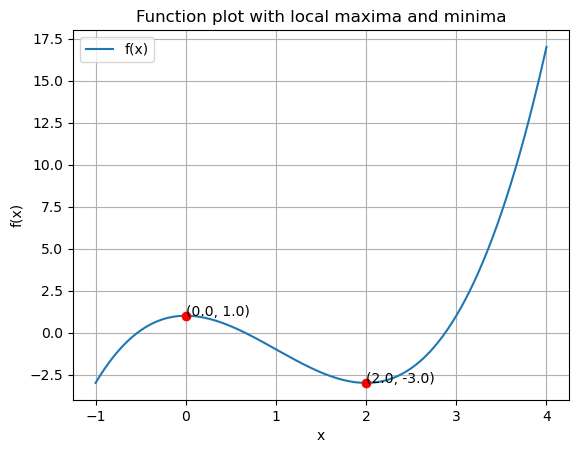

In [14]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Define the variable and function
x = sp.symbols('x')
f = x**3 - 3*x**2 + 1

# Calculate the first and second derivatives
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)

# Find the critical points from the first derivative
critical_points = sp.solve(f_prime, x)

# Compute the second derivative at the critical points
second_derivative_at_critical_points = {c: f_double_prime.subs(x, c) for c in critical_points}

# Print the results
print(f"f'(x) = {f_prime}")
print("f'(x) = 0 at the critical points:")
print(critical_points)
print(f"f''(x) = {f_double_prime}")
print("Second derivative at critical points:")
for c, val in second_derivative_at_critical_points.items():
    print(f"f''({c}) = {val}")

# Determine and print maxima and minima based on the second derivative test
for c, val in second_derivative_at_critical_points.items():
    if val > 0:
        print(f"Local minimum at x = {c}, f({c}) = {f.subs(x, c)}")
    elif val < 0:
        print(f"Local maximum at x = {c}, f({c}) = {f.subs(x, c)}")
    else:
        print(f"No conclusion can be drawn from the second derivative test at x = {c}")

# Create a lambda function for numerical computation and plotting
f_lambdified = sp.lambdify(x, f, modules=['numpy'])

# Generate x values
x_vals = np.linspace(-1, 4, 400)
y_vals = f_lambdified(x_vals)

# Plot the function
plt.plot(x_vals, y_vals, label='f(x)')

# Plot the critical points
for c in critical_points:
    c_num = float(c)
    plt.plot(c_num, f_lambdified(c_num), 'ro')
    plt.text(c_num, f_lambdified(c_num), f'({c_num}, {f_lambdified(c_num)})')

plt.title('Function plot with local maxima and minima')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


# Multivariable Calculus

The function of two variables can be defined as follows:

$f(x, y) = x^2 + y^2$

This represents a function $ f $ where each point$(x, y)$ on the plane is mapped to a value given by $ x^2 + y^2 $.


**Example of a Function of Two Variables in Business**
Profit Function:
Suppose a business sells two products. The profit function $P(x, y)$ might represent the total profit generated, where $x$ and $y$ are the quantities sold of Product 1 and Product 2, respectively. The function could consider the selling price minus the cost associated with each product:

The profit function for two products is given by:

$P(x, y) = (p_1 - c_1)x + (p_2 - c_2)y$

where:
- $p_1, p_2$ are the selling prices of Product 1 and Product 2.
- $c_1, c_2$ are the costs of producing one unit of Product 1 and Product 2.

Example Values:

If $p_1 = $15, $c_1 = 10$, $p_2 = 20$, and $c_2 = 14$,
Then the profit function is:

$P(x,y)=(15−10)x+(20−14)y=5x+6y$

A function of several variables, for example, three variables, can be defined as:

$f(x, y, z) = x^2 + y^2 + z^2 $

This function $f $ maps each point $(x, y, z)$ in three-dimensional space to a value calculated as $ x^2 + y^2 + z^2 $.


**Example of a Function of Three Variables in Business**
Cost Function:
Consider a business that incurs costs based on materials, labor, and marketing expenses. The total cost $C(x, y, z)$ can be modeled where $x$ represents material costs, $y$ labor costs, and $z$ marketing expenses, each possibly dependent on levels of production or sales:

The total cost function incorporating materials, labor, and marketing expenses is defined as:

$$C(x, y, z) = x + y + 1.2z$$

where:
- $x$ = material costs
- $y$ = labor costs
- $z$ = marketing expenses and the 1.2 factor accounts for an additional 20% overhead on marketing.


Example Usage:

If the material costs are $500$, labor costs are $800$, and marketing expenses are $300$, then:
$C(500,800,300)=500+800+1.2×300=500+800+360=$1660$

### Plots

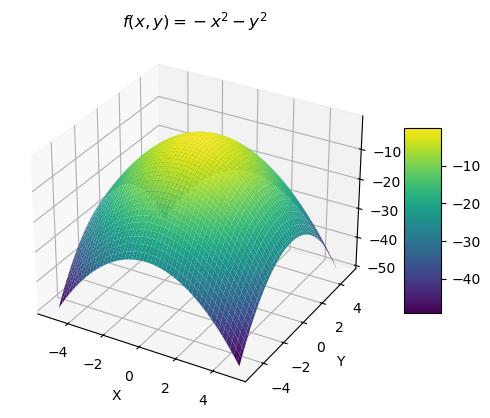

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Calculate Z values for the function Z = X^2 + Y^2
Z = -X**2 - Y**2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add a color bar which maps values to colors
fig.colorbar(surface, shrink=0.5, aspect=5)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Title
ax.set_title('$f(x, y) = -x^2 - y^2$')

# Show the plot
plt.show()


- $y=f(x)=x^2$
- $ z =f(x,y)=x^2+y^2$

# Partial Derivative

**A partial derivative** is a derivative where the function's change is measured with respect to one variable while keeping other variables constant. This concept is crucial in fields such as physics, engineering, and economics where functions often depend on more than one variable.

### Examples of Partial Derivatives

#### Function of Two Variables:
Let $f(x,y) = x^2 + 2xy + y^2$. The partial derivatives are:

- With respect to $x$: $\frac{\partial f}{\partial x} = 2x + 2y$
- With respect to $y$: $\frac{\partial f}{\partial y} = 2y + 2x$

#### Function of Three Variables:
Consider $g(x, y, z) = x^3 + 2y^2z + z^3$. The partial derivatives are:

- With respect to $x$: $\frac{\partial g}{\partial x} = 3x^2$
- With respect to $y$: $\frac{\partial g}{\partial y} = 4yz$
- With respect to $z$: $\frac{\partial g}{\partial z} = 2y^2 + 3z^2$


In [ ]:
from sympy import symbols, diff

# Define the variables
x, y, z = symbols('x y z')

# Define the function f(x, y) = x^2 + 2xy + y^2
f = x**2 + 2*x*y + y**2

# Compute partial derivatives of f
partial_f_x = diff(f, x)  # Partial derivative with respect to x
partial_f_y = diff(f, y)  # Partial derivative with respect to y

print("Partial derivative of f with respect to x:", partial_f_x)
print("Partial derivative of f with respect to y:", partial_f_y)

# Define the function g(x, y, z) = x^3 + 2y^2z + z^3
g = x**3 + 2*y**2*z + z**3

# Compute partial derivatives of g
partial_g_x = diff(g, x)  # Partial derivative with respect to x
partial_g_y = diff(g, y)  # Partial derivative with respect to y
partial_g_z = diff(g, z)  # Partial derivative with respect to z

print("Partial derivative of g with respect to x:", partial_g_x)
print("Partial derivative of g with respect to y:", partial_g_y)
print("Partial derivative of g with respect to z:", partial_g_z)


Partial derivative of f with respect to x: 2*x + 2*y
Partial derivative of f with respect to y: 2*x + 2*y
Partial derivative of g with respect to x: 3*x**2
Partial derivative of g with respect to y: 4*y*z
Partial derivative of g with respect to z: 2*y**2 + 3*z**2


### The Gradient

**The gradient of a function**, denoted as $\nabla f$, is a vector that stores all the partial derivatives of a multivariable function. It points in the direction of the greatest rate of increase of the function, and its magnitude gives the rate of increase in that direction.

#### Physical Interpretation of the Gradient

The gradient vector provides the direction and rate of fastest increase in a scalar field. If you were to move in the direction of the gradient vector, you would be taking the path of steepest ascent. Conversely, moving against the gradient vector direction represents the path of steepest descent. This concept is used in various fields including physics (for example, to describe how electric fields flow), computer graphics, and optimization algorithms.

#### Example of the Gradient of a Function

Consider the function $f(x, y) = x^2 + 3xy + y^2$. The gradient of $f$ can be computed as follows:

- The partial derivative with respect to $x$ is $\frac{\partial f}{\partial x} = 2x + 3y$.
- The partial derivative with respect to $y$ is $\frac{\partial f}{\partial y} = 3x + 2y$.

Therefore, the gradient of $f$ is:

$$\nabla f(x, y) = \left( 2x + 3y, 3x + 2y \right)$$

This vector points in the direction of the steepest ascent from any point $(x, y)$ on the function's surface. If you follow this vector from a specific point, you will move in the direction that increases the function's value most quickly.

In [ ]:
from sympy import symbols, diff

# Define the symbols
x, y = symbols('x y')

# Define the function f(x, y) = x^2 + y^2
f = x**2 + y**2

# Compute the partial derivatives
partial_f_x = diff(f, x)  # Derivative with respect to x
partial_f_y = diff(f, y)  # Derivative with respect to y

# Print the partial derivatives
print("Partial derivative with respect to x:", partial_f_x)
print("Partial derivative with respect to y:", partial_f_y)

# Combine them into the gradient vector
gradient_f = (partial_f_x, partial_f_y)
print("Gradient of the function f(x, y):", gradient_f)


Partial derivative with respect to x: 2*x
Partial derivative with respect to y: 2*y
Gradient of the function f(x, y): (2*x, 2*y)


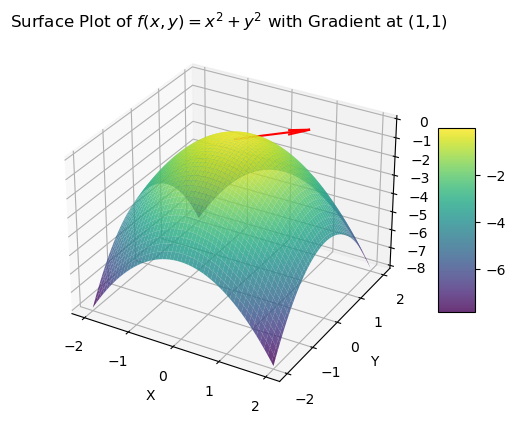

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, diff

# Define the symbols
x, y = symbols('x y')

# Define the function f(x, y) = x^2 + y^2
f = x**2 + y**2

# Compute the partial derivatives
partial_f_x = diff(f, x)  # Derivative with respect to x
partial_f_y = diff(f, y)  # Derivative with respect to y

# Function for numerical evaluation of gradient
gradient_f = lambda x_val, y_val: (float(partial_f_x.subs({x: x_val, y: y_val})),
                                   float(partial_f_y.subs({x: x_val, y: y_val})))

# Evaluate gradient at point (1, 1)
grad_at_point = gradient_f(1, 1)

# Define a grid for x and y
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate Z values for the grid
Z = -X**2 - Y**2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')

# Plot the gradient vector at point (1, 1)
ax.quiver(0, 0, 0**2 + 0**2, grad_at_point[0], grad_at_point[1], 0, color='r', length=1.5, normalize=True)

# Add color bar
fig.colorbar(surface, shrink=0.5, aspect=5)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Plot of $f(x, y) = x^2 + y^2$ with Gradient at (1,1)')

# Show the plot
plt.show()


### Jacobian and Hessian Matrices

#### Jacobian Matrix

The **Jacobian matrix** is crucial in multivariable calculus and is used primarily for functions that map from $\mathbb{R}^n$ to $\mathbb{R}^m$. It consists of first-order partial derivatives. If you have a function $\mathbf{f} : \mathbb{R}^n \rightarrow \mathbb{R}^m$, which maps $n$-dimensional input vectors to $m$-dimensional output vectors, the Jacobian matrix is an $m \times n$ matrix. For a function $\mathbf{f}(x_1, x_2, ..., x_n) = [f_1(x_1, ..., x_n), f_2(x_1, ..., x_n), ..., f_m(x_1, ..., x_n)]^T$, the Jacobian matrix is defined as:

$$
J = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$

This matrix is used to study rate of change of multivariable functions and is particularly useful in optimization, numerical analysis, and differential equations.

#### Hessian Matrix

The **Hessian matrix** is a square matrix of second-order partial derivatives of a scalar-valued function, and it's essential in optimization and stability analysis. For a function $f(x_1, x_2, ..., x_n)$, the Hessian matrix is defined as:

$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

The Hessian matrix is used to determine the local curvature of a function, and it helps in checking whether a critical point is a minimum, maximum, or a saddle point.

### Example Calculation

Consider the function $f(x, y) = x^2 + 3xy + y^2$. The Jacobian matrix for a vector-valued function similar to $f$, for instance $[f, f]$, and the Hessian matrix of $f$ are:

- **Jacobian of $[f, f]^T$**:

$$
J = \begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}
\end{bmatrix} = \begin{bmatrix}
2x + 3y & 3x + 2y \\
2x + 3y & 3x + 2y
\end{bmatrix}
$$

- **Hessian of $f$**:

$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix} = \begin{bmatrix}
2 & 3 \\
3 & 2
\end{bmatrix}
$$

These matrices provide insights into the behavior of the function at various points and are useful for optimization and analysis purposes.


**Second-Order Test in Optimization:** The Hessian matrix, being a matrix of second-order partial derivatives, is a key tool in optimization for determining the curvature of the function’s graph. In unconstrained optimization, the definiteness of the Hessian at a critical point (where the gradient is zero) helps classify the point as a local minimum, local maximum, or saddle point:

- Positive definite Hessian: The function has a local minimum.
- Negative definite Hessian: The function has a local maximum.
- Indefinite Hessian: The critical point is a saddle point.

**Transformation of Variables:** In multivariable calculus, the Jacobian matrix is used to transform variables in integrals. The determinant of the Jacobian matrix (Jacobian determinant) gives the factor by which the function scales a small area (or volume) near a point, which is essential in changing variables during integration.

In [ ]:
from sympy import symbols, hessian, Function, Matrix

# Define the variables
x, y = symbols('x y')

# Define a scalar-valued function for the Hessian example
f = x**2 + 3*x*y + y**2

# Compute the Hessian matrix of f
H = hessian(f, (x, y))
print("Hessian Matrix of f:")
print(H)

# Define a vector-valued function for the Jacobian example
f1 = x**2 + y**2
f2 = x*y
F = Matrix([f1, f2])

# Compute the Jacobian matrix of F
J = F.jacobian([x, y])
print("Jacobian Matrix of F:")
print(J)


Hessian Matrix of f:
Matrix([[2, 3], [3, 2]])
Jacobian Matrix of F:
Matrix([[2*x, 2*y], [y, x]])
